##### Data Set Information:

Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4).

The Rawah and Comanche Peak areas would tend to be more typical of the overall dataset than either the Neota or Cache la Poudre, due to their assortment of tree species and range of predictive variable values (elevation, etc.) Cache la Poudre would probably be more unique than the others, due to its relatively low elevation range and species composition.

Sources:

	(a) Original owners of database:
		Remote Sensing and GIS Program
		Department of Forest Sciences
		College of Natural Resources
		Colorado State University
		Fort Collins, CO  80523
		(contact Jock A. Blackard, jblackard 'at' fs.fed.us
		      or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu)

NOTE:	Reuse of this database is unlimited with retention of 
		copyright notice for Jock A. Blackard and Colorado 
		State University.

	(b) Donors of database:
		Jock A. Blackard (jblackard 'at' fs.fed.us)
		GIS Coordinator
		USFS - Forest Inventory & Analysis
		Rocky Mountain Research Station
		507 25th Street
		Ogden, UT 84401

		Dr. Denis J. Dean (denis.dean 'at' utdallas.edu)
		Professor
		Program in Geography and Geospatial Sciences
		School of Economic, Political and Policy Sciences
		800 West Campbell Rd
		Richardson, TX  75080-3021 
		
		Dr. Charles W. Anderson (anderson 'at' cs.colostate.edu)
		Associate Professor
		Department of Computer Science
		Colorado State University
		Fort Collins, CO  80523  USA

	(c) Date donated:  August 1998

------
------

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score, GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

In [2]:
details = pd.read_excel('details.xlsx')
details

,Details,Remarks
0,Data Set Characteristics,Multivariate
1,Attribute Characteristics,"Categorical, Integer"
2,Associated Tasks,Classification
3,Number of Instances,581011
4,Number of Attributes,54
5,Missing Values,No
6,Area,Life
7,Date Donated,1998-08-01 00:00:00
8,Number of Web Hits,258008


## Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database. 

In regards to the number of attributes, we have 12 measurements spread out over 54 columns of data. Ten are quantitative variables, four binary are wilderness areas, and 40 binary are soil type variables.

You can find more information about the data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info).


## Acknowledgement
This dataset is part of the UCI Machine Learning Repository, and the original source can be found [here](https://archive.ics.uci.edu/ml/datasets/Covertype). The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University.

# Outcomes

* The dataset has 54 features and 1 target variable `Cover_Type`.
* From the 54 features, 10 are numerical and 44 are categorical.
* From the categorical data 4 are of `Wilderness_Area` and 40 are of `Soil_Type`

### Categorical Data
With the informations from UCI, we know the correct names of all `Soil_Types` and `Wilderness_Areas`. See table below.

We will keep the current feature naming, but might take a closer look later if necessary.

Feature Name    |    Names
---------------|:--------
Wilderness_Area_01    |    Rawah Wilderness Area
Wilderness_Area_02    |    Neota Wilderness Area
Wilderness_Area_03    |    Comanche Wilderness Area
Wilderness_Area_04    |    Cache La Poudre Wilderness Area

Feature Name    |    Names
----------------|:--------
Soil_Type_01    |    Cathedral family - Rock outcrop complex, extremely stony
Soil_Type_02    |    Vanet - Ratake families complex, very stony
Soil_Type_03    |    Haploborolis - Rock outcrop complex, rubbly
Soil_Type_04    |    Ratake family - Rock outcrop complex, rubbly
Soil_Type_05    |    Vanet family - Rock outcrop complex, rubbly
Soil_Type_06    |    Vanet - Wetmore families - Rock outcrop complex, stony
Soil_Type_07    |    Gothic family
Soil_Type_08    |    Supervisor - Limber families complex
Soil_Type_09    |    Troutville family, very stony
Soil_Type_10    |    Bullwark - Catamount families - Rock outcrop complex, rubbly
Soil_Type_11    |    Bullwark - Catamount families - Rock land complex, rubbly
Soil_Type_12    |    Legault family - Rock land complex, stony
Soil_Type_13    |    Catamount family - Rock land - Bullwark family complex, rubbly
Soil_Type_14    |    Pachic Argiborolis - Aquolis complex
Soil_Type_15    |    unspecified in the USFS Soil and ELU Survey
Soil_Type_16    |    Cryaquolis - Cryoborolis complex
Soil_Type_17    |    Gateview family - Cryaquolis complex
Soil_Type_18    |    Rogert family, very stony
Soil_Type_19    |    Typic Cryaquolis - Borohemists complex
Soil_Type_20    |    Typic Cryaquepts - Typic Cryaquolls complex

Feature Name    |    Names
----------------|:--------
Soil_Type_21    |    Typic Cryaquolls - Leighcan family, till substratum complex
Soil_Type_22    |    Leighcan family, till substratum, extremely bouldery
Soil_Type_23    |    Leighcan family, till substratum, - Typic Cryaquolls complex.
Soil_Type_24    |    Leighcan family, extremely stony
Soil_Type_25    |    Leighcan family, warm, extremely stony
Soil_Type_26    |    Granile - Catamount families complex, very stony
Soil_Type_27    |    Leighcan family, warm - Rock outcrop complex, extremely stony
Soil_Type_28    |    Leighcan family - Rock outcrop complex, extremely stony
Soil_Type_29    |    Como - Legault families complex, extremely stony
Soil_Type_30    |    Como family - Rock land - Legault family complex, extremely stony
Soil_Type_31    |    Leighcan - Catamount families complex, extremely stony
Soil_Type_32    |    Catamount family - Rock outcrop - Leighcan family complex, extremely stony
Soil_Type_33    |    Leighcan - Catamount families - Rock outcrop complex, extremely stony
Soil_Type_34    |    Cryorthents - Rock land complex, extremely stony
Soil_Type_35    |    Cryumbrepts - Rock outcrop - Cryaquepts complex
Soil_Type_36    |    Bross family - Rock land - Cryumbrepts complex, extremely stony
Soil_Type_37    |    Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony
Soil_Type_38    |    Leighcan - Moran families - Cryaquolls complex, extremely stony
Soil_Type_39    |    Moran family - Cryorthents - Leighcan family complex, extremely stony
Soil_Type_40    |    Moran family - Cryorthents - Rock land complex, extremely stony

### Numerica Data

As shown below in the table we have different data representation, some are in meters, degrees or a value between 0 and 255 as index.

Name                                  |   Data Type   | Measurement      | Description
--------------------------------------|---------------|------------------|------------
Elevation                             |  quantitative |   meters         |   Elevation in meters
Aspect                                |  quantitative |   azimuth        |   Aspect in degrees azimuth
Slope                                 |  quantitative |   degrees        |   Slope in degrees
Horizontal_Distance_To_Hydrology      |  quantitative |   meters         |   Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology        |  quantitative |   meters         |   Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways       |  quantitative |   meters         |   Horz Dist to nearest roadway
Horizontal_Distance_To_Fire_Points    |  quantitative |   meters         |   Horz Dist to nearest wildfire ignition points
Hillshade_9am                         |  quantitative |   0 to 255 index |   Hillshade index at 9am, summer solstice
Hillshade_Noon                        |  quantitative |   0 to 255 index |   Hillshade index at noon, summer soltice
Hillshade_3pm                         |  quantitative |   0 to 255 index |   Hillshade index at 3pm, summer solstice

We might ask ourself, do we need to do any data conversion here or not. For right now we will leave the data as is. And may come back to it when needed.

### Target Variable

The target variable `Cover_Type` is of type integer and ranges from `1` and `7` and representes a type of tree, eg. Douglas-Fir.


Class | Description
------|--------------
1     | Spruce/Fir
2     | Lodgepole Pine
3     | Ponderosa Pine
4     | Cottonwood/Willow
5     | Aspen
6     | Douglas-fir
7     | Krummholz


**Problem Statement:**

* The purpose of this Project is to predict forest cover type from cartographic variables only.
* Given elevation, hydrology, soil type and Hillshade data can we predict what type of trees would be in a small patch of forest?
* Our project attempts to predict the predominant type of tree in sections of wooded area. 
* Understanding forest composition is a valuable aspect of managing the health and vitality of wilderness areas. Classifying cover type can help further research regarding forest fire susceptibility, the spread of the Mountain Pine Beetle infestation and de/reforestation concerns.
* In this report, we aim to predict forest cover type using cartographic data and a variety of classification algorithms.



**Business Uses:** 
1. Medical purpose to get ideas about type of Flora / Fauna in each Cover type.
2. Furniture factories to get ideas about type of Flora in each Cover type.
3. Government purpose - Areas can be used / Coverage in every Cover type.
4. Suitable Wildlife Sanctuary in every Cover type.
5. Cultivation / Non-Cultivation area in every Cover type.


-----
-----

In [3]:
d = pd.read_csv('covtype.csv')
d.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [4]:
d.shape

(581011, 55)

In [5]:
print('Number of Instances  : ', d.shape[0])
print('Number of Attributes : ', d.shape[1])

Number of Instances  :  581011
Number of Attributes :  55


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581011 entries, 0 to 581010
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581011 non-null  int64
 1   Aspect                              581011 non-null  int64
 2   Slope                               581011 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581011 non-null  int64
 4   Vertical_Distance_To_Hydrology      581011 non-null  int64
 5   Horizontal_Distance_To_Roadways     581011 non-null  int64
 6   Hillshade_9am                       581011 non-null  int64
 7   Hillshade_Noon                      581011 non-null  int64
 8   Hillshade_3pm                       581011 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581011 non-null  int64
 10  Wilderness_Area_01                  581011 non-null  int64
 11  Wilderness_Area_02                  581011 non-null 

#### Handling Missing Values

**Checking Observation which has any Missing Values in it....**

In [7]:
print(d.isnull().sum().sum())

0


NO Missing Values...!! That's great!

#### Handling Duplicates

In [8]:
# shape of the data before deleting missing entries
print('Before : ',d.shape)

# deleting duplicates, except the first observation
d.drop_duplicates(keep='first')

# shape of the data after deleting duplicate entries
print('After : ',d.shape)

Before :  (581011, 55)
After :  (581011, 55)


NO Duplicates too..! Neat!

**Note:** Great! We don't have any null values and of any odd data type, So we have None to worry about. Thanks to the authors of the data.

## Feature Statistics

We will split the dataset into `numerical` and into `categorical` data. And put the target variable `Cover_Type` into its own dataframe.

In [9]:
# Create different datasets by type and area
cont_df = d.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
cat_df  = d.loc[:,'Wilderness_Area_01':'Soil_Type_40']
wild_df = d.loc[:,'Wilderness_Area_01': 'Wilderness_Area_04']
soil_df = d.loc[:,'Soil_Type_01':'Soil_Type_40']
target  = d['Cover_Type']

##### Combining features which are already One-hot encoded into one feature

In [10]:
d2 = pd.read_csv('covtype.csv')

In [11]:
def get_row(row):
     for c in wild_df.columns:
        if row[c]==1:
            return c

In [12]:
%%time
d2['wilderness_area'] = wild_df.apply(get_row, axis=1)

Wall time: 31 s


In [13]:
def get_r(row):
     for c in soil_df.columns:
        if row[c]==1:
            return c

In [14]:
%%time
d2['Soil_type'] = soil_df.apply(get_r, axis=1)

Wall time: 4min 29s


In [15]:
d2.drop(wild_df.columns, axis = 1, inplace = True)

d2.drop(soil_df.columns, axis = 1, inplace = True)

In [16]:
d2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,wilderness_area,Soil_type
0,2590,56,2,212,-6,390,220,235,151,6225,5,Wilderness_Area_01,Soil_Type_29
1,2804,139,9,268,65,3180,234,238,135,6121,2,Wilderness_Area_01,Soil_Type_12
2,2785,155,18,242,118,3090,238,238,122,6211,2,Wilderness_Area_01,Soil_Type_30
3,2595,45,2,153,-1,391,220,234,150,6172,5,Wilderness_Area_01,Soil_Type_29
4,2579,132,6,300,-15,67,230,237,140,6031,2,Wilderness_Area_01,Soil_Type_29


* WILDERNESS_AREA encoded features : 
       'Wilderness_Area_01', 'Wilderness_Area_02', 'Wilderness_Area_03','Wilderness_Area_04' 
  are combined in a single feature - `wilderness_area`


* SOIL_TYPE encoded features : 
       'Soil_Type_01', 'Soil_Type_02', 'Soil_Type_03', 'Soil_Type_04',
       'Soil_Type_05', 'Soil_Type_06', 'Soil_Type_07', 'Soil_Type_08',
       'Soil_Type_09', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
       'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
       'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
       'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
       'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
       'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
       'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
       'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40' 
  are combined in a single feature - `Soil_type`

## Continues Data

We will look at the statistics of numerical features and extract useful informations.

In [17]:
cont_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581011.0,2959.365926,279.984569,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581011.0,155.656988,111.913733,0.0,58.0,127.0,260.0,360.0
Slope,581011.0,14.103723,7.488234,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581011.0,269.428236,212.549538,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581011.0,46.418935,58.295250,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581011.0,2350.149779,1559.254343,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581011.0,212.146033,26.769909,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581011.0,223.318701,19.768711,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581011.0,142.528253,38.274561,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581011.0,1980.283828,1324.184340,0.0,1024.0,1710.0,2550.0,7173.0


# Outcomes

- Mean of the feature vary from as low as `14.103704` to as high as `2959.365301`. Different features taking on different ranges of values.

- Standard deviation tells us how spread the data is from the mean, here we can see `Horizontal_Distance_To_Roadways` is the most spread out data followed by `Horizontal_Distance_To_Fire_Points` and `Elevation`. The most densed and near to mean is `Slope` followed by all 3 features of `Hillshade`.

- All the features have minimum value of `0` except `Elevation` and `Vertical_Distance_To_Hydrology` features. Where `Elevation` has the highest minimum value and `Vertical_Distance_To_Hydrology` has the lowest, being negative.

- We will document and visualize in detail later for each feature of how spread or dense the data value is between min-25%, 25%-50%, 50%-75% and 75%--max. These are called the percentile. 25% percentile denotes first quaritle, 50% percentile is the median and 75% percentile is the third quartile.

- `Hillshade`s features have similar maximum value of `254` while `Horizontal_Distance_To_Fire_Points` has the highest followed by `Horizontal_Distance_To_Roadways` feature and they also have the highest ranges of all features. `Slope` having lowest maximum value and also being lowest in range followed by `Apsect` feature. 


The reason some features are so widely spread and having high values and some features don't is because 5 out of 10 variables are measured in meters, includes (`'Elevation', 'Horizontal_Distance_To_Hydrology' , Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', Horizontal_Distance_To_Fire_Points'`), so it makes sense that these have high values and ranges. Features like `Aspect` and `Slope` are measured in degrees so its maximum value can't go above `360`. While `Hillshade`s features can take on max value of `255`. All these were discussed before.

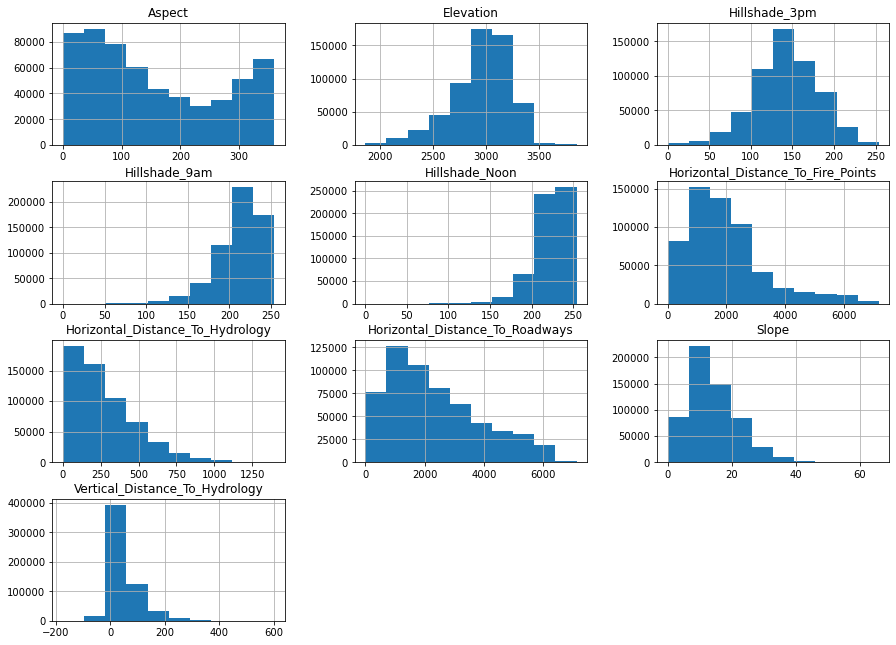

In [18]:
#histogram
cont_df.hist(figsize=(15, 11))
plt.show()

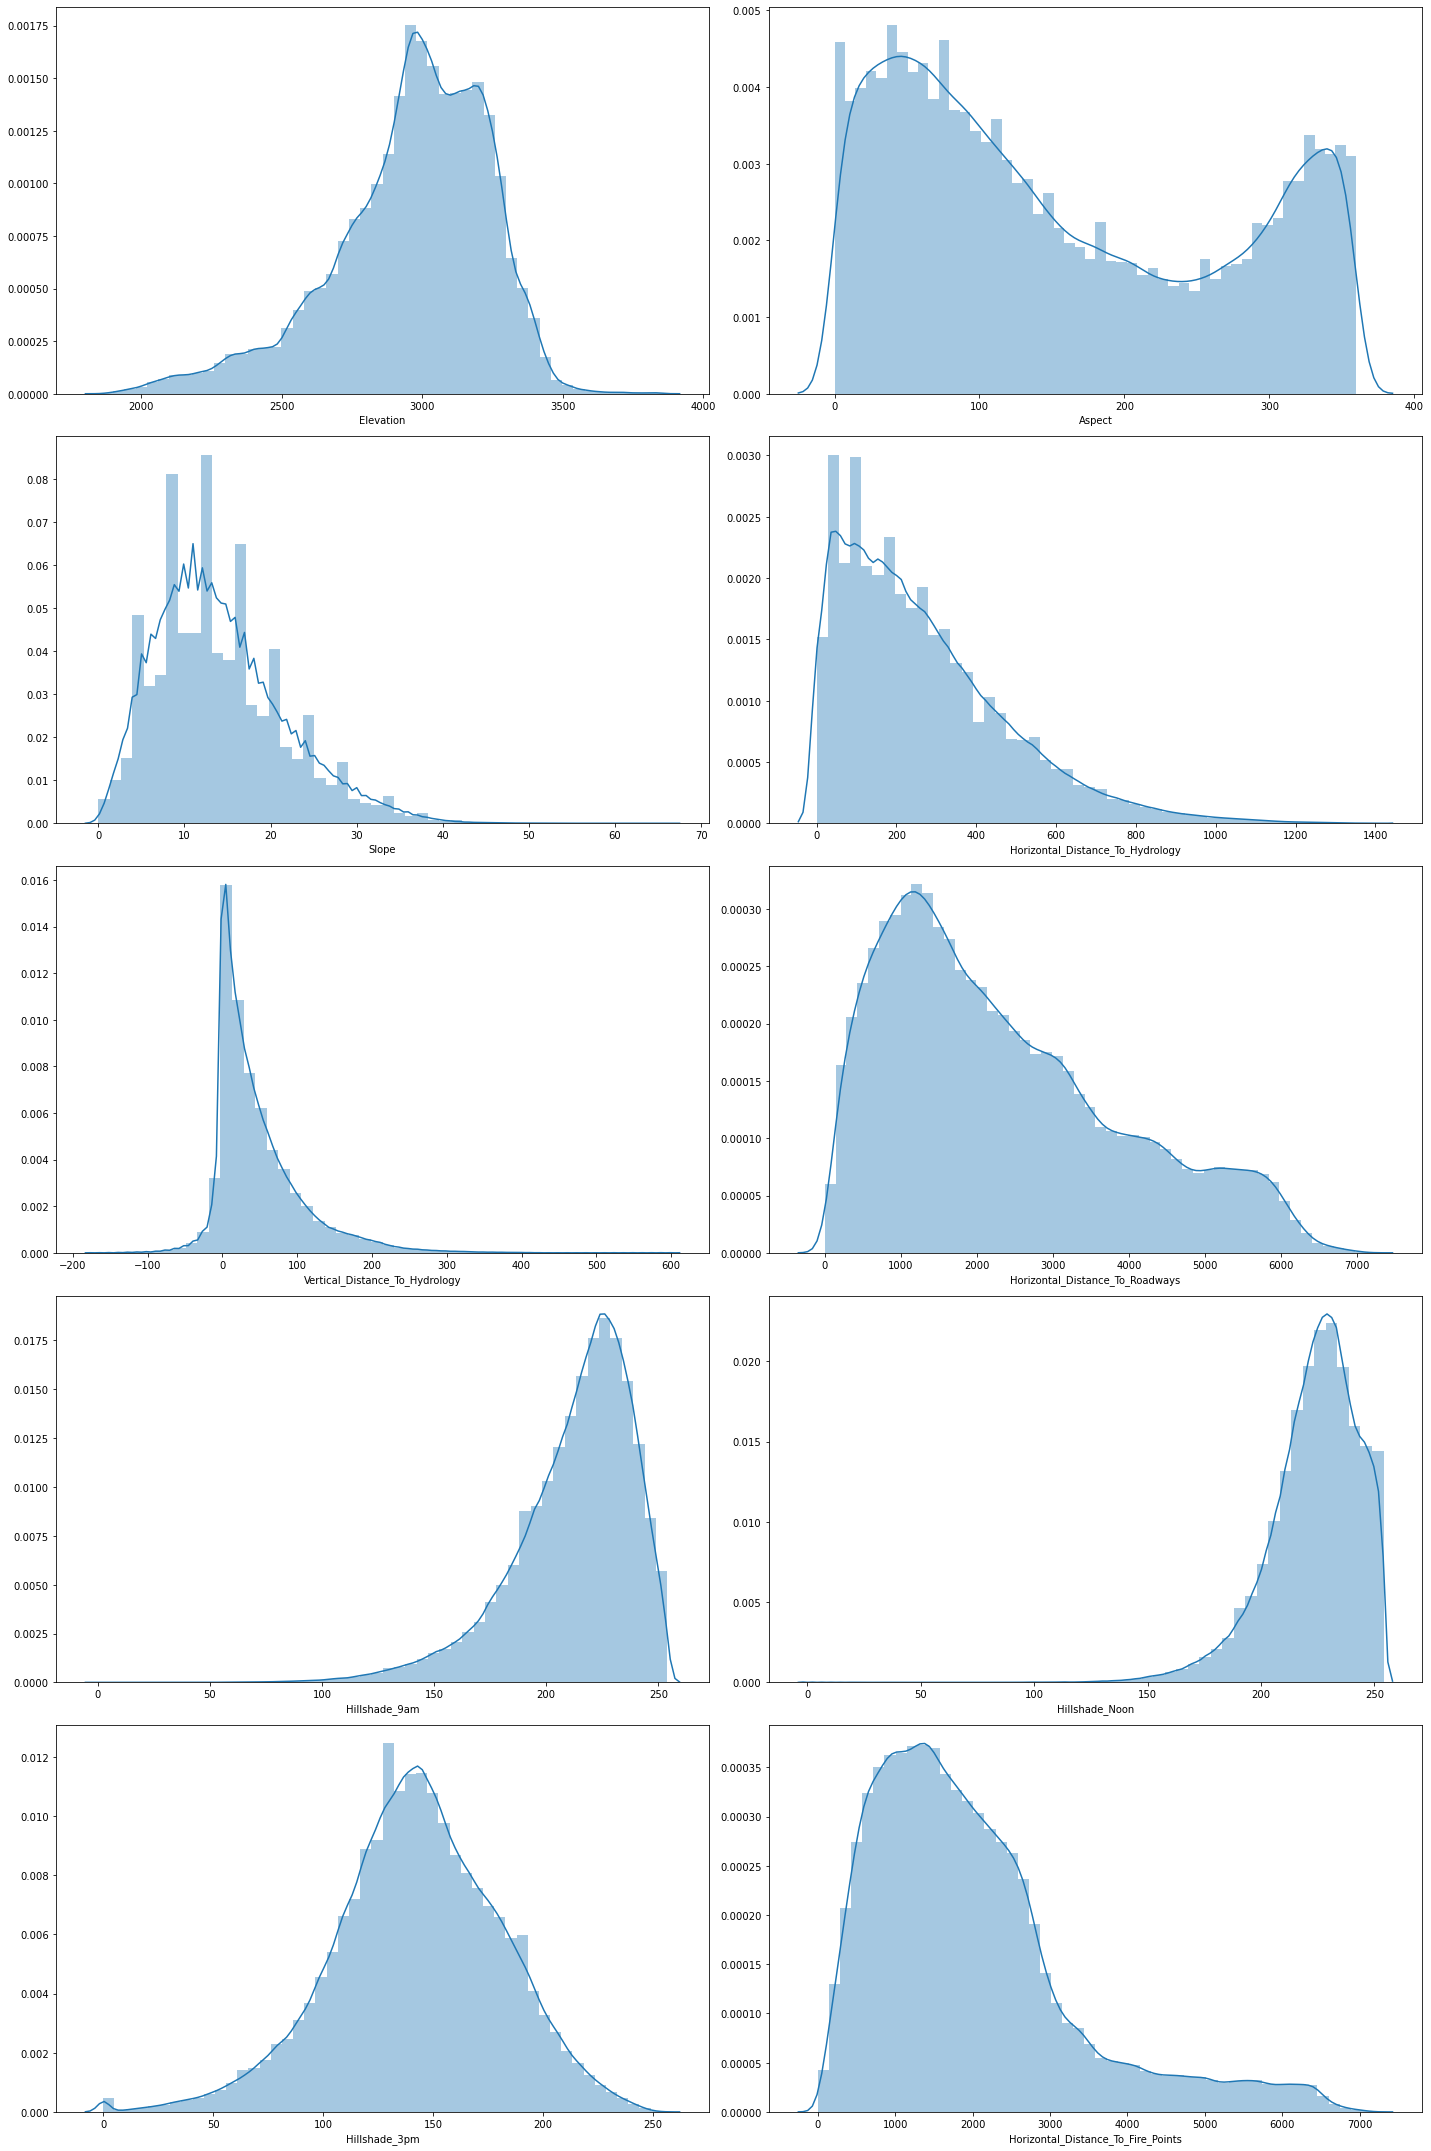

In [19]:
# pick number of columns
ncol = 2
# make sure enough subplots
nrow = math.floor((len(cont_df.columns) + ncol - 1) / ncol)
# create the axes
height = 6 * nrow
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(20, height))

# go over a linear list of data
for i, col in enumerate(cont_df.columns):
    # compute an appropriate index (1d or 2d)
    ix = np.unravel_index(i, ax.shape) 

    sns.distplot(cont_df[col], ax=ax[ix])

plt.tight_layout()
plt.show();

In [20]:
print(cont_df.skew())

Elevation                            -0.817602
Aspect                                0.402625
Slope                                 0.789274
Horizontal_Distance_To_Hydrology      1.140436
Vertical_Distance_To_Hydrology        1.790248
Horizontal_Distance_To_Roadways       0.713678
Hillshade_9am                        -1.181144
Hillshade_Noon                       -1.063054
Hillshade_3pm                        -0.277052
Horizontal_Distance_To_Fire_Points    1.288636
dtype: float64


# Outcomes

* The skewness values vary between fairly symmetrical (`Hillshade_3pm`) to highly skewed (`Vertical_Distance_To_Hydrlogy`). But in general I would say they are mostly moderately skewed.

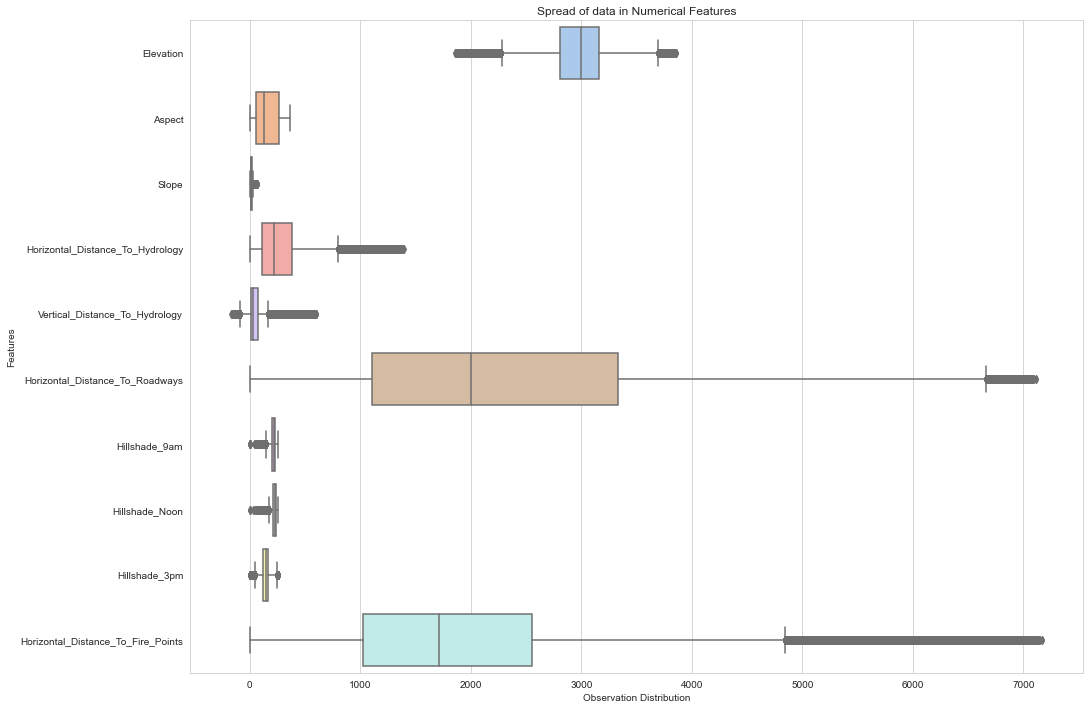

In [21]:
# Box and whiskers plot
# Spread of numerical features

sns.set_style("whitegrid")
plt.subplots(figsize=(16, 12))

# Using seaborn to plot it horizontally
sns.boxplot(data=cont_df, orient='h', palette='pastel')

plt.title('Spread of data in Numerical Features')
plt.xlabel('Observation Distribution')
plt.ylabel('Features')
plt.show();

In [22]:
print('Elevation min/max: {} - {} meters'.format(d['Elevation'].min(), d['Elevation'].max()))

Elevation min/max: 1859 - 3858 meters


# Outcomes

* As seen in the graph above `Slope` for example is highly dense. But we need to take into account that we are compairing several diverent data here. It would seem that the `Slope` would have a very narrow spread, but thats not true.
* Similarly, `Hillshade`'s features are dense in its range of values. 
* In comparison `Horizontal_Distance_To_Roadways` and `Horizontal_Distance_To_Fire_Points` have huge range of values.

All observations displayed above represent their range of values based on the type of measurements, i.e. degree, meter etc. Which may or may not be somewhat misleading. We should correct that and plot the features base on their measurement types (meter, degree and index).

In [23]:
#### Removing outliers by zscore

new = abs(zscore(d))

d_new = d[(new <3).all(axis=1)]

In [24]:
d_new.shape

(107905, 55)

In [25]:
d_new.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
26,2962,148,16,323,23,5916,240,236,120,3395,...,0,0,0,0,0,0,0,0,0,2
34,2900,45,19,242,20,5199,221,195,100,4115,...,0,0,0,0,0,0,0,0,0,2
40,2570,346,2,0,0,331,215,235,158,5745,...,0,0,0,0,0,0,0,0,0,2
60,2952,107,11,42,7,5845,239,226,116,3509,...,0,0,0,0,0,0,0,0,0,2
66,2919,13,13,90,6,5321,207,214,142,4060,...,0,0,0,0,0,0,0,0,0,1


In [26]:
cont_df_new = d_new.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

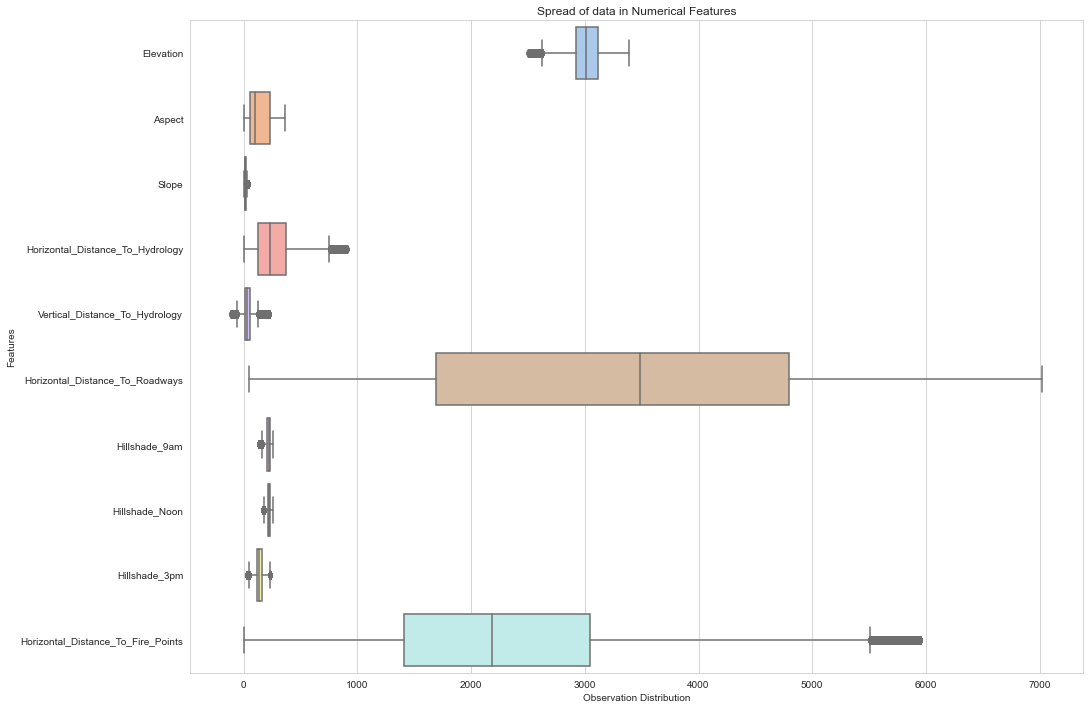

In [27]:
# Box and whiskers plot
# Spread of numerical features

sns.set_style("whitegrid")
plt.subplots(figsize=(16, 12))

# Using seaborn to plot it horizontally
sns.boxplot(data=cont_df_new, orient='h', palette='pastel')

plt.title('Spread of data in Numerical Features')
plt.xlabel('Observation Distribution')
plt.ylabel('Features')
plt.show();

In [28]:
d_new['Cover_Type'].value_counts()

2    67268
1    39659
5      978
Name: Cover_Type, dtype: int64

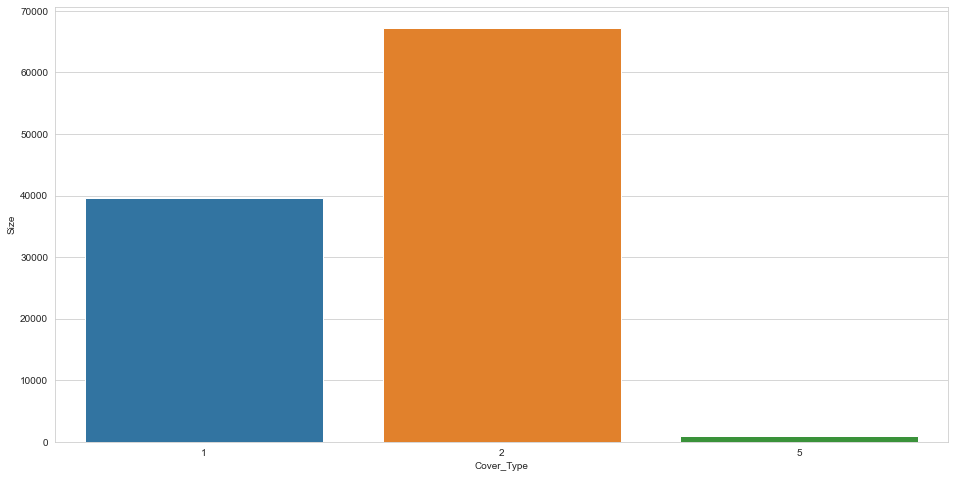

In [29]:
covertype_df = pd.DataFrame(d_new.groupby('Cover_Type').size(), columns=['Size'])

plt.figure(figsize=(16, 8))
sns.barplot(data=covertype_df, x=covertype_df.index, y='Size')
plt.show();

* After removal of outliers with zscore we have lost `4 class` of target variables
* We can not remove outliers as we have data from hills and ground level too, if we remove outliers we will lost much data
* As here we have lost 473106 entries in which we have lost 4 class of target variables

-----
-----

## Categorical Data

In [30]:
d2[['wilderness_area', 'Soil_type']].describe()

,wilderness_area,Soil_type
count,581011,581011
unique,4,40
top,Wilderness_Area_01,Soil_Type_29
freq,260795,115246


In [31]:
cat_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wilderness_Area_01,581011.0,0.448864,0.497379,0.0,0.0,0.0,1.0,1.0
Wilderness_Area_02,581011.0,0.051434,0.220882,0.0,0.0,0.0,0.0,1.0
Wilderness_Area_03,581011.0,0.436074,0.495897,0.0,0.0,0.0,1.0,1.0
Wilderness_Area_04,581011.0,0.063627,0.244088,0.0,0.0,0.0,0.0,1.0
Soil_Type_01,581011.0,0.005217,0.072039,0.0,0.0,0.0,0.0,1.0
Soil_Type_02,581011.0,0.012952,0.113066,0.0,0.0,0.0,0.0,1.0
Soil_Type_03,581011.0,0.008301,0.090731,0.0,0.0,0.0,0.0,1.0
Soil_Type_04,581011.0,0.021335,0.144499,0.0,0.0,0.0,0.0,1.0
Soil_Type_05,581011.0,0.002749,0.052356,0.0,0.0,0.0,0.0,1.0
Soil_Type_06,581011.0,0.011316,0.105775,0.0,0.0,0.0,0.0,1.0


# Outcomes

- Since here all the values can only be either 0 and 1. The mean can tell us useful information here. `Wilderness_Area1` has the highest mean followed by `Wilderness_Area3`, this means that `Wilderness_Area1` has the most presence in the data compared to other Wilderness Areas. In other words, most observation have features either `Wilderness_Area1` or `Wilderness_Area3`. The least amount of observation will be seen from `Wilderness_Area2`. We will visualize this and `Soil_Type` features later for better understanding these data

- One more thing to notice here is that when we add all the mean of `Wildernesss_Area`s `0.448864 + 0.051434 + 0.436074 + 0.063627` we get result `0.999999` which is approximately `1`. This actually makes sense because all the observations can be from any one Wilderness area. Crosschecking, I have also programmed to check whether any obsevation has 2 Wilderness Area and Soil type presence at the same time or None for assurance that our data is in appropriate form in

- Hence if we look at this in the probability perspective we can say that, the next observation that we get has `44.8%` probability that its been taken from `Wilderness_Area1`, `43.6%` probability that it's taken from `Wilderness_Area3` and so on for others.

- We can document same for `Soil_Type`s too.


By looking at these statistics of two different data types and since the features have different spreads and uneven amount of distribution, we will feature scale these so that all the feature have similar ranges. Some algorithm are very sensitive to high values hence giving us inapprpraite results while some algorithms are not. Do be on safe side we will feature scale it and will do this in `Feature Engineering` Section.

#### Wilderness Area

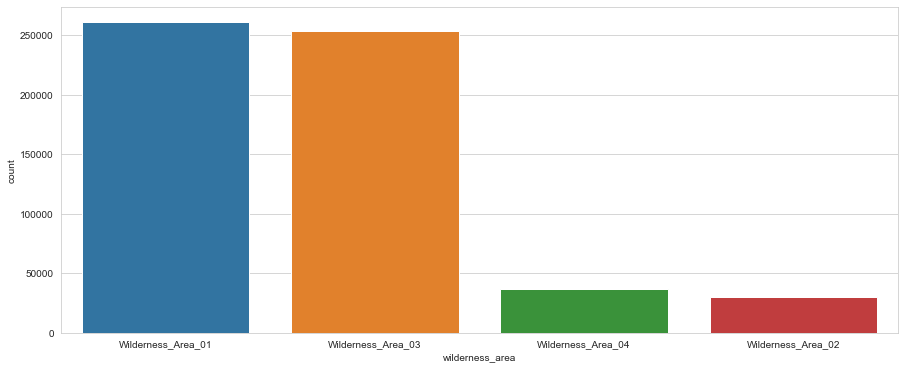

In [32]:
plt.figure(figsize=(15, 6))
sns.countplot(data=d2, x='wilderness_area')
plt.show();

And here's the visual proof, Wilderness_Area1 has the most presence followed by Wilderness_Area3, both have quite close observations and so were their mean value. Wilderness_Area2 having the least observation. Lets see their exact values for precision.

In [33]:
d2['wilderness_area'].value_counts()

Wilderness_Area_01    260795
Wilderness_Area_03    253364
Wilderness_Area_04     36968
Wilderness_Area_02     29884
Name: wilderness_area, dtype: int64

# Outcomes

- The difference of observations between `Wilderness_Area1` and `Wilderness_Area3` is approximately `7k`. 

- `Wilderness_Area2` and `Wilderness_Area4` may seem to have less observation but its not, as they have `~29k` and `~36k` observations respectively. Which is very good amount of observations.

#### Soil Type

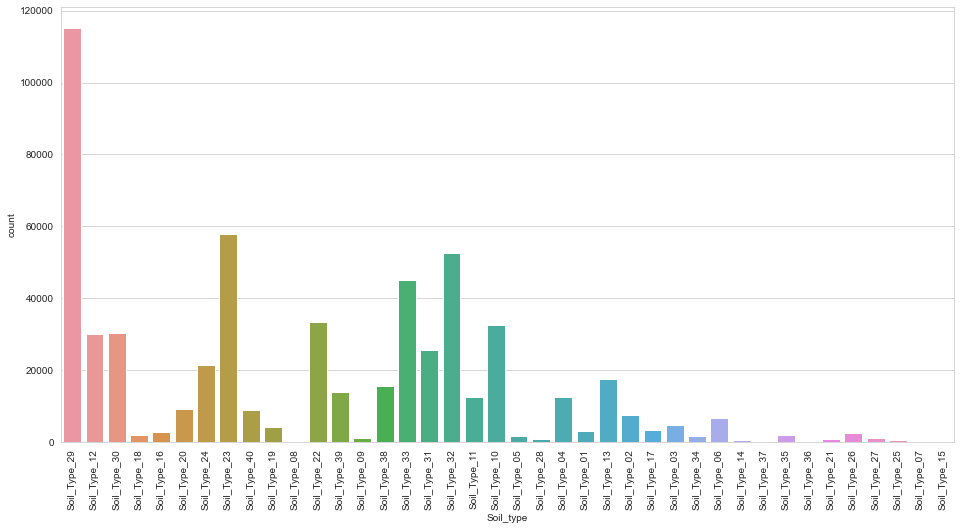

In [34]:
plt.figure(figsize=(16, 8))
sns.countplot(data=d2, x='Soil_type')
plt.xticks(rotation=90)
plt.show();

In [35]:
# Statistical description of Highest observation of Soil Type seen
d2[d2['Soil_type'] == 'Soil_Type_29']['Soil_type'].value_counts() / d2.shape[0] * 100

Soil_Type_29    19.835425
Name: Soil_type, dtype: float64

- The most observation is seen from `Soil_Type29`, it alone has presence in `19.83%` of observations in our data. It also had the least skewed value of all in `Soil Types` as we had seen earlier in Data Exploration.

In [36]:
d2[d2['Soil_type'] == 'Soil_Type_29']['Soil_type'].value_counts()

Soil_Type_29    115246
Name: Soil_type, dtype: int64

**Let's see the exact number of observations of `Soil Types` in descending order.**

In [37]:
round(d2['Soil_type'].value_counts(normalize = True)*100,5)

Soil_Type_29    19.83542
Soil_Type_23     9.93992
Soil_Type_32     9.03924
Soil_Type_33     7.77163
Soil_Type_22     5.74395
Soil_Type_10     5.61676
Soil_Type_30     5.19267
Soil_Type_12     5.15842
Soil_Type_31     4.41747
Soil_Type_24     3.66224
Soil_Type_13     3.00012
Soil_Type_38     2.68033
Soil_Type_39     2.37620
Soil_Type_11     2.13593
Soil_Type_04     2.13352
Soil_Type_20     1.59360
Soil_Type_40     1.50600
Soil_Type_02     1.29516
Soil_Type_06     1.13165
Soil_Type_03     0.83010
Soil_Type_19     0.69207
Soil_Type_17     0.58897
Soil_Type_01     0.52168
Soil_Type_16     0.48966
Soil_Type_26     0.44560
Soil_Type_18     0.32684
Soil_Type_35     0.32547
Soil_Type_34     0.27728
Soil_Type_05     0.27487
Soil_Type_09     0.19741
Soil_Type_27     0.18692
Soil_Type_28     0.16282
Soil_Type_21     0.14423
Soil_Type_14     0.10310
Soil_Type_25     0.08158
Soil_Type_37     0.05129
Soil_Type_08     0.03081
Soil_Type_36     0.02048
Soil_Type_07     0.01807
Soil_Type_15     0.00052


# Outcomes

* The most positive observations are seen in `Soil_Type29` with 115,247 counts followed by `Soil_Type23`, `Soil_Type32` and `Soil_Type33`.
* From a statistical standpoint, `Soil_Type29` is approximately `20%` represented in all of the data in regards to soil types.
* The least found soil type in the data is `Soil_Type15`, `Soil_Type7` and `Soil_Type36`.

-----
-----

## Class Distribution (Target)

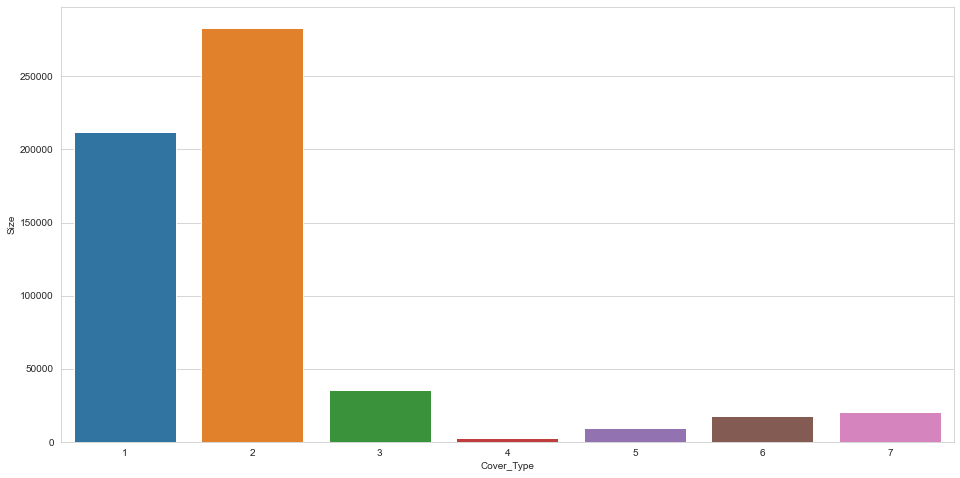

In [38]:
covertype_df = pd.DataFrame(d.groupby('Cover_Type').size(), columns=['Size'])

plt.figure(figsize=(16, 8))
sns.barplot(data=covertype_df, x=covertype_df.index, y='Size')
plt.show();

In [39]:
#About Target/Cover_Type variable 
print(target.value_counts())

2    283301
1    211840
3     35754
7     20510
6     17367
5      9492
4      2747
Name: Cover_Type, dtype: int64


In [40]:
t = d.groupby('Cover_Type').size()
print('Cover_Type 1 and 2 in percent: {:.2f}%'.format((t.values[0] + t.values[1]) / (d.shape[0] / 100)))

Cover_Type 1 and 2 in percent: 85.22%


# Outcomes

- We have uneven samples of forest cover type, where `Lodgepole Pine (2)` has the highest no. of observation followed by `Spruce (1)`. Only these 2 cover types add up to `495,141` number of observations out of `581,011` total which covers approx `85.2%` of data.

- But we do have enoough samples to train the model learning different patterns of each forest cover types. We will see how models performs with these uneven amount of distributions

**Feature Comparison**

Compare each feature in our data to our target variable, visualizing how much dense and distributed each target variable's class is compared to the feature. We will use Violin Plot to visualize this, a combination of Box Plot and Density Plot (Histogram).

In [41]:
col = cont_df.columns

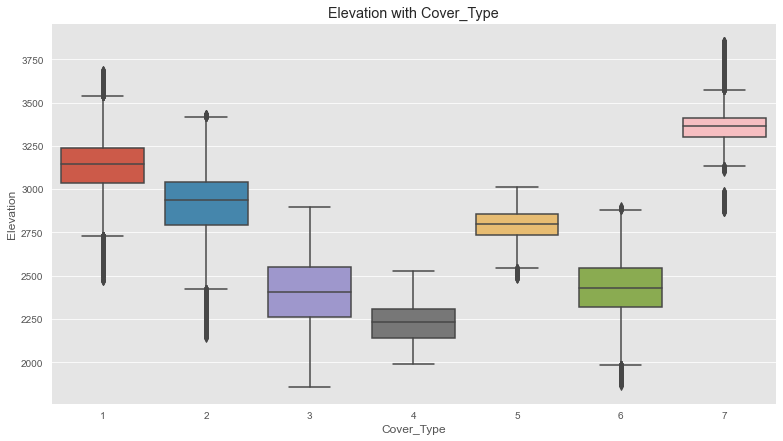

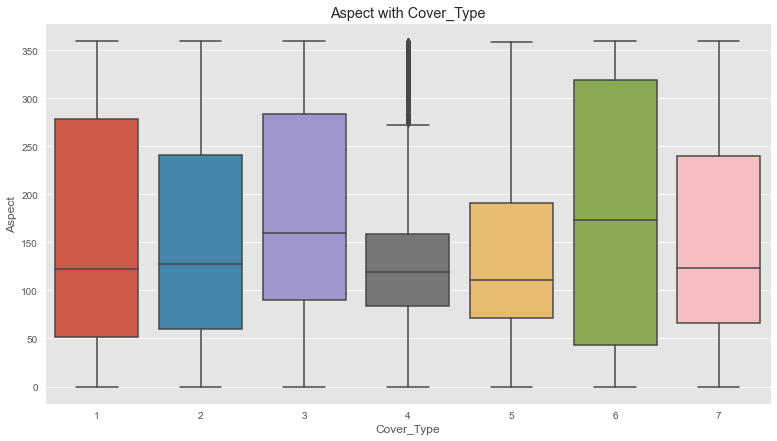

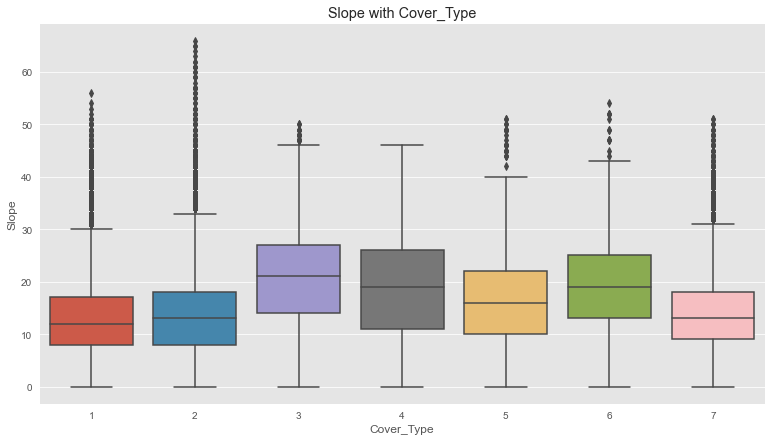

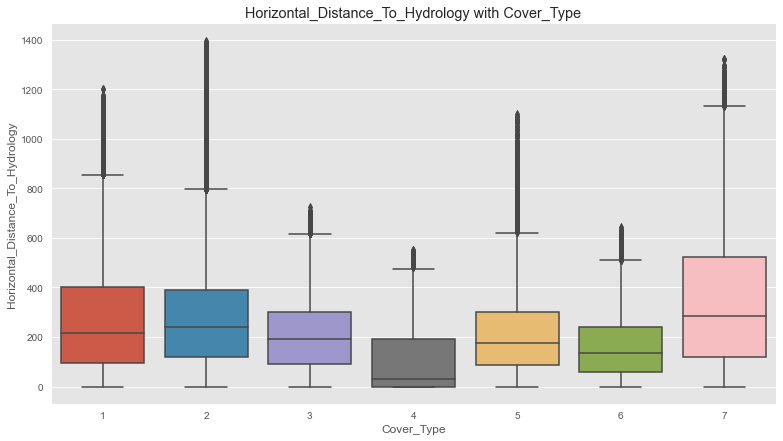

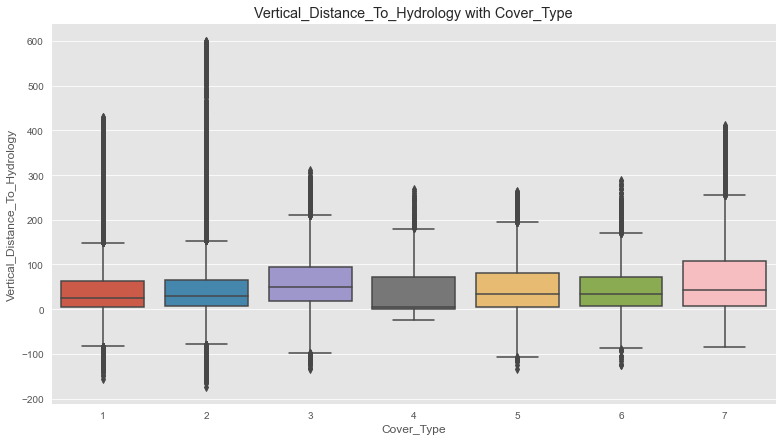

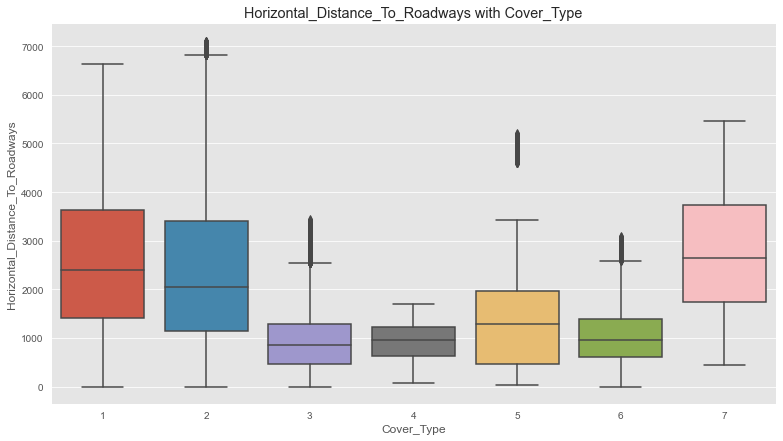

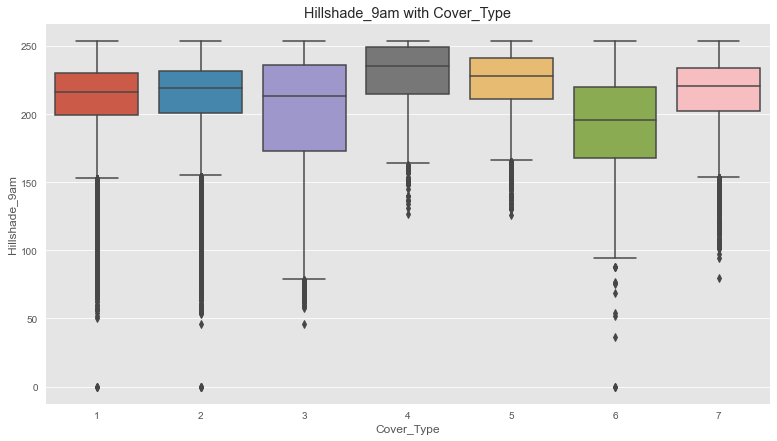

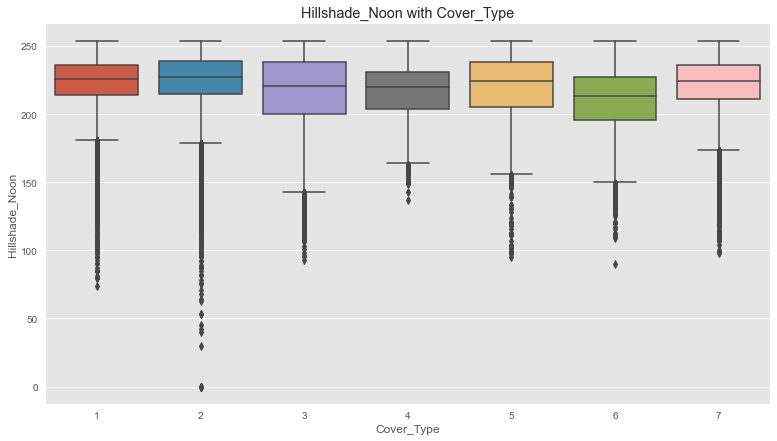

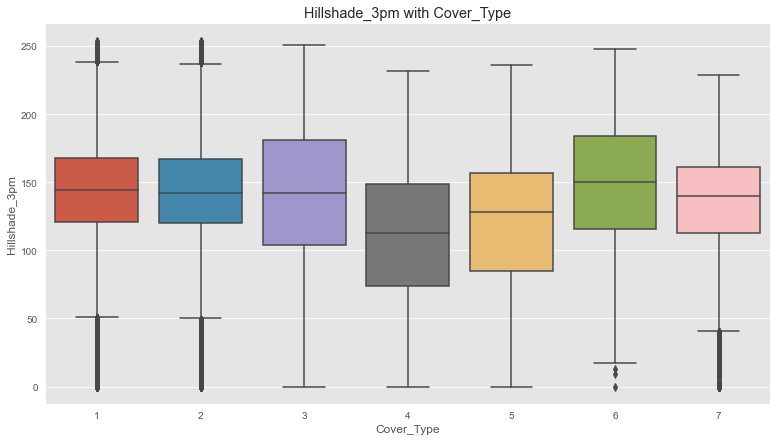

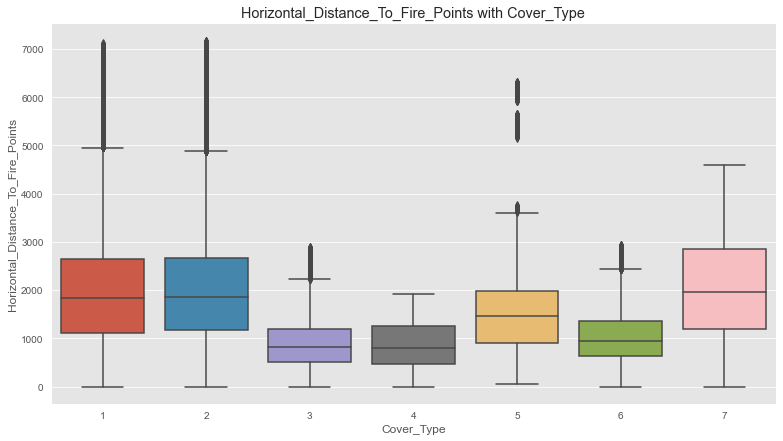

In [42]:
#Boxplot
plt.style.use('ggplot')
for i in col:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('Cover_Type'))
    sns.boxplot(x=d2.Cover_Type, y=d2[i])
    plt.show()

# Outcomes

* `Elevation` (meter) interestically differs very much by `Cover_Type`. For example, `Cover_tpye 7` is mainly seen in the higher elevations around 3400 meters.  Where as `Cover_Type 4`  can be found  between 2000 and about 2400 meters. 
* `Elevation` seems the most important feature due it's variation acroos all `Cover_Type`'s.
* `Aspect` (degrees azimuth[<sup>1</sup>](#fn1)) seems to have some concentration on either end of the spectrum. Most of them look like hourglasses.
* `Slope` (degree) has no clear distinction between `Cover_Type`, some have a wider range than others. 
* `Hillshade_9am` and `Hillshade_Noon` have a `negatively skewed distributions` with higher values between index 200-250 for most observations.
* `Hillshade_3pm` has a `normal distribution`. for all classes.


### Wilderness Areas

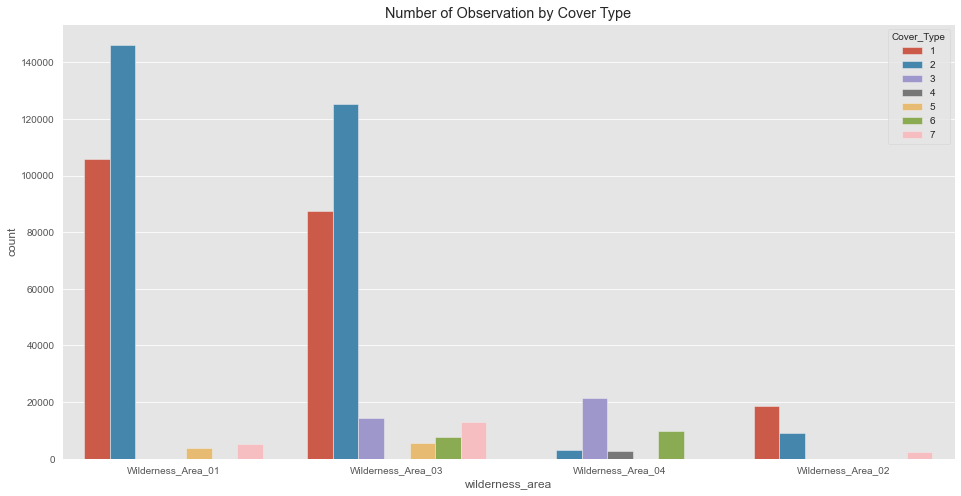

In [43]:
plt.figure(figsize=(16, 8))
sns.countplot(data=d2, x='wilderness_area', hue='Cover_Type')
plt.title('Number of Observation by Cover Type')
plt.show();

# Outcomes

We are looking at values `0` and `1`. But we can observe that `Wilderness_Area1` and `Wilderness_Area3` are more dominant across more `Cover_Type`'s.

### Soil Types

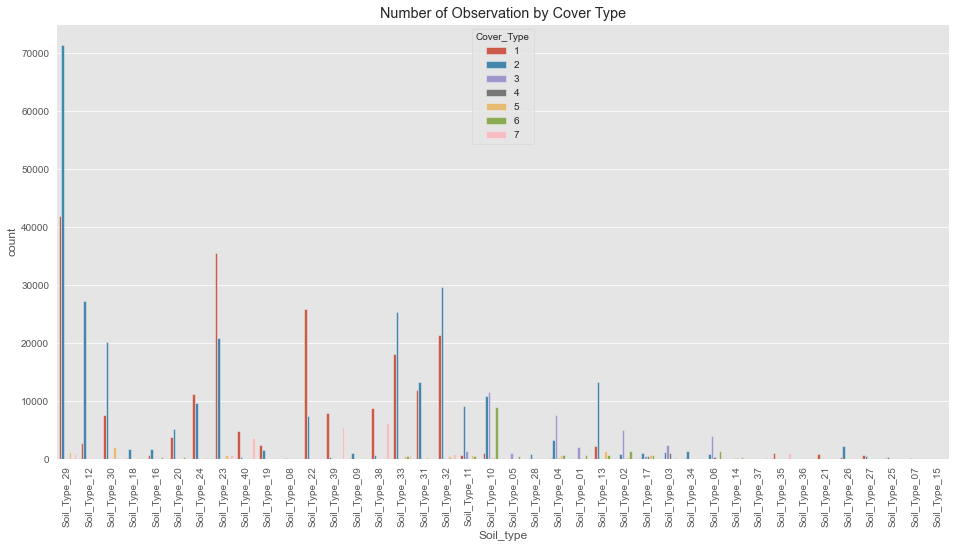

In [44]:
plt.figure(figsize=(16, 8))
sns.countplot(data=d2, x='Soil_type', hue='Cover_Type')
plt.title('Number of Observation by Cover Type')
plt.xticks(rotation=90)
plt.show();

## Correlation matrix

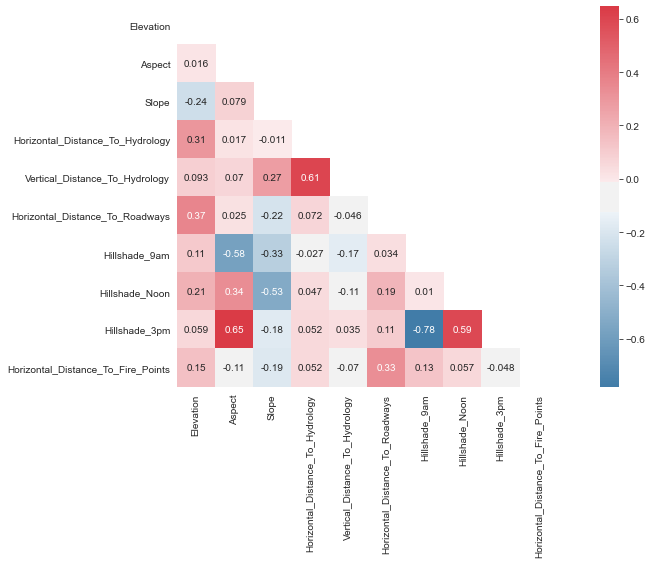

In [45]:
# Set the style of the visualization
sns.set_style('white')

# Create a Correlation matrix
corr = cont_df.corr()

# Generate a mask the size of our Correlation matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = None

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=20, n=9, as_cmap=True)

# Draw the heatmapwith the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, square=True, annot=True)

plt.show();

# Outcomes

* `Hilshade_3pm` is highly negatively correlated with `Hillshade_9am`. 

* `Horizontal _distance _to_Hydrology` is highly positively correlated with `Vertical_distance_to_Hydrology`.

* `Aspect` & `Hillshade _Noon` is positively correlated with `Hillshade_3pm`.

-------
-------

### INFERENTIAL STATISTICS 

In [46]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Cover_Type ~ Elevation + Aspect + Slope + Horizontal_Distance_To_Hydrology + Vertical_Distance_To_Hydrology + Horizontal_Distance_To_Roadways + Hillshade_9am + Hillshade_Noon + Hillshade_3pm + Horizontal_Distance_To_Fire_Points', data = d2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                                          sum_sq        df             F  \
Elevation                           5.450153e+04       1.0  30822.032998   
Aspect                              1.229070e+03       1.0    695.071152   
Slope                               1.901312e+02       1.0    107.524114   
Horizontal_Distance_To_Hydrology    1.566695e+02       1.0     88.600675   
Vertical_Distance_To_Hydrology      4.004712e+03       1.0   2264.768491   
Horizontal_Distance_To_Roadways     8.134652e+02       1.0    460.035717   
Hillshade_9am                       2.945675e+01       1.0     16.658560   
Hillshade_Noon                      8.743903e+01       1.0     49.449047   
Hillshade_3pm                       1.360444e+02       1.0     76.936636   
Horizontal_Distance_To_Fire_Points  2.220855e+03       1.0   1255.951071   
Residual                            1.027362e+06  581000.0           NaN   

                                           PR(>F)  
Elevation                          

* All are significant

In [47]:
# feeding all our features to var 'X'
X = d.iloc[:,:-1]
# feeding our target variable to var 'y'
y = d['Cover_Type']

### Dimensionality Reduction

- Since we already have lots of observation now to train the model, we also happen to have lots of features. This will make algorithm run very slowly, have difficulty in learning and also tend to overfit in training set and do worse in testing.

- We also see above in visualization section that `Wilderness Area` and `Soil Type` Area have no category that has no observations of it. So every feature has presence or values of an observations so we can't just delete any feature since it may have an important informations for our models in predicting classes.

- To approach such a problem, we need to see how each feature has an impact on prediciting classes, and the best way to do this is by asking the models only.

- Classifiers like `Extra Trees, Random Forest, Gradient Boosting Classifiers and AdaBoost` offer an attribute called `'feature_importance_'` with which we can see that which feature has more importance compared to others and by how much.

So now let's run all the 4 classifiers on our entire model, train from it and give us which feature for that was important in terms of predicting classes.

In [48]:
# Create an empty dataframe to hold our findings for feature_importances_
ranking_df = pd.DataFrame()

##### Extra-Trees Classifier

In [49]:
%%time
ETC_model = ExtraTreesClassifier(random_state=0, n_jobs=-1)
ETC_model.fit(X, y)

importances = ETC_model.feature_importances_
indices = np.argsort(importances)[::-1]

etc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
ranking_df['ETC'] = etc_list

etci_list = [importances[indices[f]] for f in range(X.shape[1])]
ranking_df['ETC importance'] = etci_list

Wall time: 1min 5s


##### Random Forest Classifier

In [50]:
%%time
RFC_model = RandomForestClassifier(random_state=0, n_jobs=-1)
RFC_model.fit(X, y)

importances = RFC_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature name
rfc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
ranking_df['RFC'] = rfc_list

# Get feature importance
rfci_list = [importances[indices[f]] for f in range(X.shape[1])]
ranking_df['RFC importance'] = rfci_list

Wall time: 1min 29s


##### AdaBoost Classifier

In [51]:
%%time
ABC_model = AdaBoostClassifier(random_state=0)
ABC_model.fit(X, y)

importances = ABC_model.feature_importances_
indices = np.argsort(importances)[::-1]

abc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
ranking_df['ABC'] = abc_list

abci_list = [importances[indices[f]] for f in range(X.shape[1])]
ranking_df['ABC importance'] = abci_list

Wall time: 1min 26s


##### Gradient Boosting Classifier

In [52]:
%%time
GBC_model = GradientBoostingClassifier(random_state=0)
GBC_model.fit(X, y)

importances = GBC_model.feature_importances_
indices = np.argsort(importances)[::-1]

gbc_list = [X.columns[indices[f]] for f in range(X.shape[1])]
ranking_df['GBC'] = gbc_list

gbci_list = [importances[indices[f]] for f in range(X.shape[1])]
ranking_df['GBC importance'] = gbci_list

Wall time: 28min 45s


In [53]:
ranking_df.head(25)

,ETC,ETC importance,RFC,RFC importance,ABC,ABC importance,GBC,GBC importance
0,Elevation,0.198728,Elevation,0.242320,Wilderness_Area_04,0.44,Elevation,0.645612
1,Horizontal_Distance_To_Roadways,0.112045,Horizontal_Distance_To_Roadways,0.119388,Elevation,0.24,Horizontal_Distance_To_Roadways,0.054666
2,Horizontal_Distance_To_Fire_Points,0.105413,Horizontal_Distance_To_Fire_Points,0.112960,Horizontal_Distance_To_Hydrology,0.14,Horizontal_Distance_To_Fire_Points,0.041287
3,Horizontal_Distance_To_Hydrology,0.064668,Horizontal_Distance_To_Hydrology,0.060631,Soil_Type_04,0.06,Horizontal_Distance_To_Hydrology,0.038741
4,Vertical_Distance_To_Hydrology,0.058937,Vertical_Distance_To_Hydrology,0.057432,Slope,0.04,Wilderness_Area_01,0.026650
5,Aspect,0.052280,Aspect,0.047223,Vertical_Distance_To_Hydrology,0.04,Hillshade_Noon,0.025465
6,Hillshade_Noon,0.045419,Hillshade_Noon,0.042396,Aspect,0.02,Soil_Type_04,0.016921
7,Hillshade_9am,0.043332,Hillshade_3pm,0.040128,Soil_Type_10,0.02,Soil_Type_22,0.016700
8,Hillshade_3pm,0.042409,Hillshade_9am,0.040075,Soil_Type_02,0.00,Wilderness_Area_03,0.013628
9,Slope,0.036738,Wilderness_Area_04,0.033678,Soil_Type_11,0.00,Soil_Type_02,0.012659


### Feature selection

# Outcomes

Here we can see from each classifier the top 25 features.

* `Random Forest` and `Extra Tree` Classifier show the most similar results.
* `Gradian Boosting` shows similar names just in a different order compared to `Random Forest` and `Extra Tree`
* `AdaBoost` on the other hand shows an interesting and unique result. The top 8 feature alone are enough to make a good class prediction. Compare to all the other classifiers, here we have `Wilderness_Area4` on top, before `Elevation`.
* `Elevation` dominates in all classifiers with a range of `18-65%`.
* `Hillshade` features are seen in the top 20 in 3 out of 4 classifiers. `Random Forest` and `Extra Tree` Classifier show that `Hillshade` features having similar ranging.
* `Horizontal_Distance_To_Hydrology` and `Vertical_Distance_To_Hydrology` are in all classifier top 10.
* `Horizontal_Distance_To_Roadways` and `Horizontal_Distance_To_Fire_Points` are represented on the top in 3 out of 4 classifiers.
* `Aspect` and `Slope` also show up in the top 20 across all classifiers, with the exception in `Gradian Boosting` `Slope` isn't in the top 20.
* In regards to `Soil_Type` it is hard to find some commonality. Here are just a few:
    * `Soil_Type2`
    * `Soil_Type4`
    * `Soil_Type10`
    * `Soil_Type22`
    * `Soil_Type23`
    * `Soil_Type39`
    

**Technical Note:**

Avoid `GradientBoostingClassifier` due to time it takes to run -> `25min 57s`

**Comparing the top 25 features evaluated by Random Forest and Extra Tree Classifier side by side**

In [54]:
ranking_df[['RFC','ETC']].head(25)

,RFC,ETC
0,Elevation,Elevation
1,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Roadways
2,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Fire_Points
3,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Hydrology
4,Vertical_Distance_To_Hydrology,Vertical_Distance_To_Hydrology
5,Aspect,Aspect
6,Hillshade_Noon,Hillshade_Noon
7,Hillshade_3pm,Hillshade_9am
8,Hillshade_9am,Hillshade_3pm
9,Wilderness_Area_04,Slope


Out of all features, We would like to go with Top 25 based on score and our intuition.

In [55]:
new_d = d[['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points',
       'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Aspect', 'Hillshade_Noon',
       'Hillshade_9am', 'Hillshade_3pm', 'Wilderness_Area_04', 'Slope',
       'Soil_Type_12', 'Soil_Type_22', 'Wilderness_Area_03',
       'Soil_Type_10', 'Soil_Type_39', 'Soil_Type_38', 'Soil_Type_04',
       'Soil_Type_23', 'Wilderness_Area_01', 'Soil_Type_02',
       'Soil_Type_40', 'Soil_Type_13', 'Soil_Type_29', 'Soil_Type_30', 'Cover_Type']]

### Apply base algorithm

In [56]:
# feeding all our features to var 'X'
X = new_d.iloc[:,:-1]
# feeding our target variable to var 'y'
y = new_d['Cover_Type']

In [57]:
#Split the data into test and train formate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((406707, 25), (174304, 25), (406707,), (174304,))

#### Feature Scaling

One last step before we move to splitting our data to Train-Test Split is to scale the features to some specific range. This is called Feature Scaling. But before we do this we will split the feature and target variables because we don't want to scale our target variable.

In [58]:
cols = X_train.columns
scaler = StandardScaler()

# apply feature scaling to all features
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [59]:
# our data after feature scaling
X_train = pd.DataFrame(X_scaled_train, columns = cols)
X_test = pd.DataFrame(X_scaled_test, columns = cols)

## Model Building

### Logistic Regression

In [60]:
%%time
LR = LogisticRegression()
LR.fit(X_train , y_train)

y_pred_LR = LR.predict(X_test)

#score
print("Train Accuracy -- ", LR.score(X_train, y_train)*100)
print("Test Accuracy -- ", LR.score(X_test, y_test)*100)

# Cross validation score
scoresdt = cross_val_score(LR, X, y, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))
print('Cross validation std           : ',round(scoresdt.std(), 4))

#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

print(classification_report(y_test,y_pred_LR))

Train Accuracy --  71.91639189883627
Test Accuracy --  71.7975491096016
Cross validation score         :  0.5992
Cross validation std           :  0.0521
Bias Errors (1-Accuracy/R2)    :  0.4008
Variance Errors                :  0.0027
              precision    recall  f1-score   support

           1       0.71      0.69      0.70     63619
           2       0.74      0.80      0.77     85042
           3       0.66      0.81      0.73     10692
           4       0.66      0.36      0.46       819
           5       0.00      0.00      0.00      2861
           6       0.45      0.20      0.27      5201
           7       0.72      0.54      0.61      6070

    accuracy                           0.72    174304
   macro avg       0.56      0.48      0.51    174304
weighted avg       0.70      0.72      0.71    174304

Wall time: 9min 19s


Wall time: 692 ms


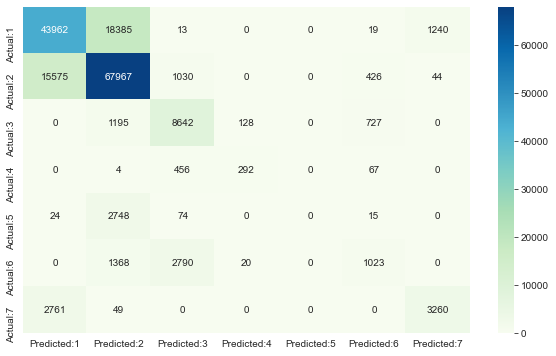

In [61]:
%%time
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_LR)
conf_matrix=pd.DataFrame(data=cm,
                         columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5','Predicted:6','Predicted:7'],
                         index=['Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6','Actual:7'])
plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="GnBu")

### Decision Tree

In [62]:
%%time
DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)

y_pred_DT = DT.predict(X_test)

#score
print("Train Accuracy -- ", DT.score(X_train, y_train)*100)
print("Test Accuracy -- ", DT.score(X_test, y_test)*100)

# Cross validation score
scoresdt = cross_val_score(DT, X, y, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))
print('Cross validation std           : ',round(scoresdt.std(), 4))

#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

print(classification_report(y_test,y_pred_DT))

Train Accuracy --  100.0
Test Accuracy --  92.90262988801175
Cross validation score         :  0.5855
Cross validation std           :  0.0467
Bias Errors (1-Accuracy/R2)    :  0.4145
Variance Errors                :  0.0022
              precision    recall  f1-score   support

           1       0.93      0.93      0.93     63619
           2       0.94      0.94      0.94     85042
           3       0.92      0.92      0.92     10692
           4       0.82      0.83      0.82       819
           5       0.81      0.80      0.81      2861
           6       0.86      0.85      0.85      5201
           7       0.94      0.94      0.94      6070

    accuracy                           0.93    174304
   macro avg       0.89      0.89      0.89    174304
weighted avg       0.93      0.93      0.93    174304

Wall time: 1min 39s


Wall time: 389 ms


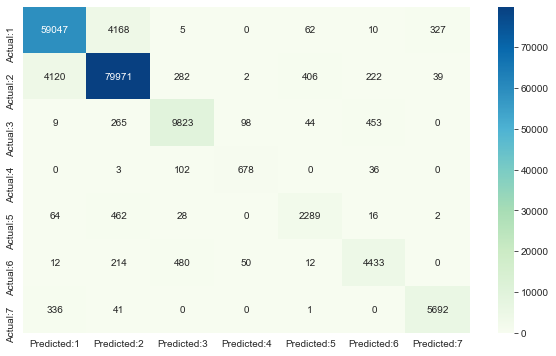

In [63]:
%%time
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_DT)
conf_matrix=pd.DataFrame(data=cm,
                         columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5','Predicted:6','Predicted:7'],
                         index=['Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6','Actual:7'])
plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="GnBu")

### Random Forest

In [64]:
%%time
RF = RandomForestClassifier(n_jobs = -1)
#fit
RF.fit(X_train, y_train)
#prediction
y_pred_RF = RF.predict(X_test)

#score
print("Train Accuracy -- ", RF.score(X_train, y_train)*100)
print("Test Accuracy -- ", RF.score(X_test, y_test)*100)

# Cross validation score
scoresdt = cross_val_score(RF, X, y, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))
print('Cross validation std           : ',round(scoresdt.std(), 4))

#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

print(classification_report(y_test,y_pred_RF))

Train Accuracy --  100.0
Test Accuracy --  95.35007802460069
Cross validation score         :  0.6304
Cross validation std           :  0.0659
Bias Errors (1-Accuracy/R2)    :  0.3696
Variance Errors                :  0.0043
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63619
           2       0.95      0.97      0.96     85042
           3       0.94      0.96      0.95     10692
           4       0.91      0.83      0.87       819
           5       0.94      0.75      0.84      2861
           6       0.93      0.90      0.91      5201
           7       0.97      0.95      0.96      6070

    accuracy                           0.95    174304
   macro avg       0.94      0.90      0.92    174304
weighted avg       0.95      0.95      0.95    174304

Wall time: 16min 6s


Wall time: 801 ms


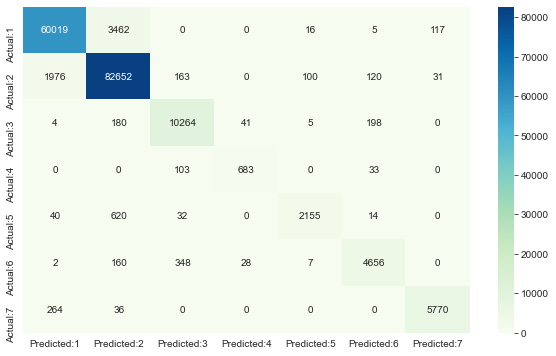

In [65]:
%%time
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_RF)
conf_matrix=pd.DataFrame(data=cm,
                         columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5','Predicted:6','Predicted:7'],
                         index=['Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6','Actual:7'])
plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="GnBu")

# Outcomes

* The true positive rate is best for `Spruce (1)`, `Lodgepole Pine (2)`, in this Random Forest base model.

* High precision value is for `covertype 7` and high recall value is for `covertype 2 and 3`.


### LGBM

In [66]:
%%time
LGBM = LGBMClassifier(n_estimators=200, n_jobs = -1)
#fit
LGBM.fit(X_train, y_train)
#prediction
y_pred_LGBM = LGBM.predict(X_test)

#score
print("Train Accuracy -- ", LGBM.score(X_train, y_train)*100)
print("Test Accuracy -- ", LGBM.score(X_test, y_test)*100)

# Cross validation score
scoresdt = cross_val_score(LGBM, X, y, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))
print('Cross validation std           : ',round(scoresdt.std(), 4))

#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

print(classification_report(y_test,y_pred_LGBM))

Train Accuracy --  86.5382203896171
Test Accuracy --  85.53676335597576
Cross validation score         :  0.6163
Cross validation std           :  0.0725
Bias Errors (1-Accuracy/R2)    :  0.3837
Variance Errors                :  0.0053
              precision    recall  f1-score   support

           1       0.85      0.82      0.83     63619
           2       0.85      0.89      0.87     85042
           3       0.89      0.91      0.90     10692
           4       0.88      0.80      0.84       819
           5       0.89      0.58      0.70      2861
           6       0.84      0.79      0.81      5201
           7       0.95      0.90      0.92      6070

    accuracy                           0.86    174304
   macro avg       0.88      0.81      0.84    174304
weighted avg       0.86      0.86      0.85    174304

Wall time: 11min 5s


Wall time: 390 ms


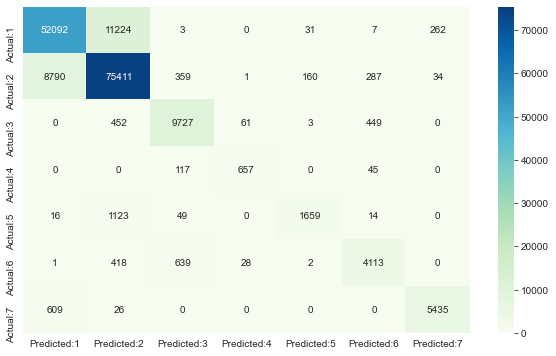

In [67]:
%%time
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_LGBM)
conf_matrix=pd.DataFrame(data=cm,
                         columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5','Predicted:6','Predicted:7'],
                         index=['Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6','Actual:7'])
plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="GnBu")

### KNN

In [68]:
%%time
KNN = KNeighborsClassifier(metric='minkowski', n_jobs = -1)

#fit
KNN.fit(X_train, y_train)
#prediction
y_pred_KNN = KNN.predict(X_test)

#score
print("Train Accuracy -- ", KNN.score(X_train, y_train)*100)
print("Test Accuracy -- ", KNN.score(X_test, y_test)*100)

# Cross validation score
scoresdt = cross_val_score(KNN, X, y, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))
print('Cross validation std           : ',round(scoresdt.std(), 4))

#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

print(classification_report(y_test,y_pred_KNN))

Train Accuracy --  95.05639194801171
Test Accuracy --  91.91871672480264
Cross validation score         :  0.5414
Cross validation std           :  0.0438
Bias Errors (1-Accuracy/R2)    :  0.4586
Variance Errors                :  0.0019
              precision    recall  f1-score   support

           1       0.93      0.92      0.92     63619
           2       0.93      0.94      0.93     85042
           3       0.89      0.89      0.89     10692
           4       0.79      0.72      0.75       819
           5       0.84      0.75      0.79      2861
           6       0.80      0.78      0.79      5201
           7       0.94      0.93      0.94      6070

    accuracy                           0.92    174304
   macro avg       0.87      0.85      0.86    174304
weighted avg       0.92      0.92      0.92    174304

Wall time: 38min 50s


Wall time: 359 ms


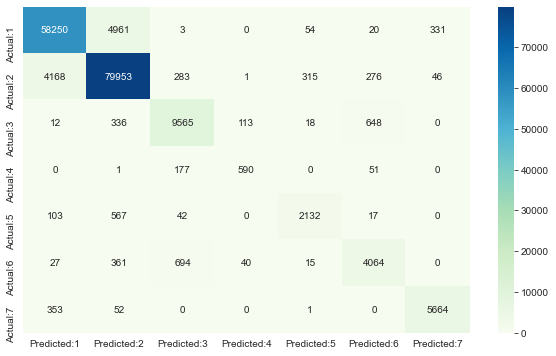

In [69]:
%%time
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_KNN)
conf_matrix=pd.DataFrame(data=cm,
                         columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5','Predicted:6','Predicted:7'],
                         index=['Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6','Actual:7'])
plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="GnBu")

### CatBoost

In [74]:
%%time
CB = CatBoostClassifier(n_estimators=1600)

#fit
CB.fit(X_train, y_train)
#prediction
y_pred_CB = CB.predict(X_test)

#score
print("Train Accuracy -- ", CB.score(X_train, y_train)*100)
print("Test Accuracy -- ", CB.score(X_test, y_test)*100)

Learning rate set to 0.072263
0:	learn: 1.7488034	total: 434ms	remaining: 11m 34s
1:	learn: 1.6069628	total: 819ms	remaining: 10m 54s
2:	learn: 1.4946296	total: 1.26s	remaining: 11m 12s
3:	learn: 1.4028213	total: 1.69s	remaining: 11m 15s
4:	learn: 1.3259758	total: 2.14s	remaining: 11m 21s
5:	learn: 1.2616168	total: 2.52s	remaining: 11m 8s
6:	learn: 1.2064640	total: 2.9s	remaining: 11m
7:	learn: 1.1573776	total: 3.34s	remaining: 11m 4s
8:	learn: 1.1144221	total: 3.73s	remaining: 10m 59s
9:	learn: 1.0768763	total: 4.09s	remaining: 10m 50s
10:	learn: 1.0433586	total: 4.46s	remaining: 10m 44s
11:	learn: 1.0125221	total: 5s	remaining: 11m 2s
12:	learn: 0.9859669	total: 5.48s	remaining: 11m 8s
13:	learn: 0.9606005	total: 5.88s	remaining: 11m 6s
14:	learn: 0.9365784	total: 6.27s	remaining: 11m 2s
15:	learn: 0.9155549	total: 6.71s	remaining: 11m 4s
16:	learn: 0.8962939	total: 7.12s	remaining: 11m 2s
17:	learn: 0.8785016	total: 7.55s	remaining: 11m 3s
18:	learn: 0.8624174	total: 7.95s	remaining

156:	learn: 0.5289519	total: 1m 1s	remaining: 9m 20s
157:	learn: 0.5284612	total: 1m 1s	remaining: 9m 20s
158:	learn: 0.5280982	total: 1m 1s	remaining: 9m 19s
159:	learn: 0.5275635	total: 1m 2s	remaining: 9m 18s
160:	learn: 0.5269258	total: 1m 2s	remaining: 9m 17s
161:	learn: 0.5264386	total: 1m 2s	remaining: 9m 17s
162:	learn: 0.5259169	total: 1m 3s	remaining: 9m 16s
163:	learn: 0.5251860	total: 1m 3s	remaining: 9m 16s
164:	learn: 0.5245154	total: 1m 3s	remaining: 9m 15s
165:	learn: 0.5239407	total: 1m 4s	remaining: 9m 15s
166:	learn: 0.5234236	total: 1m 4s	remaining: 9m 14s
167:	learn: 0.5228891	total: 1m 5s	remaining: 9m 14s
168:	learn: 0.5222353	total: 1m 5s	remaining: 9m 13s
169:	learn: 0.5213665	total: 1m 5s	remaining: 9m 13s
170:	learn: 0.5208042	total: 1m 6s	remaining: 9m 12s
171:	learn: 0.5201382	total: 1m 6s	remaining: 9m 12s
172:	learn: 0.5193431	total: 1m 6s	remaining: 9m 12s
173:	learn: 0.5185488	total: 1m 7s	remaining: 9m 11s
174:	learn: 0.5179788	total: 1m 7s	remaining: 

309:	learn: 0.4614573	total: 1m 59s	remaining: 8m 17s
310:	learn: 0.4610525	total: 1m 59s	remaining: 8m 16s
311:	learn: 0.4607687	total: 2m	remaining: 8m 16s
312:	learn: 0.4602620	total: 2m	remaining: 8m 15s
313:	learn: 0.4599582	total: 2m	remaining: 8m 15s
314:	learn: 0.4594946	total: 2m 1s	remaining: 8m 15s
315:	learn: 0.4592524	total: 2m 1s	remaining: 8m 14s
316:	learn: 0.4590412	total: 2m 2s	remaining: 8m 14s
317:	learn: 0.4586506	total: 2m 2s	remaining: 8m 13s
318:	learn: 0.4583805	total: 2m 2s	remaining: 8m 13s
319:	learn: 0.4581526	total: 2m 3s	remaining: 8m 12s
320:	learn: 0.4579660	total: 2m 3s	remaining: 8m 12s
321:	learn: 0.4575612	total: 2m 3s	remaining: 8m 11s
322:	learn: 0.4573061	total: 2m 4s	remaining: 8m 11s
323:	learn: 0.4571149	total: 2m 4s	remaining: 8m 11s
324:	learn: 0.4568266	total: 2m 5s	remaining: 8m 10s
325:	learn: 0.4562518	total: 2m 5s	remaining: 8m 10s
326:	learn: 0.4557642	total: 2m 5s	remaining: 8m 9s
327:	learn: 0.4554382	total: 2m 6s	remaining: 8m 9s
32

462:	learn: 0.4199211	total: 2m 56s	remaining: 7m 13s
463:	learn: 0.4197024	total: 2m 57s	remaining: 7m 13s
464:	learn: 0.4192871	total: 2m 57s	remaining: 7m 12s
465:	learn: 0.4190879	total: 2m 57s	remaining: 7m 12s
466:	learn: 0.4188754	total: 2m 58s	remaining: 7m 12s
467:	learn: 0.4186520	total: 2m 58s	remaining: 7m 11s
468:	learn: 0.4183391	total: 2m 58s	remaining: 7m 11s
469:	learn: 0.4181875	total: 2m 59s	remaining: 7m 10s
470:	learn: 0.4180453	total: 2m 59s	remaining: 7m 10s
471:	learn: 0.4179062	total: 2m 59s	remaining: 7m 10s
472:	learn: 0.4175796	total: 3m	remaining: 7m 9s
473:	learn: 0.4174360	total: 3m	remaining: 7m 9s
474:	learn: 0.4172387	total: 3m 1s	remaining: 7m 8s
475:	learn: 0.4170374	total: 3m 1s	remaining: 7m 8s
476:	learn: 0.4169070	total: 3m 1s	remaining: 7m 7s
477:	learn: 0.4166847	total: 3m 2s	remaining: 7m 7s
478:	learn: 0.4164378	total: 3m 2s	remaining: 7m 7s
479:	learn: 0.4162796	total: 3m 2s	remaining: 7m 6s
480:	learn: 0.4160822	total: 3m 3s	remaining: 7m 6

615:	learn: 0.3917514	total: 3m 53s	remaining: 6m 13s
616:	learn: 0.3915503	total: 3m 54s	remaining: 6m 13s
617:	learn: 0.3913062	total: 3m 54s	remaining: 6m 12s
618:	learn: 0.3912239	total: 3m 54s	remaining: 6m 12s
619:	learn: 0.3910501	total: 3m 55s	remaining: 6m 11s
620:	learn: 0.3909337	total: 3m 55s	remaining: 6m 11s
621:	learn: 0.3907327	total: 3m 55s	remaining: 6m 11s
622:	learn: 0.3904998	total: 3m 56s	remaining: 6m 10s
623:	learn: 0.3903521	total: 3m 56s	remaining: 6m 10s
624:	learn: 0.3902204	total: 3m 57s	remaining: 6m 9s
625:	learn: 0.3899353	total: 3m 57s	remaining: 6m 9s
626:	learn: 0.3897577	total: 3m 57s	remaining: 6m 9s
627:	learn: 0.3896446	total: 3m 58s	remaining: 6m 8s
628:	learn: 0.3895644	total: 3m 58s	remaining: 6m 8s
629:	learn: 0.3894911	total: 3m 58s	remaining: 6m 7s
630:	learn: 0.3892436	total: 3m 59s	remaining: 6m 7s
631:	learn: 0.3891264	total: 3m 59s	remaining: 6m 7s
632:	learn: 0.3889465	total: 3m 59s	remaining: 6m 6s
633:	learn: 0.3888122	total: 4m	remai

768:	learn: 0.3695380	total: 4m 51s	remaining: 5m 15s
769:	learn: 0.3694440	total: 4m 52s	remaining: 5m 14s
770:	learn: 0.3693584	total: 4m 52s	remaining: 5m 14s
771:	learn: 0.3692556	total: 4m 52s	remaining: 5m 14s
772:	learn: 0.3691697	total: 4m 53s	remaining: 5m 13s
773:	learn: 0.3690141	total: 4m 53s	remaining: 5m 13s
774:	learn: 0.3689376	total: 4m 54s	remaining: 5m 13s
775:	learn: 0.3688551	total: 4m 54s	remaining: 5m 12s
776:	learn: 0.3687249	total: 4m 54s	remaining: 5m 12s
777:	learn: 0.3686070	total: 4m 55s	remaining: 5m 11s
778:	learn: 0.3685078	total: 4m 55s	remaining: 5m 11s
779:	learn: 0.3683337	total: 4m 55s	remaining: 5m 11s
780:	learn: 0.3682195	total: 4m 56s	remaining: 5m 10s
781:	learn: 0.3680110	total: 4m 56s	remaining: 5m 10s
782:	learn: 0.3678772	total: 4m 56s	remaining: 5m 9s
783:	learn: 0.3677686	total: 4m 57s	remaining: 5m 9s
784:	learn: 0.3677048	total: 4m 57s	remaining: 5m 9s
785:	learn: 0.3675875	total: 4m 58s	remaining: 5m 8s
786:	learn: 0.3674034	total: 4m 

921:	learn: 0.3512333	total: 5m 49s	remaining: 4m 16s
922:	learn: 0.3510716	total: 5m 49s	remaining: 4m 16s
923:	learn: 0.3510138	total: 5m 49s	remaining: 4m 16s
924:	learn: 0.3509169	total: 5m 50s	remaining: 4m 15s
925:	learn: 0.3507872	total: 5m 50s	remaining: 4m 15s
926:	learn: 0.3506940	total: 5m 51s	remaining: 4m 14s
927:	learn: 0.3504879	total: 5m 51s	remaining: 4m 14s
928:	learn: 0.3503105	total: 5m 51s	remaining: 4m 14s
929:	learn: 0.3501899	total: 5m 52s	remaining: 4m 13s
930:	learn: 0.3500739	total: 5m 52s	remaining: 4m 13s
931:	learn: 0.3500061	total: 5m 52s	remaining: 4m 12s
932:	learn: 0.3499422	total: 5m 53s	remaining: 4m 12s
933:	learn: 0.3498574	total: 5m 53s	remaining: 4m 12s
934:	learn: 0.3496976	total: 5m 54s	remaining: 4m 11s
935:	learn: 0.3496085	total: 5m 54s	remaining: 4m 11s
936:	learn: 0.3494490	total: 5m 54s	remaining: 4m 11s
937:	learn: 0.3492543	total: 5m 55s	remaining: 4m 10s
938:	learn: 0.3491586	total: 5m 55s	remaining: 4m 10s
939:	learn: 0.3490830	total:

1073:	learn: 0.3353207	total: 6m 46s	remaining: 3m 19s
1074:	learn: 0.3352088	total: 6m 47s	remaining: 3m 18s
1075:	learn: 0.3351400	total: 6m 47s	remaining: 3m 18s
1076:	learn: 0.3350811	total: 6m 47s	remaining: 3m 18s
1077:	learn: 0.3349741	total: 6m 48s	remaining: 3m 17s
1078:	learn: 0.3349056	total: 6m 48s	remaining: 3m 17s
1079:	learn: 0.3347551	total: 6m 48s	remaining: 3m 16s
1080:	learn: 0.3346558	total: 6m 49s	remaining: 3m 16s
1081:	learn: 0.3345700	total: 6m 49s	remaining: 3m 16s
1082:	learn: 0.3344201	total: 6m 49s	remaining: 3m 15s
1083:	learn: 0.3343235	total: 6m 50s	remaining: 3m 15s
1084:	learn: 0.3342636	total: 6m 50s	remaining: 3m 14s
1085:	learn: 0.3342167	total: 6m 51s	remaining: 3m 14s
1086:	learn: 0.3341753	total: 6m 51s	remaining: 3m 14s
1087:	learn: 0.3340871	total: 6m 51s	remaining: 3m 13s
1088:	learn: 0.3339491	total: 6m 52s	remaining: 3m 13s
1089:	learn: 0.3338586	total: 6m 52s	remaining: 3m 13s
1090:	learn: 0.3337621	total: 6m 53s	remaining: 3m 12s
1091:	lear

1224:	learn: 0.3218651	total: 7m 49s	remaining: 2m 23s
1225:	learn: 0.3217758	total: 7m 50s	remaining: 2m 23s
1226:	learn: 0.3216702	total: 7m 50s	remaining: 2m 23s
1227:	learn: 0.3216077	total: 7m 51s	remaining: 2m 22s
1228:	learn: 0.3215277	total: 7m 51s	remaining: 2m 22s
1229:	learn: 0.3214311	total: 7m 51s	remaining: 2m 21s
1230:	learn: 0.3214018	total: 7m 52s	remaining: 2m 21s
1231:	learn: 0.3213374	total: 7m 52s	remaining: 2m 21s
1232:	learn: 0.3212829	total: 7m 52s	remaining: 2m 20s
1233:	learn: 0.3211533	total: 7m 53s	remaining: 2m 20s
1234:	learn: 0.3210644	total: 7m 53s	remaining: 2m 19s
1235:	learn: 0.3210134	total: 7m 53s	remaining: 2m 19s
1236:	learn: 0.3208234	total: 7m 54s	remaining: 2m 19s
1237:	learn: 0.3207742	total: 7m 54s	remaining: 2m 18s
1238:	learn: 0.3206858	total: 7m 55s	remaining: 2m 18s
1239:	learn: 0.3205873	total: 7m 55s	remaining: 2m 18s
1240:	learn: 0.3204806	total: 7m 55s	remaining: 2m 17s
1241:	learn: 0.3204007	total: 7m 56s	remaining: 2m 17s
1242:	lear

1375:	learn: 0.3094438	total: 8m 46s	remaining: 1m 25s
1376:	learn: 0.3093459	total: 8m 46s	remaining: 1m 25s
1377:	learn: 0.3092923	total: 8m 47s	remaining: 1m 24s
1378:	learn: 0.3092369	total: 8m 47s	remaining: 1m 24s
1379:	learn: 0.3091693	total: 8m 47s	remaining: 1m 24s
1380:	learn: 0.3091228	total: 8m 48s	remaining: 1m 23s
1381:	learn: 0.3090156	total: 8m 48s	remaining: 1m 23s
1382:	learn: 0.3089116	total: 8m 49s	remaining: 1m 23s
1383:	learn: 0.3088009	total: 8m 49s	remaining: 1m 22s
1384:	learn: 0.3087138	total: 8m 49s	remaining: 1m 22s
1385:	learn: 0.3086349	total: 8m 50s	remaining: 1m 21s
1386:	learn: 0.3086037	total: 8m 50s	remaining: 1m 21s
1387:	learn: 0.3084642	total: 8m 51s	remaining: 1m 21s
1388:	learn: 0.3083785	total: 8m 51s	remaining: 1m 20s
1389:	learn: 0.3082371	total: 8m 51s	remaining: 1m 20s
1390:	learn: 0.3081262	total: 8m 52s	remaining: 1m 19s
1391:	learn: 0.3080625	total: 8m 52s	remaining: 1m 19s
1392:	learn: 0.3080298	total: 8m 52s	remaining: 1m 19s
1393:	lear

1528:	learn: 0.2982712	total: 9m 44s	remaining: 27.1s
1529:	learn: 0.2981949	total: 9m 44s	remaining: 26.8s
1530:	learn: 0.2981101	total: 9m 45s	remaining: 26.4s
1531:	learn: 0.2980536	total: 9m 45s	remaining: 26s
1532:	learn: 0.2979971	total: 9m 45s	remaining: 25.6s
1533:	learn: 0.2979240	total: 9m 46s	remaining: 25.2s
1534:	learn: 0.2978408	total: 9m 46s	remaining: 24.8s
1535:	learn: 0.2977723	total: 9m 47s	remaining: 24.5s
1536:	learn: 0.2976808	total: 9m 47s	remaining: 24.1s
1537:	learn: 0.2975992	total: 9m 47s	remaining: 23.7s
1538:	learn: 0.2975449	total: 9m 48s	remaining: 23.3s
1539:	learn: 0.2974844	total: 9m 48s	remaining: 22.9s
1540:	learn: 0.2974242	total: 9m 48s	remaining: 22.5s
1541:	learn: 0.2973507	total: 9m 49s	remaining: 22.2s
1542:	learn: 0.2973021	total: 9m 49s	remaining: 21.8s
1543:	learn: 0.2972009	total: 9m 50s	remaining: 21.4s
1544:	learn: 0.2971520	total: 9m 50s	remaining: 21s
1545:	learn: 0.2970678	total: 9m 50s	remaining: 20.6s
1546:	learn: 0.2969893	total: 9m

In [75]:
# Cross validation score
scoresdt = cross_val_score(CB, X, y, cv=10)
print('Cross validation score         : ',round(scoresdt.mean(), 4))
print('Cross validation std           : ',round(scoresdt.std(), 4))

Learning rate set to 0.073195
0:	learn: 1.7445271	total: 551ms	remaining: 14m 40s
1:	learn: 1.5996954	total: 1.04s	remaining: 13m 47s
2:	learn: 1.4879996	total: 1.51s	remaining: 13m 25s
3:	learn: 1.3962672	total: 2s	remaining: 13m 18s
4:	learn: 1.3186995	total: 2.48s	remaining: 13m 10s
5:	learn: 1.2542872	total: 2.96s	remaining: 13m 6s
6:	learn: 1.1989160	total: 3.6s	remaining: 13m 38s
7:	learn: 1.1501934	total: 4.14s	remaining: 13m 45s
8:	learn: 1.1077901	total: 4.68s	remaining: 13m 47s
9:	learn: 1.0695184	total: 5.18s	remaining: 13m 44s
10:	learn: 1.0358972	total: 5.68s	remaining: 13m 40s
11:	learn: 1.0054546	total: 6.17s	remaining: 13m 36s
12:	learn: 0.9770624	total: 6.67s	remaining: 13m 34s
13:	learn: 0.9518733	total: 7.17s	remaining: 13m 32s
14:	learn: 0.9283202	total: 7.68s	remaining: 13m 31s
15:	learn: 0.9077576	total: 8.15s	remaining: 13m 27s
16:	learn: 0.8884405	total: 8.61s	remaining: 13m 21s
17:	learn: 0.8714820	total: 9.07s	remaining: 13m 17s
18:	learn: 0.8544422	total: 9.5

155:	learn: 0.5125772	total: 1m 21s	remaining: 12m 30s
156:	learn: 0.5120363	total: 1m 21s	remaining: 12m 30s
157:	learn: 0.5113707	total: 1m 22s	remaining: 12m 30s
158:	learn: 0.5108810	total: 1m 22s	remaining: 12m 29s
159:	learn: 0.5101930	total: 1m 23s	remaining: 12m 29s
160:	learn: 0.5096450	total: 1m 23s	remaining: 12m 29s
161:	learn: 0.5091438	total: 1m 24s	remaining: 12m 29s
162:	learn: 0.5085426	total: 1m 25s	remaining: 12m 32s
163:	learn: 0.5078985	total: 1m 25s	remaining: 12m 32s
164:	learn: 0.5072522	total: 1m 26s	remaining: 12m 32s
165:	learn: 0.5065422	total: 1m 27s	remaining: 12m 31s
166:	learn: 0.5059696	total: 1m 27s	remaining: 12m 31s
167:	learn: 0.5054441	total: 1m 28s	remaining: 12m 30s
168:	learn: 0.5048071	total: 1m 28s	remaining: 12m 30s
169:	learn: 0.5042161	total: 1m 29s	remaining: 12m 29s
170:	learn: 0.5036964	total: 1m 29s	remaining: 12m 29s
171:	learn: 0.5029676	total: 1m 30s	remaining: 12m 29s
172:	learn: 0.5021705	total: 1m 30s	remaining: 12m 29s
173:	learn

305:	learn: 0.4439023	total: 2m 41s	remaining: 11m 23s
306:	learn: 0.4434002	total: 2m 42s	remaining: 11m 22s
307:	learn: 0.4431978	total: 2m 42s	remaining: 11m 22s
308:	learn: 0.4428585	total: 2m 43s	remaining: 11m 21s
309:	learn: 0.4425422	total: 2m 43s	remaining: 11m 21s
310:	learn: 0.4423697	total: 2m 44s	remaining: 11m 20s
311:	learn: 0.4421562	total: 2m 44s	remaining: 11m 19s
312:	learn: 0.4418813	total: 2m 45s	remaining: 11m 19s
313:	learn: 0.4415145	total: 2m 45s	remaining: 11m 18s
314:	learn: 0.4411713	total: 2m 46s	remaining: 11m 18s
315:	learn: 0.4407552	total: 2m 46s	remaining: 11m 17s
316:	learn: 0.4403381	total: 2m 47s	remaining: 11m 17s
317:	learn: 0.4400784	total: 2m 47s	remaining: 11m 17s
318:	learn: 0.4397250	total: 2m 48s	remaining: 11m 16s
319:	learn: 0.4392440	total: 2m 49s	remaining: 11m 16s
320:	learn: 0.4389488	total: 2m 49s	remaining: 11m 15s
321:	learn: 0.4385047	total: 2m 50s	remaining: 11m 15s
322:	learn: 0.4383457	total: 2m 50s	remaining: 11m 14s
323:	learn

456:	learn: 0.4037433	total: 4m	remaining: 10m 2s
457:	learn: 0.4035863	total: 4m 1s	remaining: 10m 1s
458:	learn: 0.4033037	total: 4m 1s	remaining: 10m 1s
459:	learn: 0.4030510	total: 4m 2s	remaining: 10m
460:	learn: 0.4028594	total: 4m 3s	remaining: 10m
461:	learn: 0.4027001	total: 4m 3s	remaining: 10m
462:	learn: 0.4023870	total: 4m 4s	remaining: 9m 59s
463:	learn: 0.4021769	total: 4m 4s	remaining: 9m 59s
464:	learn: 0.4019663	total: 4m 5s	remaining: 9m 58s
465:	learn: 0.4018501	total: 4m 5s	remaining: 9m 57s
466:	learn: 0.4016911	total: 4m 6s	remaining: 9m 57s
467:	learn: 0.4014807	total: 4m 6s	remaining: 9m 56s
468:	learn: 0.4013569	total: 4m 7s	remaining: 9m 56s
469:	learn: 0.4010675	total: 4m 7s	remaining: 9m 55s
470:	learn: 0.4008883	total: 4m 8s	remaining: 9m 55s
471:	learn: 0.4006891	total: 4m 8s	remaining: 9m 54s
472:	learn: 0.4005268	total: 4m 9s	remaining: 9m 53s
473:	learn: 0.4003784	total: 4m 9s	remaining: 9m 53s
474:	learn: 0.4002029	total: 4m 10s	remaining: 9m 52s
475:

610:	learn: 0.3743186	total: 5m 23s	remaining: 8m 43s
611:	learn: 0.3741008	total: 5m 23s	remaining: 8m 42s
612:	learn: 0.3739291	total: 5m 24s	remaining: 8m 42s
613:	learn: 0.3737958	total: 5m 24s	remaining: 8m 41s
614:	learn: 0.3736441	total: 5m 25s	remaining: 8m 41s
615:	learn: 0.3735105	total: 5m 25s	remaining: 8m 40s
616:	learn: 0.3733379	total: 5m 26s	remaining: 8m 40s
617:	learn: 0.3732236	total: 5m 27s	remaining: 8m 39s
618:	learn: 0.3731104	total: 5m 27s	remaining: 8m 39s
619:	learn: 0.3729006	total: 5m 28s	remaining: 8m 38s
620:	learn: 0.3726675	total: 5m 28s	remaining: 8m 38s
621:	learn: 0.3726279	total: 5m 29s	remaining: 8m 37s
622:	learn: 0.3723528	total: 5m 29s	remaining: 8m 37s
623:	learn: 0.3721339	total: 5m 30s	remaining: 8m 36s
624:	learn: 0.3719762	total: 5m 30s	remaining: 8m 36s
625:	learn: 0.3718144	total: 5m 31s	remaining: 8m 35s
626:	learn: 0.3716827	total: 5m 32s	remaining: 8m 35s
627:	learn: 0.3715401	total: 5m 32s	remaining: 8m 34s
628:	learn: 0.3713776	total:

763:	learn: 0.3505698	total: 6m 45s	remaining: 7m 23s
764:	learn: 0.3504307	total: 6m 45s	remaining: 7m 22s
765:	learn: 0.3503528	total: 6m 46s	remaining: 7m 22s
766:	learn: 0.3502785	total: 6m 46s	remaining: 7m 21s
767:	learn: 0.3501192	total: 6m 47s	remaining: 7m 21s
768:	learn: 0.3500187	total: 6m 47s	remaining: 7m 20s
769:	learn: 0.3498804	total: 6m 48s	remaining: 7m 20s
770:	learn: 0.3497282	total: 6m 48s	remaining: 7m 19s
771:	learn: 0.3496187	total: 6m 49s	remaining: 7m 19s
772:	learn: 0.3494705	total: 6m 49s	remaining: 7m 18s
773:	learn: 0.3493452	total: 6m 50s	remaining: 7m 18s
774:	learn: 0.3491974	total: 6m 50s	remaining: 7m 17s
775:	learn: 0.3490697	total: 6m 51s	remaining: 7m 17s
776:	learn: 0.3489445	total: 6m 52s	remaining: 7m 16s
777:	learn: 0.3488342	total: 6m 52s	remaining: 7m 15s
778:	learn: 0.3487622	total: 6m 53s	remaining: 7m 15s
779:	learn: 0.3486765	total: 6m 53s	remaining: 7m 14s
780:	learn: 0.3485948	total: 6m 54s	remaining: 7m 14s
781:	learn: 0.3485155	total:

917:	learn: 0.3317276	total: 8m 12s	remaining: 6m 6s
918:	learn: 0.3315068	total: 8m 13s	remaining: 6m 5s
919:	learn: 0.3313471	total: 8m 13s	remaining: 6m 4s
920:	learn: 0.3312197	total: 8m 14s	remaining: 6m 4s
921:	learn: 0.3310895	total: 8m 14s	remaining: 6m 3s
922:	learn: 0.3309731	total: 8m 15s	remaining: 6m 3s
923:	learn: 0.3308676	total: 8m 16s	remaining: 6m 2s
924:	learn: 0.3307251	total: 8m 16s	remaining: 6m 2s
925:	learn: 0.3306367	total: 8m 17s	remaining: 6m 1s
926:	learn: 0.3305038	total: 8m 17s	remaining: 6m 1s
927:	learn: 0.3303785	total: 8m 18s	remaining: 6m
928:	learn: 0.3303078	total: 8m 18s	remaining: 6m
929:	learn: 0.3301964	total: 8m 19s	remaining: 5m 59s
930:	learn: 0.3300537	total: 8m 19s	remaining: 5m 59s
931:	learn: 0.3299290	total: 8m 20s	remaining: 5m 58s
932:	learn: 0.3297966	total: 8m 20s	remaining: 5m 57s
933:	learn: 0.3296776	total: 8m 21s	remaining: 5m 57s
934:	learn: 0.3296001	total: 8m 21s	remaining: 5m 56s
935:	learn: 0.3295178	total: 8m 22s	remaining:

1069:	learn: 0.3156574	total: 9m 33s	remaining: 4m 44s
1070:	learn: 0.3155485	total: 9m 33s	remaining: 4m 43s
1071:	learn: 0.3154895	total: 9m 34s	remaining: 4m 42s
1072:	learn: 0.3154203	total: 9m 34s	remaining: 4m 42s
1073:	learn: 0.3153524	total: 9m 35s	remaining: 4m 41s
1074:	learn: 0.3152592	total: 9m 35s	remaining: 4m 41s
1075:	learn: 0.3150534	total: 9m 36s	remaining: 4m 40s
1076:	learn: 0.3149104	total: 9m 37s	remaining: 4m 40s
1077:	learn: 0.3147574	total: 9m 37s	remaining: 4m 39s
1078:	learn: 0.3146362	total: 9m 38s	remaining: 4m 39s
1079:	learn: 0.3145442	total: 9m 38s	remaining: 4m 38s
1080:	learn: 0.3144771	total: 9m 39s	remaining: 4m 38s
1081:	learn: 0.3144193	total: 9m 39s	remaining: 4m 37s
1082:	learn: 0.3143684	total: 9m 40s	remaining: 4m 37s
1083:	learn: 0.3142572	total: 9m 40s	remaining: 4m 36s
1084:	learn: 0.3141361	total: 9m 41s	remaining: 4m 35s
1085:	learn: 0.3139847	total: 9m 41s	remaining: 4m 35s
1086:	learn: 0.3138936	total: 9m 42s	remaining: 4m 34s
1087:	lear

1218:	learn: 0.3012828	total: 10m 53s	remaining: 3m 24s
1219:	learn: 0.3012168	total: 10m 54s	remaining: 3m 23s
1220:	learn: 0.3010714	total: 10m 54s	remaining: 3m 23s
1221:	learn: 0.3009759	total: 10m 55s	remaining: 3m 22s
1222:	learn: 0.3008569	total: 10m 55s	remaining: 3m 22s
1223:	learn: 0.3007952	total: 10m 56s	remaining: 3m 21s
1224:	learn: 0.3007192	total: 10m 57s	remaining: 3m 21s
1225:	learn: 0.3006637	total: 10m 57s	remaining: 3m 20s
1226:	learn: 0.3005657	total: 10m 58s	remaining: 3m 20s
1227:	learn: 0.3004904	total: 10m 58s	remaining: 3m 19s
1228:	learn: 0.3004155	total: 10m 59s	remaining: 3m 19s
1229:	learn: 0.3003277	total: 10m 59s	remaining: 3m 18s
1230:	learn: 0.3002818	total: 11m	remaining: 3m 17s
1231:	learn: 0.3002584	total: 11m	remaining: 3m 17s
1232:	learn: 0.3001875	total: 11m 1s	remaining: 3m 16s
1233:	learn: 0.3000844	total: 11m 1s	remaining: 3m 16s
1234:	learn: 0.2999868	total: 11m 2s	remaining: 3m 15s
1235:	learn: 0.2999285	total: 11m 2s	remaining: 3m 15s
1236

1366:	learn: 0.2889258	total: 12m 13s	remaining: 2m 4s
1367:	learn: 0.2888482	total: 12m 13s	remaining: 2m 4s
1368:	learn: 0.2887898	total: 12m 14s	remaining: 2m 3s
1369:	learn: 0.2886646	total: 12m 14s	remaining: 2m 3s
1370:	learn: 0.2885875	total: 12m 15s	remaining: 2m 2s
1371:	learn: 0.2885343	total: 12m 15s	remaining: 2m 2s
1372:	learn: 0.2884695	total: 12m 16s	remaining: 2m 1s
1373:	learn: 0.2884045	total: 12m 16s	remaining: 2m 1s
1374:	learn: 0.2883402	total: 12m 17s	remaining: 2m
1375:	learn: 0.2882195	total: 12m 18s	remaining: 2m
1376:	learn: 0.2881696	total: 12m 18s	remaining: 1m 59s
1377:	learn: 0.2881085	total: 12m 19s	remaining: 1m 59s
1378:	learn: 0.2880472	total: 12m 19s	remaining: 1m 58s
1379:	learn: 0.2879949	total: 12m 20s	remaining: 1m 57s
1380:	learn: 0.2878919	total: 12m 20s	remaining: 1m 57s
1381:	learn: 0.2877560	total: 12m 21s	remaining: 1m 56s
1382:	learn: 0.2876498	total: 12m 21s	remaining: 1m 56s
1383:	learn: 0.2875699	total: 12m 22s	remaining: 1m 55s
1384:	le

1515:	learn: 0.2781308	total: 13m 32s	remaining: 45s
1516:	learn: 0.2780746	total: 13m 33s	remaining: 44.5s
1517:	learn: 0.2780033	total: 13m 33s	remaining: 44s
1518:	learn: 0.2779300	total: 13m 34s	remaining: 43.4s
1519:	learn: 0.2778584	total: 13m 35s	remaining: 42.9s
1520:	learn: 0.2777688	total: 13m 35s	remaining: 42.4s
1521:	learn: 0.2777498	total: 13m 36s	remaining: 41.8s
1522:	learn: 0.2776823	total: 13m 36s	remaining: 41.3s
1523:	learn: 0.2776315	total: 13m 37s	remaining: 40.7s
1524:	learn: 0.2775459	total: 13m 37s	remaining: 40.2s
1525:	learn: 0.2774476	total: 13m 38s	remaining: 39.7s
1526:	learn: 0.2773940	total: 13m 38s	remaining: 39.1s
1527:	learn: 0.2773362	total: 13m 39s	remaining: 38.6s
1528:	learn: 0.2772875	total: 13m 39s	remaining: 38.1s
1529:	learn: 0.2772233	total: 13m 40s	remaining: 37.5s
1530:	learn: 0.2771920	total: 13m 40s	remaining: 37s
1531:	learn: 0.2771383	total: 13m 41s	remaining: 36.5s
1532:	learn: 0.2770954	total: 13m 41s	remaining: 35.9s
1533:	learn: 0.2

68:	learn: 0.6013497	total: 35.7s	remaining: 13m 12s
69:	learn: 0.5991053	total: 36.2s	remaining: 13m 11s
70:	learn: 0.5973033	total: 36.7s	remaining: 13m 11s
71:	learn: 0.5949524	total: 37.3s	remaining: 13m 10s
72:	learn: 0.5937978	total: 37.7s	remaining: 13m 8s
73:	learn: 0.5921921	total: 38.2s	remaining: 13m 7s
74:	learn: 0.5907412	total: 38.7s	remaining: 13m 6s
75:	learn: 0.5889937	total: 39.2s	remaining: 13m 6s
76:	learn: 0.5870320	total: 39.8s	remaining: 13m 6s
77:	learn: 0.5857980	total: 40.2s	remaining: 13m 5s
78:	learn: 0.5842643	total: 40.8s	remaining: 13m 5s
79:	learn: 0.5826382	total: 41.3s	remaining: 13m 3s
80:	learn: 0.5812115	total: 41.8s	remaining: 13m 3s
81:	learn: 0.5802838	total: 42.3s	remaining: 13m 2s
82:	learn: 0.5785046	total: 42.8s	remaining: 13m 2s
83:	learn: 0.5773091	total: 43.3s	remaining: 13m 1s
84:	learn: 0.5758148	total: 43.9s	remaining: 13m 2s
85:	learn: 0.5741357	total: 44.5s	remaining: 13m 3s
86:	learn: 0.5724301	total: 45.1s	remaining: 13m 3s
87:	lear

220:	learn: 0.4735044	total: 1m 53s	remaining: 11m 50s
221:	learn: 0.4732133	total: 1m 54s	remaining: 11m 49s
222:	learn: 0.4725101	total: 1m 54s	remaining: 11m 48s
223:	learn: 0.4718861	total: 1m 55s	remaining: 11m 48s
224:	learn: 0.4713862	total: 1m 55s	remaining: 11m 47s
225:	learn: 0.4708560	total: 1m 56s	remaining: 11m 47s
226:	learn: 0.4704781	total: 1m 56s	remaining: 11m 46s
227:	learn: 0.4701313	total: 1m 57s	remaining: 11m 45s
228:	learn: 0.4696386	total: 1m 57s	remaining: 11m 45s
229:	learn: 0.4691857	total: 1m 58s	remaining: 11m 44s
230:	learn: 0.4686017	total: 1m 58s	remaining: 11m 44s
231:	learn: 0.4681782	total: 1m 59s	remaining: 11m 43s
232:	learn: 0.4676834	total: 1m 59s	remaining: 11m 43s
233:	learn: 0.4671638	total: 2m	remaining: 11m 43s
234:	learn: 0.4667920	total: 2m	remaining: 11m 42s
235:	learn: 0.4663396	total: 2m 1s	remaining: 11m 42s
236:	learn: 0.4658997	total: 2m 1s	remaining: 11m 41s
237:	learn: 0.4655701	total: 2m 2s	remaining: 11m 40s
238:	learn: 0.4650389

371:	learn: 0.4185804	total: 3m 11s	remaining: 10m 32s
372:	learn: 0.4183169	total: 3m 11s	remaining: 10m 31s
373:	learn: 0.4181476	total: 3m 12s	remaining: 10m 31s
374:	learn: 0.4178883	total: 3m 13s	remaining: 10m 30s
375:	learn: 0.4175520	total: 3m 13s	remaining: 10m 30s
376:	learn: 0.4172517	total: 3m 14s	remaining: 10m 29s
377:	learn: 0.4168591	total: 3m 14s	remaining: 10m 29s
378:	learn: 0.4165847	total: 3m 15s	remaining: 10m 28s
379:	learn: 0.4162464	total: 3m 15s	remaining: 10m 28s
380:	learn: 0.4161001	total: 3m 16s	remaining: 10m 27s
381:	learn: 0.4157564	total: 3m 16s	remaining: 10m 27s
382:	learn: 0.4155347	total: 3m 17s	remaining: 10m 26s
383:	learn: 0.4152256	total: 3m 17s	remaining: 10m 26s
384:	learn: 0.4149799	total: 3m 18s	remaining: 10m 25s
385:	learn: 0.4147015	total: 3m 18s	remaining: 10m 25s
386:	learn: 0.4142396	total: 3m 19s	remaining: 10m 25s
387:	learn: 0.4140118	total: 3m 19s	remaining: 10m 24s
388:	learn: 0.4136454	total: 3m 20s	remaining: 10m 24s
389:	learn

523:	learn: 0.3818125	total: 4m 30s	remaining: 9m 14s
524:	learn: 0.3816171	total: 4m 30s	remaining: 9m 14s
525:	learn: 0.3813486	total: 4m 31s	remaining: 9m 13s
526:	learn: 0.3810609	total: 4m 31s	remaining: 9m 13s
527:	learn: 0.3809731	total: 4m 32s	remaining: 9m 12s
528:	learn: 0.3807889	total: 4m 32s	remaining: 9m 12s
529:	learn: 0.3805354	total: 4m 33s	remaining: 9m 11s
530:	learn: 0.3803805	total: 4m 33s	remaining: 9m 11s
531:	learn: 0.3801454	total: 4m 34s	remaining: 9m 10s
532:	learn: 0.3799441	total: 4m 34s	remaining: 9m 10s
533:	learn: 0.3797673	total: 4m 35s	remaining: 9m 9s
534:	learn: 0.3796043	total: 4m 35s	remaining: 9m 9s
535:	learn: 0.3794381	total: 4m 36s	remaining: 9m 8s
536:	learn: 0.3792951	total: 4m 36s	remaining: 9m 8s
537:	learn: 0.3790938	total: 4m 37s	remaining: 9m 7s
538:	learn: 0.3789203	total: 4m 37s	remaining: 9m 7s
539:	learn: 0.3788077	total: 4m 38s	remaining: 9m 6s
540:	learn: 0.3785210	total: 4m 39s	remaining: 9m 6s
541:	learn: 0.3783739	total: 4m 39s	

677:	learn: 0.3553636	total: 5m 48s	remaining: 7m 54s
678:	learn: 0.3552212	total: 5m 49s	remaining: 7m 53s
679:	learn: 0.3550911	total: 5m 49s	remaining: 7m 53s
680:	learn: 0.3548222	total: 5m 50s	remaining: 7m 52s
681:	learn: 0.3545637	total: 5m 50s	remaining: 7m 52s
682:	learn: 0.3544494	total: 5m 51s	remaining: 7m 51s
683:	learn: 0.3543242	total: 5m 51s	remaining: 7m 50s
684:	learn: 0.3541416	total: 5m 52s	remaining: 7m 50s
685:	learn: 0.3540240	total: 5m 52s	remaining: 7m 49s
686:	learn: 0.3538860	total: 5m 52s	remaining: 7m 49s
687:	learn: 0.3537667	total: 5m 53s	remaining: 7m 48s
688:	learn: 0.3535644	total: 5m 53s	remaining: 7m 47s
689:	learn: 0.3534243	total: 5m 54s	remaining: 7m 47s
690:	learn: 0.3532463	total: 5m 54s	remaining: 7m 46s
691:	learn: 0.3530977	total: 5m 55s	remaining: 7m 46s
692:	learn: 0.3528859	total: 5m 55s	remaining: 7m 45s
693:	learn: 0.3526541	total: 5m 56s	remaining: 7m 45s
694:	learn: 0.3525289	total: 5m 56s	remaining: 7m 44s
695:	learn: 0.3524235	total:

830:	learn: 0.3332255	total: 6m 58s	remaining: 6m 27s
831:	learn: 0.3330558	total: 6m 59s	remaining: 6m 27s
832:	learn: 0.3329924	total: 6m 59s	remaining: 6m 26s
833:	learn: 0.3329161	total: 7m	remaining: 6m 25s
834:	learn: 0.3328229	total: 7m	remaining: 6m 25s
835:	learn: 0.3327177	total: 7m 1s	remaining: 6m 24s
836:	learn: 0.3325783	total: 7m 1s	remaining: 6m 24s
837:	learn: 0.3323505	total: 7m 2s	remaining: 6m 23s
838:	learn: 0.3322778	total: 7m 2s	remaining: 6m 23s
839:	learn: 0.3321741	total: 7m 2s	remaining: 6m 22s
840:	learn: 0.3320735	total: 7m 3s	remaining: 6m 22s
841:	learn: 0.3319805	total: 7m 3s	remaining: 6m 21s
842:	learn: 0.3317994	total: 7m 4s	remaining: 6m 21s
843:	learn: 0.3316434	total: 7m 4s	remaining: 6m 20s
844:	learn: 0.3314886	total: 7m 5s	remaining: 6m 19s
845:	learn: 0.3313632	total: 7m 5s	remaining: 6m 19s
846:	learn: 0.3311982	total: 7m 6s	remaining: 6m 18s
847:	learn: 0.3311297	total: 7m 6s	remaining: 6m 18s
848:	learn: 0.3309475	total: 7m 7s	remaining: 6m 

984:	learn: 0.3154160	total: 8m 9s	remaining: 5m 5s
985:	learn: 0.3153069	total: 8m 10s	remaining: 5m 5s
986:	learn: 0.3152304	total: 8m 10s	remaining: 5m 4s
987:	learn: 0.3151405	total: 8m 11s	remaining: 5m 4s
988:	learn: 0.3150022	total: 8m 11s	remaining: 5m 3s
989:	learn: 0.3148912	total: 8m 12s	remaining: 5m 3s
990:	learn: 0.3148115	total: 8m 12s	remaining: 5m 2s
991:	learn: 0.3147423	total: 8m 12s	remaining: 5m 2s
992:	learn: 0.3146666	total: 8m 13s	remaining: 5m 1s
993:	learn: 0.3145865	total: 8m 13s	remaining: 5m 1s
994:	learn: 0.3145165	total: 8m 14s	remaining: 5m
995:	learn: 0.3144641	total: 8m 14s	remaining: 5m
996:	learn: 0.3143989	total: 8m 15s	remaining: 4m 59s
997:	learn: 0.3142206	total: 8m 15s	remaining: 4m 59s
998:	learn: 0.3141396	total: 8m 16s	remaining: 4m 58s
999:	learn: 0.3140388	total: 8m 16s	remaining: 4m 57s
1000:	learn: 0.3139800	total: 8m 17s	remaining: 4m 57s
1001:	learn: 0.3138577	total: 8m 17s	remaining: 4m 56s
1002:	learn: 0.3137822	total: 8m 17s	remainin

1135:	learn: 0.3000111	total: 9m 19s	remaining: 3m 48s
1136:	learn: 0.2998526	total: 9m 19s	remaining: 3m 47s
1137:	learn: 0.2997438	total: 9m 20s	remaining: 3m 47s
1138:	learn: 0.2996234	total: 9m 20s	remaining: 3m 46s
1139:	learn: 0.2995215	total: 9m 21s	remaining: 3m 46s
1140:	learn: 0.2994030	total: 9m 21s	remaining: 3m 45s
1141:	learn: 0.2992996	total: 9m 22s	remaining: 3m 45s
1142:	learn: 0.2991678	total: 9m 22s	remaining: 3m 44s
1143:	learn: 0.2990654	total: 9m 22s	remaining: 3m 44s
1144:	learn: 0.2989531	total: 9m 23s	remaining: 3m 43s
1145:	learn: 0.2988068	total: 9m 23s	remaining: 3m 43s
1146:	learn: 0.2987401	total: 9m 24s	remaining: 3m 42s
1147:	learn: 0.2986570	total: 9m 24s	remaining: 3m 42s
1148:	learn: 0.2986122	total: 9m 25s	remaining: 3m 41s
1149:	learn: 0.2985091	total: 9m 25s	remaining: 3m 41s
1150:	learn: 0.2984378	total: 9m 26s	remaining: 3m 40s
1151:	learn: 0.2983539	total: 9m 26s	remaining: 3m 40s
1152:	learn: 0.2982514	total: 9m 27s	remaining: 3m 39s
1153:	lear

1284:	learn: 0.2867902	total: 10m 51s	remaining: 2m 39s
1285:	learn: 0.2867198	total: 10m 51s	remaining: 2m 39s
1286:	learn: 0.2866514	total: 10m 52s	remaining: 2m 38s
1287:	learn: 0.2865838	total: 10m 52s	remaining: 2m 38s
1288:	learn: 0.2864711	total: 10m 53s	remaining: 2m 37s
1289:	learn: 0.2863660	total: 10m 53s	remaining: 2m 37s
1290:	learn: 0.2863087	total: 10m 54s	remaining: 2m 36s
1291:	learn: 0.2862646	total: 10m 54s	remaining: 2m 36s
1292:	learn: 0.2862194	total: 10m 55s	remaining: 2m 35s
1293:	learn: 0.2861323	total: 10m 55s	remaining: 2m 35s
1294:	learn: 0.2860588	total: 10m 56s	remaining: 2m 34s
1295:	learn: 0.2859063	total: 10m 56s	remaining: 2m 34s
1296:	learn: 0.2858081	total: 10m 57s	remaining: 2m 33s
1297:	learn: 0.2857535	total: 10m 57s	remaining: 2m 33s
1298:	learn: 0.2856979	total: 10m 58s	remaining: 2m 32s
1299:	learn: 0.2856178	total: 10m 58s	remaining: 2m 32s
1300:	learn: 0.2855585	total: 10m 59s	remaining: 2m 31s
1301:	learn: 0.2855317	total: 10m 59s	remaining:

1432:	learn: 0.2748320	total: 12m 13s	remaining: 1m 25s
1433:	learn: 0.2747865	total: 12m 14s	remaining: 1m 24s
1434:	learn: 0.2747244	total: 12m 14s	remaining: 1m 24s
1435:	learn: 0.2746654	total: 12m 15s	remaining: 1m 23s
1436:	learn: 0.2745789	total: 12m 15s	remaining: 1m 23s
1437:	learn: 0.2745204	total: 12m 16s	remaining: 1m 22s
1438:	learn: 0.2744866	total: 12m 17s	remaining: 1m 22s
1439:	learn: 0.2744283	total: 12m 17s	remaining: 1m 21s
1440:	learn: 0.2743200	total: 12m 18s	remaining: 1m 21s
1441:	learn: 0.2742328	total: 12m 19s	remaining: 1m 20s
1442:	learn: 0.2741790	total: 12m 19s	remaining: 1m 20s
1443:	learn: 0.2740973	total: 12m 20s	remaining: 1m 20s
1444:	learn: 0.2740155	total: 12m 21s	remaining: 1m 19s
1445:	learn: 0.2739565	total: 12m 22s	remaining: 1m 19s
1446:	learn: 0.2739398	total: 12m 22s	remaining: 1m 18s
1447:	learn: 0.2738674	total: 12m 23s	remaining: 1m 18s
1448:	learn: 0.2737781	total: 12m 24s	remaining: 1m 17s
1449:	learn: 0.2736469	total: 12m 25s	remaining:

1582:	learn: 0.2642873	total: 13m 39s	remaining: 8.8s
1583:	learn: 0.2641884	total: 13m 40s	remaining: 8.28s
1584:	learn: 0.2641044	total: 13m 40s	remaining: 7.77s
1585:	learn: 0.2640182	total: 13m 41s	remaining: 7.25s
1586:	learn: 0.2639306	total: 13m 42s	remaining: 6.73s
1587:	learn: 0.2638642	total: 13m 42s	remaining: 6.22s
1588:	learn: 0.2638208	total: 13m 43s	remaining: 5.7s
1589:	learn: 0.2637609	total: 13m 43s	remaining: 5.18s
1590:	learn: 0.2637126	total: 13m 44s	remaining: 4.66s
1591:	learn: 0.2636365	total: 13m 44s	remaining: 4.14s
1592:	learn: 0.2635531	total: 13m 45s	remaining: 3.63s
1593:	learn: 0.2635005	total: 13m 46s	remaining: 3.11s
1594:	learn: 0.2633830	total: 13m 46s	remaining: 2.59s
1595:	learn: 0.2632618	total: 13m 47s	remaining: 2.07s
1596:	learn: 0.2631906	total: 13m 47s	remaining: 1.55s
1597:	learn: 0.2631605	total: 13m 48s	remaining: 1.04s
1598:	learn: 0.2631211	total: 13m 48s	remaining: 518ms
1599:	learn: 0.2630458	total: 13m 49s	remaining: 0us
Learning rate 

136:	learn: 0.5476349	total: 1m 14s	remaining: 13m 13s
137:	learn: 0.5469303	total: 1m 14s	remaining: 13m 13s
138:	learn: 0.5464571	total: 1m 15s	remaining: 13m 12s
139:	learn: 0.5458320	total: 1m 15s	remaining: 13m 11s
140:	learn: 0.5449281	total: 1m 16s	remaining: 13m 10s
141:	learn: 0.5442270	total: 1m 16s	remaining: 13m 9s
142:	learn: 0.5434019	total: 1m 17s	remaining: 13m 8s
143:	learn: 0.5427424	total: 1m 17s	remaining: 13m 7s
144:	learn: 0.5421546	total: 1m 18s	remaining: 13m 5s
145:	learn: 0.5415757	total: 1m 18s	remaining: 13m 5s
146:	learn: 0.5409108	total: 1m 19s	remaining: 13m 5s
147:	learn: 0.5403083	total: 1m 19s	remaining: 13m 3s
148:	learn: 0.5395375	total: 1m 20s	remaining: 13m 2s
149:	learn: 0.5388340	total: 1m 20s	remaining: 13m 2s
150:	learn: 0.5383059	total: 1m 21s	remaining: 13m 2s
151:	learn: 0.5373779	total: 1m 22s	remaining: 13m 1s
152:	learn: 0.5368831	total: 1m 22s	remaining: 13m
153:	learn: 0.5362889	total: 1m 23s	remaining: 12m 59s
154:	learn: 0.5356280	tot

286:	learn: 0.4713336	total: 2m 32s	remaining: 11m 38s
287:	learn: 0.4708030	total: 2m 33s	remaining: 11m 38s
288:	learn: 0.4704378	total: 2m 34s	remaining: 11m 38s
289:	learn: 0.4701305	total: 2m 34s	remaining: 11m 38s
290:	learn: 0.4696516	total: 2m 35s	remaining: 11m 38s
291:	learn: 0.4693828	total: 2m 36s	remaining: 11m 39s
292:	learn: 0.4689998	total: 2m 36s	remaining: 11m 39s
293:	learn: 0.4686835	total: 2m 37s	remaining: 11m 40s
294:	learn: 0.4682030	total: 2m 38s	remaining: 11m 40s
295:	learn: 0.4677028	total: 2m 39s	remaining: 11m 41s
296:	learn: 0.4673102	total: 2m 39s	remaining: 11m 41s
297:	learn: 0.4668622	total: 2m 40s	remaining: 11m 40s
298:	learn: 0.4664255	total: 2m 40s	remaining: 11m 39s
299:	learn: 0.4659532	total: 2m 41s	remaining: 11m 39s
300:	learn: 0.4656654	total: 2m 41s	remaining: 11m 38s
301:	learn: 0.4652260	total: 2m 42s	remaining: 11m 38s
302:	learn: 0.4650193	total: 2m 43s	remaining: 11m 37s
303:	learn: 0.4647245	total: 2m 43s	remaining: 11m 37s
304:	learn

436:	learn: 0.4275439	total: 3m 52s	remaining: 10m 19s
437:	learn: 0.4272265	total: 3m 53s	remaining: 10m 19s
438:	learn: 0.4270231	total: 3m 54s	remaining: 10m 19s
439:	learn: 0.4268154	total: 3m 54s	remaining: 10m 19s
440:	learn: 0.4264474	total: 3m 55s	remaining: 10m 18s
441:	learn: 0.4263058	total: 3m 56s	remaining: 10m 18s
442:	learn: 0.4259935	total: 3m 57s	remaining: 10m 19s
443:	learn: 0.4257718	total: 3m 57s	remaining: 10m 19s
444:	learn: 0.4255881	total: 3m 58s	remaining: 10m 18s
445:	learn: 0.4254516	total: 3m 59s	remaining: 10m 18s
446:	learn: 0.4252567	total: 3m 59s	remaining: 10m 18s
447:	learn: 0.4249962	total: 4m	remaining: 10m 18s
448:	learn: 0.4247465	total: 4m 1s	remaining: 10m 18s
449:	learn: 0.4244610	total: 4m 1s	remaining: 10m 17s
450:	learn: 0.4243191	total: 4m 2s	remaining: 10m 17s
451:	learn: 0.4241186	total: 4m 2s	remaining: 10m 17s
452:	learn: 0.4239623	total: 4m 3s	remaining: 10m 16s
453:	learn: 0.4237085	total: 4m 4s	remaining: 10m 16s
454:	learn: 0.423505

589:	learn: 0.3949563	total: 5m 22s	remaining: 9m 12s
590:	learn: 0.3948126	total: 5m 23s	remaining: 9m 11s
591:	learn: 0.3945359	total: 5m 23s	remaining: 9m 11s
592:	learn: 0.3943723	total: 5m 24s	remaining: 9m 10s
593:	learn: 0.3942641	total: 5m 24s	remaining: 9m 9s
594:	learn: 0.3941448	total: 5m 25s	remaining: 9m 9s
595:	learn: 0.3938385	total: 5m 25s	remaining: 9m 8s
596:	learn: 0.3936740	total: 5m 26s	remaining: 9m 7s
597:	learn: 0.3933658	total: 5m 26s	remaining: 9m 7s
598:	learn: 0.3932206	total: 5m 26s	remaining: 9m 6s
599:	learn: 0.3930884	total: 5m 27s	remaining: 9m 5s
600:	learn: 0.3929622	total: 5m 27s	remaining: 9m 4s
601:	learn: 0.3927205	total: 5m 28s	remaining: 9m 4s
602:	learn: 0.3925600	total: 5m 28s	remaining: 9m 3s
603:	learn: 0.3923069	total: 5m 29s	remaining: 9m 2s
604:	learn: 0.3922130	total: 5m 29s	remaining: 9m 2s
605:	learn: 0.3919538	total: 5m 30s	remaining: 9m 1s
606:	learn: 0.3917013	total: 5m 30s	remaining: 9m
607:	learn: 0.3915632	total: 5m 31s	remaining

742:	learn: 0.3692236	total: 6m 42s	remaining: 7m 43s
743:	learn: 0.3691188	total: 6m 42s	remaining: 7m 43s
744:	learn: 0.3689189	total: 6m 43s	remaining: 7m 42s
745:	learn: 0.3687842	total: 6m 43s	remaining: 7m 42s
746:	learn: 0.3686450	total: 6m 44s	remaining: 7m 41s
747:	learn: 0.3684615	total: 6m 44s	remaining: 7m 41s
748:	learn: 0.3682451	total: 6m 45s	remaining: 7m 40s
749:	learn: 0.3680858	total: 6m 45s	remaining: 7m 40s
750:	learn: 0.3678893	total: 6m 46s	remaining: 7m 39s
751:	learn: 0.3677062	total: 6m 47s	remaining: 7m 39s
752:	learn: 0.3676040	total: 6m 47s	remaining: 7m 38s
753:	learn: 0.3673977	total: 6m 48s	remaining: 7m 37s
754:	learn: 0.3672142	total: 6m 48s	remaining: 7m 37s
755:	learn: 0.3671014	total: 6m 49s	remaining: 7m 37s
756:	learn: 0.3670451	total: 6m 50s	remaining: 7m 36s
757:	learn: 0.3669252	total: 6m 50s	remaining: 7m 36s
758:	learn: 0.3668564	total: 6m 51s	remaining: 7m 35s
759:	learn: 0.3667667	total: 6m 51s	remaining: 7m 34s
760:	learn: 0.3665926	total:

895:	learn: 0.3488666	total: 8m	remaining: 6m 17s
896:	learn: 0.3487542	total: 8m 1s	remaining: 6m 17s
897:	learn: 0.3487140	total: 8m 1s	remaining: 6m 16s
898:	learn: 0.3486056	total: 8m 2s	remaining: 6m 15s
899:	learn: 0.3484167	total: 8m 2s	remaining: 6m 15s
900:	learn: 0.3482818	total: 8m 3s	remaining: 6m 14s
901:	learn: 0.3481634	total: 8m 3s	remaining: 6m 14s
902:	learn: 0.3479891	total: 8m 4s	remaining: 6m 13s
903:	learn: 0.3479176	total: 8m 4s	remaining: 6m 13s
904:	learn: 0.3478242	total: 8m 5s	remaining: 6m 12s
905:	learn: 0.3477159	total: 8m 5s	remaining: 6m 11s
906:	learn: 0.3475666	total: 8m 6s	remaining: 6m 11s
907:	learn: 0.3474718	total: 8m 6s	remaining: 6m 10s
908:	learn: 0.3473304	total: 8m 6s	remaining: 6m 10s
909:	learn: 0.3472728	total: 8m 7s	remaining: 6m 9s
910:	learn: 0.3471967	total: 8m 7s	remaining: 6m 8s
911:	learn: 0.3471053	total: 8m 8s	remaining: 6m 8s
912:	learn: 0.3470134	total: 8m 8s	remaining: 6m 7s
913:	learn: 0.3469602	total: 8m 9s	remaining: 6m 7s
9

1048:	learn: 0.3312675	total: 9m 12s	remaining: 4m 50s
1049:	learn: 0.3311749	total: 9m 12s	remaining: 4m 49s
1050:	learn: 0.3311072	total: 9m 13s	remaining: 4m 49s
1051:	learn: 0.3310345	total: 9m 13s	remaining: 4m 48s
1052:	learn: 0.3308462	total: 9m 14s	remaining: 4m 48s
1053:	learn: 0.3307483	total: 9m 15s	remaining: 4m 47s
1054:	learn: 0.3306900	total: 9m 15s	remaining: 4m 47s
1055:	learn: 0.3305457	total: 9m 16s	remaining: 4m 46s
1056:	learn: 0.3304508	total: 9m 17s	remaining: 4m 46s
1057:	learn: 0.3303826	total: 9m 18s	remaining: 4m 45s
1058:	learn: 0.3302203	total: 9m 18s	remaining: 4m 45s
1059:	learn: 0.3301587	total: 9m 19s	remaining: 4m 44s
1060:	learn: 0.3300959	total: 9m 19s	remaining: 4m 44s
1061:	learn: 0.3299463	total: 9m 20s	remaining: 4m 43s
1062:	learn: 0.3298622	total: 9m 20s	remaining: 4m 43s
1063:	learn: 0.3297493	total: 9m 21s	remaining: 4m 42s
1064:	learn: 0.3295952	total: 9m 21s	remaining: 4m 42s
1065:	learn: 0.3294562	total: 9m 22s	remaining: 4m 41s
1066:	lear

1197:	learn: 0.3161632	total: 10m 33s	remaining: 3m 32s
1198:	learn: 0.3161083	total: 10m 34s	remaining: 3m 32s
1199:	learn: 0.3160618	total: 10m 34s	remaining: 3m 31s
1200:	learn: 0.3159696	total: 10m 35s	remaining: 3m 31s
1201:	learn: 0.3158629	total: 10m 35s	remaining: 3m 30s
1202:	learn: 0.3158154	total: 10m 36s	remaining: 3m 29s
1203:	learn: 0.3157642	total: 10m 36s	remaining: 3m 29s
1204:	learn: 0.3156634	total: 10m 37s	remaining: 3m 28s
1205:	learn: 0.3155950	total: 10m 37s	remaining: 3m 28s
1206:	learn: 0.3154706	total: 10m 38s	remaining: 3m 27s
1207:	learn: 0.3153669	total: 10m 38s	remaining: 3m 27s
1208:	learn: 0.3151704	total: 10m 39s	remaining: 3m 26s
1209:	learn: 0.3149775	total: 10m 39s	remaining: 3m 26s
1210:	learn: 0.3148544	total: 10m 40s	remaining: 3m 25s
1211:	learn: 0.3148068	total: 10m 41s	remaining: 3m 25s
1212:	learn: 0.3147826	total: 10m 41s	remaining: 3m 24s
1213:	learn: 0.3147074	total: 10m 42s	remaining: 3m 24s
1214:	learn: 0.3145924	total: 10m 42s	remaining:

1345:	learn: 0.3038350	total: 11m 51s	remaining: 2m 14s
1346:	learn: 0.3036941	total: 11m 52s	remaining: 2m 13s
1347:	learn: 0.3035615	total: 11m 53s	remaining: 2m 13s
1348:	learn: 0.3035150	total: 11m 53s	remaining: 2m 12s
1349:	learn: 0.3034385	total: 11m 54s	remaining: 2m 12s
1350:	learn: 0.3034039	total: 11m 54s	remaining: 2m 11s
1351:	learn: 0.3032814	total: 11m 55s	remaining: 2m 11s
1352:	learn: 0.3032403	total: 11m 55s	remaining: 2m 10s
1353:	learn: 0.3031959	total: 11m 56s	remaining: 2m 10s
1354:	learn: 0.3031137	total: 11m 56s	remaining: 2m 9s
1355:	learn: 0.3030018	total: 11m 57s	remaining: 2m 9s
1356:	learn: 0.3028485	total: 11m 57s	remaining: 2m 8s
1357:	learn: 0.3027981	total: 11m 58s	remaining: 2m 8s
1358:	learn: 0.3026745	total: 11m 58s	remaining: 2m 7s
1359:	learn: 0.3026085	total: 11m 59s	remaining: 2m 6s
1360:	learn: 0.3025376	total: 12m	remaining: 2m 6s
1361:	learn: 0.3024872	total: 12m	remaining: 2m 5s
1362:	learn: 0.3023711	total: 12m 1s	remaining: 2m 5s
1363:	lear

1494:	learn: 0.2922609	total: 13m 11s	remaining: 55.6s
1495:	learn: 0.2921434	total: 13m 12s	remaining: 55.1s
1496:	learn: 0.2921077	total: 13m 12s	remaining: 54.6s
1497:	learn: 0.2920510	total: 13m 13s	remaining: 54s
1498:	learn: 0.2919632	total: 13m 13s	remaining: 53.5s
1499:	learn: 0.2919289	total: 13m 14s	remaining: 53s
1500:	learn: 0.2918188	total: 13m 15s	remaining: 52.4s
1501:	learn: 0.2917471	total: 13m 15s	remaining: 51.9s
1502:	learn: 0.2916874	total: 13m 16s	remaining: 51.4s
1503:	learn: 0.2915731	total: 13m 16s	remaining: 50.8s
1504:	learn: 0.2914713	total: 13m 17s	remaining: 50.3s
1505:	learn: 0.2914176	total: 13m 17s	remaining: 49.8s
1506:	learn: 0.2913650	total: 13m 18s	remaining: 49.3s
1507:	learn: 0.2912816	total: 13m 18s	remaining: 48.7s
1508:	learn: 0.2912242	total: 13m 19s	remaining: 48.2s
1509:	learn: 0.2911593	total: 13m 20s	remaining: 47.7s
1510:	learn: 0.2910782	total: 13m 20s	remaining: 47.2s
1511:	learn: 0.2909957	total: 13m 21s	remaining: 46.6s
1512:	learn: 0

46:	learn: 0.6651183	total: 28.7s	remaining: 15m 47s
47:	learn: 0.6620715	total: 29.3s	remaining: 15m 46s
48:	learn: 0.6588522	total: 29.9s	remaining: 15m 45s
49:	learn: 0.6552057	total: 30.5s	remaining: 15m 45s
50:	learn: 0.6518118	total: 31.1s	remaining: 15m 44s
51:	learn: 0.6501662	total: 31.6s	remaining: 15m 40s
52:	learn: 0.6476712	total: 32.1s	remaining: 15m 37s
53:	learn: 0.6453196	total: 32.6s	remaining: 15m 33s
54:	learn: 0.6423724	total: 33.1s	remaining: 15m 30s
55:	learn: 0.6403600	total: 33.6s	remaining: 15m 27s
56:	learn: 0.6376747	total: 34.2s	remaining: 15m 25s
57:	learn: 0.6348954	total: 34.8s	remaining: 15m 24s
58:	learn: 0.6325617	total: 35.4s	remaining: 15m 25s
59:	learn: 0.6306593	total: 35.9s	remaining: 15m 22s
60:	learn: 0.6280578	total: 36.5s	remaining: 15m 20s
61:	learn: 0.6257356	total: 37s	remaining: 15m 18s
62:	learn: 0.6235211	total: 37.5s	remaining: 15m 15s
63:	learn: 0.6219770	total: 38s	remaining: 15m 12s
64:	learn: 0.6200745	total: 38.6s	remaining: 15m 1

199:	learn: 0.4989710	total: 1m 53s	remaining: 13m 12s
200:	learn: 0.4984805	total: 1m 53s	remaining: 13m 11s
201:	learn: 0.4979752	total: 1m 54s	remaining: 13m 10s
202:	learn: 0.4975487	total: 1m 54s	remaining: 13m 9s
203:	learn: 0.4971193	total: 1m 55s	remaining: 13m 8s
204:	learn: 0.4965457	total: 1m 55s	remaining: 13m 8s
205:	learn: 0.4960282	total: 1m 56s	remaining: 13m 7s
206:	learn: 0.4955363	total: 1m 57s	remaining: 13m 7s
207:	learn: 0.4950037	total: 1m 57s	remaining: 13m 7s
208:	learn: 0.4946106	total: 1m 58s	remaining: 13m 7s
209:	learn: 0.4941012	total: 1m 58s	remaining: 13m 7s
210:	learn: 0.4936676	total: 1m 59s	remaining: 13m 6s
211:	learn: 0.4933386	total: 2m	remaining: 13m 5s
212:	learn: 0.4929454	total: 2m	remaining: 13m 4s
213:	learn: 0.4924487	total: 2m 1s	remaining: 13m 4s
214:	learn: 0.4919597	total: 2m 1s	remaining: 13m 3s
215:	learn: 0.4914458	total: 2m 2s	remaining: 13m 2s
216:	learn: 0.4908492	total: 2m 2s	remaining: 13m 2s
217:	learn: 0.4903155	total: 2m 3s	re

350:	learn: 0.4399148	total: 3m 12s	remaining: 11m 25s
351:	learn: 0.4398003	total: 3m 13s	remaining: 11m 24s
352:	learn: 0.4396060	total: 3m 13s	remaining: 11m 24s
353:	learn: 0.4392982	total: 3m 14s	remaining: 11m 23s
354:	learn: 0.4389331	total: 3m 14s	remaining: 11m 22s
355:	learn: 0.4387014	total: 3m 15s	remaining: 11m 21s
356:	learn: 0.4384393	total: 3m 15s	remaining: 11m 21s
357:	learn: 0.4381980	total: 3m 16s	remaining: 11m 20s
358:	learn: 0.4378189	total: 3m 16s	remaining: 11m 20s
359:	learn: 0.4375801	total: 3m 17s	remaining: 11m 19s
360:	learn: 0.4374161	total: 3m 17s	remaining: 11m 18s
361:	learn: 0.4371673	total: 3m 18s	remaining: 11m 17s
362:	learn: 0.4368397	total: 3m 18s	remaining: 11m 17s
363:	learn: 0.4365696	total: 3m 19s	remaining: 11m 16s
364:	learn: 0.4364221	total: 3m 19s	remaining: 11m 15s
365:	learn: 0.4361191	total: 3m 20s	remaining: 11m 15s
366:	learn: 0.4358814	total: 3m 20s	remaining: 11m 14s
367:	learn: 0.4356294	total: 3m 21s	remaining: 11m 13s
368:	learn

501:	learn: 0.4018909	total: 4m 31s	remaining: 9m 53s
502:	learn: 0.4016250	total: 4m 31s	remaining: 9m 52s
503:	learn: 0.4014232	total: 4m 32s	remaining: 9m 52s
504:	learn: 0.4012128	total: 4m 32s	remaining: 9m 51s
505:	learn: 0.4010062	total: 4m 33s	remaining: 9m 50s
506:	learn: 0.4007826	total: 4m 33s	remaining: 9m 50s
507:	learn: 0.4005428	total: 4m 34s	remaining: 9m 49s
508:	learn: 0.4004049	total: 4m 34s	remaining: 9m 49s
509:	learn: 0.4002119	total: 4m 35s	remaining: 9m 48s
510:	learn: 0.4000402	total: 4m 35s	remaining: 9m 47s
511:	learn: 0.3997712	total: 4m 36s	remaining: 9m 47s
512:	learn: 0.3994778	total: 4m 36s	remaining: 9m 46s
513:	learn: 0.3992934	total: 4m 37s	remaining: 9m 46s
514:	learn: 0.3989775	total: 4m 37s	remaining: 9m 45s
515:	learn: 0.3988200	total: 4m 38s	remaining: 9m 45s
516:	learn: 0.3985803	total: 4m 39s	remaining: 9m 44s
517:	learn: 0.3984616	total: 4m 39s	remaining: 9m 43s
518:	learn: 0.3982005	total: 4m 40s	remaining: 9m 43s
519:	learn: 0.3979918	total:

654:	learn: 0.3737515	total: 5m 53s	remaining: 8m 30s
655:	learn: 0.3736192	total: 5m 54s	remaining: 8m 29s
656:	learn: 0.3734625	total: 5m 54s	remaining: 8m 29s
657:	learn: 0.3732647	total: 5m 55s	remaining: 8m 28s
658:	learn: 0.3731085	total: 5m 55s	remaining: 8m 28s
659:	learn: 0.3729753	total: 5m 56s	remaining: 8m 27s
660:	learn: 0.3728796	total: 5m 56s	remaining: 8m 26s
661:	learn: 0.3727641	total: 5m 57s	remaining: 8m 26s
662:	learn: 0.3726379	total: 5m 57s	remaining: 8m 25s
663:	learn: 0.3724896	total: 5m 58s	remaining: 8m 25s
664:	learn: 0.3724086	total: 5m 58s	remaining: 8m 24s
665:	learn: 0.3722704	total: 5m 59s	remaining: 8m 24s
666:	learn: 0.3720874	total: 5m 59s	remaining: 8m 23s
667:	learn: 0.3719451	total: 6m	remaining: 8m 22s
668:	learn: 0.3718205	total: 6m 1s	remaining: 8m 22s
669:	learn: 0.3716401	total: 6m 1s	remaining: 8m 21s
670:	learn: 0.3715444	total: 6m 2s	remaining: 8m 21s
671:	learn: 0.3714099	total: 6m 2s	remaining: 8m 20s
672:	learn: 0.3712917	total: 6m 3s	r

807:	learn: 0.3514478	total: 7m 19s	remaining: 7m 10s
808:	learn: 0.3513446	total: 7m 19s	remaining: 7m 10s
809:	learn: 0.3512416	total: 7m 20s	remaining: 7m 9s
810:	learn: 0.3511175	total: 7m 20s	remaining: 7m 8s
811:	learn: 0.3510432	total: 7m 21s	remaining: 7m 8s
812:	learn: 0.3509526	total: 7m 21s	remaining: 7m 7s
813:	learn: 0.3508782	total: 7m 22s	remaining: 7m 7s
814:	learn: 0.3507489	total: 7m 22s	remaining: 7m 6s
815:	learn: 0.3506466	total: 7m 23s	remaining: 7m 6s
816:	learn: 0.3504955	total: 7m 24s	remaining: 7m 5s
817:	learn: 0.3504268	total: 7m 24s	remaining: 7m 5s
818:	learn: 0.3503179	total: 7m 25s	remaining: 7m 4s
819:	learn: 0.3502339	total: 7m 25s	remaining: 7m 3s
820:	learn: 0.3500918	total: 7m 26s	remaining: 7m 3s
821:	learn: 0.3500033	total: 7m 26s	remaining: 7m 2s
822:	learn: 0.3498430	total: 7m 27s	remaining: 7m 2s
823:	learn: 0.3497872	total: 7m 27s	remaining: 7m 1s
824:	learn: 0.3496105	total: 7m 28s	remaining: 7m
825:	learn: 0.3495575	total: 7m 28s	remaining: 

961:	learn: 0.3330249	total: 8m 40s	remaining: 5m 45s
962:	learn: 0.3328293	total: 8m 40s	remaining: 5m 44s
963:	learn: 0.3327220	total: 8m 41s	remaining: 5m 43s
964:	learn: 0.3325405	total: 8m 41s	remaining: 5m 43s
965:	learn: 0.3324607	total: 8m 42s	remaining: 5m 42s
966:	learn: 0.3323761	total: 8m 42s	remaining: 5m 42s
967:	learn: 0.3321911	total: 8m 43s	remaining: 5m 41s
968:	learn: 0.3320231	total: 8m 44s	remaining: 5m 41s
969:	learn: 0.3318955	total: 8m 44s	remaining: 5m 40s
970:	learn: 0.3317673	total: 8m 45s	remaining: 5m 40s
971:	learn: 0.3317053	total: 8m 45s	remaining: 5m 39s
972:	learn: 0.3315914	total: 8m 46s	remaining: 5m 39s
973:	learn: 0.3314800	total: 8m 46s	remaining: 5m 38s
974:	learn: 0.3313715	total: 8m 47s	remaining: 5m 37s
975:	learn: 0.3312139	total: 8m 47s	remaining: 5m 37s
976:	learn: 0.3311580	total: 8m 48s	remaining: 5m 36s
977:	learn: 0.3310676	total: 8m 48s	remaining: 5m 36s
978:	learn: 0.3310188	total: 8m 49s	remaining: 5m 35s
979:	learn: 0.3309674	total:

1112:	learn: 0.3170422	total: 9m 59s	remaining: 4m 22s
1113:	learn: 0.3169324	total: 10m	remaining: 4m 21s
1114:	learn: 0.3168614	total: 10m	remaining: 4m 21s
1115:	learn: 0.3167907	total: 10m 1s	remaining: 4m 20s
1116:	learn: 0.3166681	total: 10m 2s	remaining: 4m 20s
1117:	learn: 0.3165348	total: 10m 2s	remaining: 4m 19s
1118:	learn: 0.3164411	total: 10m 3s	remaining: 4m 19s
1119:	learn: 0.3163773	total: 10m 3s	remaining: 4m 18s
1120:	learn: 0.3162641	total: 10m 4s	remaining: 4m 18s
1121:	learn: 0.3162029	total: 10m 4s	remaining: 4m 17s
1122:	learn: 0.3160974	total: 10m 5s	remaining: 4m 17s
1123:	learn: 0.3159929	total: 10m 6s	remaining: 4m 16s
1124:	learn: 0.3159271	total: 10m 6s	remaining: 4m 16s
1125:	learn: 0.3158748	total: 10m 7s	remaining: 4m 15s
1126:	learn: 0.3157350	total: 10m 7s	remaining: 4m 15s
1127:	learn: 0.3155563	total: 10m 8s	remaining: 4m 14s
1128:	learn: 0.3155070	total: 10m 8s	remaining: 4m 13s
1129:	learn: 0.3154334	total: 10m 9s	remaining: 4m 13s
1130:	learn: 0.3

1260:	learn: 0.3031175	total: 11m 20s	remaining: 3m 2s
1261:	learn: 0.3030369	total: 11m 20s	remaining: 3m 2s
1262:	learn: 0.3029431	total: 11m 21s	remaining: 3m 1s
1263:	learn: 0.3028452	total: 11m 21s	remaining: 3m 1s
1264:	learn: 0.3027033	total: 11m 22s	remaining: 3m
1265:	learn: 0.3026585	total: 11m 22s	remaining: 3m
1266:	learn: 0.3025419	total: 11m 23s	remaining: 2m 59s
1267:	learn: 0.3024301	total: 11m 23s	remaining: 2m 59s
1268:	learn: 0.3023714	total: 11m 24s	remaining: 2m 58s
1269:	learn: 0.3023195	total: 11m 25s	remaining: 2m 57s
1270:	learn: 0.3022289	total: 11m 25s	remaining: 2m 57s
1271:	learn: 0.3020974	total: 11m 26s	remaining: 2m 56s
1272:	learn: 0.3020135	total: 11m 26s	remaining: 2m 56s
1273:	learn: 0.3019621	total: 11m 27s	remaining: 2m 55s
1274:	learn: 0.3019343	total: 11m 27s	remaining: 2m 55s
1275:	learn: 0.3018710	total: 11m 28s	remaining: 2m 54s
1276:	learn: 0.3017194	total: 11m 28s	remaining: 2m 54s
1277:	learn: 0.3016605	total: 11m 29s	remaining: 2m 53s
1278

1408:	learn: 0.2907120	total: 12m 45s	remaining: 1m 43s
1409:	learn: 0.2906340	total: 12m 46s	remaining: 1m 43s
1410:	learn: 0.2905540	total: 12m 47s	remaining: 1m 42s
1411:	learn: 0.2904692	total: 12m 47s	remaining: 1m 42s
1412:	learn: 0.2903945	total: 12m 48s	remaining: 1m 41s
1413:	learn: 0.2903391	total: 12m 48s	remaining: 1m 41s
1414:	learn: 0.2902890	total: 12m 49s	remaining: 1m 40s
1415:	learn: 0.2901952	total: 12m 49s	remaining: 1m 40s
1416:	learn: 0.2901511	total: 12m 50s	remaining: 1m 39s
1417:	learn: 0.2900880	total: 12m 50s	remaining: 1m 38s
1418:	learn: 0.2900325	total: 12m 51s	remaining: 1m 38s
1419:	learn: 0.2899556	total: 12m 51s	remaining: 1m 37s
1420:	learn: 0.2899102	total: 12m 52s	remaining: 1m 37s
1421:	learn: 0.2898451	total: 12m 52s	remaining: 1m 36s
1422:	learn: 0.2897810	total: 12m 53s	remaining: 1m 36s
1423:	learn: 0.2896580	total: 12m 53s	remaining: 1m 35s
1424:	learn: 0.2896144	total: 12m 54s	remaining: 1m 35s
1425:	learn: 0.2895235	total: 12m 55s	remaining:

1557:	learn: 0.2797575	total: 14m 4s	remaining: 22.8s
1558:	learn: 0.2797055	total: 14m 5s	remaining: 22.2s
1559:	learn: 0.2796750	total: 14m 5s	remaining: 21.7s
1560:	learn: 0.2795280	total: 14m 6s	remaining: 21.1s
1561:	learn: 0.2794961	total: 14m 7s	remaining: 20.6s
1562:	learn: 0.2794154	total: 14m 7s	remaining: 20.1s
1563:	learn: 0.2793767	total: 14m 8s	remaining: 19.5s
1564:	learn: 0.2792705	total: 14m 8s	remaining: 19s
1565:	learn: 0.2792262	total: 14m 9s	remaining: 18.4s
1566:	learn: 0.2791810	total: 14m 9s	remaining: 17.9s
1567:	learn: 0.2790990	total: 14m 10s	remaining: 17.4s
1568:	learn: 0.2790206	total: 14m 10s	remaining: 16.8s
1569:	learn: 0.2789326	total: 14m 11s	remaining: 16.3s
1570:	learn: 0.2788614	total: 14m 11s	remaining: 15.7s
1571:	learn: 0.2787621	total: 14m 12s	remaining: 15.2s
1572:	learn: 0.2786991	total: 14m 12s	remaining: 14.6s
1573:	learn: 0.2786098	total: 14m 13s	remaining: 14.1s
1574:	learn: 0.2785529	total: 14m 14s	remaining: 13.6s
1575:	learn: 0.2784254

111:	learn: 0.5420102	total: 1m	remaining: 13m 21s
112:	learn: 0.5409355	total: 1m	remaining: 13m 20s
113:	learn: 0.5402197	total: 1m 1s	remaining: 13m 19s
114:	learn: 0.5389337	total: 1m 1s	remaining: 13m 19s
115:	learn: 0.5375419	total: 1m 2s	remaining: 13m 19s
116:	learn: 0.5364609	total: 1m 3s	remaining: 13m 19s
117:	learn: 0.5359181	total: 1m 3s	remaining: 13m 18s
118:	learn: 0.5353355	total: 1m 4s	remaining: 13m 17s
119:	learn: 0.5344920	total: 1m 4s	remaining: 13m 16s
120:	learn: 0.5333527	total: 1m 5s	remaining: 13m 15s
121:	learn: 0.5323224	total: 1m 5s	remaining: 13m 14s
122:	learn: 0.5314872	total: 1m 6s	remaining: 13m 13s
123:	learn: 0.5305865	total: 1m 6s	remaining: 13m 12s
124:	learn: 0.5294537	total: 1m 7s	remaining: 13m 12s
125:	learn: 0.5286718	total: 1m 7s	remaining: 13m 11s
126:	learn: 0.5276225	total: 1m 8s	remaining: 13m 10s
127:	learn: 0.5268646	total: 1m 8s	remaining: 13m 9s
128:	learn: 0.5259455	total: 1m 9s	remaining: 13m 9s
129:	learn: 0.5252987	total: 1m 9s	r

262:	learn: 0.4493701	total: 2m 19s	remaining: 11m 49s
263:	learn: 0.4489059	total: 2m 20s	remaining: 11m 49s
264:	learn: 0.4485986	total: 2m 20s	remaining: 11m 48s
265:	learn: 0.4482861	total: 2m 21s	remaining: 11m 48s
266:	learn: 0.4478365	total: 2m 21s	remaining: 11m 47s
267:	learn: 0.4473779	total: 2m 22s	remaining: 11m 46s
268:	learn: 0.4471145	total: 2m 22s	remaining: 11m 46s
269:	learn: 0.4467232	total: 2m 23s	remaining: 11m 46s
270:	learn: 0.4464633	total: 2m 23s	remaining: 11m 45s
271:	learn: 0.4458749	total: 2m 24s	remaining: 11m 44s
272:	learn: 0.4452614	total: 2m 24s	remaining: 11m 44s
273:	learn: 0.4449736	total: 2m 25s	remaining: 11m 43s
274:	learn: 0.4444174	total: 2m 25s	remaining: 11m 42s
275:	learn: 0.4439013	total: 2m 26s	remaining: 11m 42s
276:	learn: 0.4435488	total: 2m 26s	remaining: 11m 41s
277:	learn: 0.4433611	total: 2m 27s	remaining: 11m 40s
278:	learn: 0.4429682	total: 2m 27s	remaining: 11m 40s
279:	learn: 0.4426730	total: 2m 28s	remaining: 11m 39s
280:	learn

412:	learn: 0.4031505	total: 3m 37s	remaining: 10m 25s
413:	learn: 0.4029821	total: 3m 38s	remaining: 10m 25s
414:	learn: 0.4025780	total: 3m 38s	remaining: 10m 24s
415:	learn: 0.4022740	total: 3m 39s	remaining: 10m 24s
416:	learn: 0.4020945	total: 3m 39s	remaining: 10m 23s
417:	learn: 0.4018130	total: 3m 40s	remaining: 10m 22s
418:	learn: 0.4014659	total: 3m 40s	remaining: 10m 22s
419:	learn: 0.4013976	total: 3m 41s	remaining: 10m 21s
420:	learn: 0.4010899	total: 3m 41s	remaining: 10m 21s
421:	learn: 0.4008385	total: 3m 42s	remaining: 10m 20s
422:	learn: 0.4003391	total: 3m 42s	remaining: 10m 20s
423:	learn: 0.4002091	total: 3m 43s	remaining: 10m 19s
424:	learn: 0.3999642	total: 3m 43s	remaining: 10m 19s
425:	learn: 0.3996904	total: 3m 44s	remaining: 10m 18s
426:	learn: 0.3994868	total: 3m 44s	remaining: 10m 17s
427:	learn: 0.3992165	total: 3m 45s	remaining: 10m 17s
428:	learn: 0.3989803	total: 3m 45s	remaining: 10m 16s
429:	learn: 0.3987895	total: 3m 46s	remaining: 10m 16s
430:	learn

564:	learn: 0.3702974	total: 5m 4s	remaining: 9m 17s
565:	learn: 0.3700816	total: 5m 5s	remaining: 9m 17s
566:	learn: 0.3699510	total: 5m 5s	remaining: 9m 16s
567:	learn: 0.3696277	total: 5m 6s	remaining: 9m 16s
568:	learn: 0.3694572	total: 5m 6s	remaining: 9m 15s
569:	learn: 0.3693568	total: 5m 7s	remaining: 9m 15s
570:	learn: 0.3692184	total: 5m 8s	remaining: 9m 15s
571:	learn: 0.3691872	total: 5m 8s	remaining: 9m 14s
572:	learn: 0.3690943	total: 5m 9s	remaining: 9m 14s
573:	learn: 0.3688274	total: 5m 9s	remaining: 9m 13s
574:	learn: 0.3686937	total: 5m 10s	remaining: 9m 12s
575:	learn: 0.3684763	total: 5m 10s	remaining: 9m 12s
576:	learn: 0.3683270	total: 5m 11s	remaining: 9m 11s
577:	learn: 0.3680854	total: 5m 11s	remaining: 9m 11s
578:	learn: 0.3678617	total: 5m 12s	remaining: 9m 10s
579:	learn: 0.3677576	total: 5m 12s	remaining: 9m 10s
580:	learn: 0.3676903	total: 5m 13s	remaining: 9m 9s
581:	learn: 0.3675237	total: 5m 14s	remaining: 9m 9s
582:	learn: 0.3672575	total: 5m 14s	rema

718:	learn: 0.3447284	total: 6m 25s	remaining: 7m 52s
719:	learn: 0.3445450	total: 6m 26s	remaining: 7m 52s
720:	learn: 0.3444145	total: 6m 26s	remaining: 7m 51s
721:	learn: 0.3443458	total: 6m 27s	remaining: 7m 51s
722:	learn: 0.3442345	total: 6m 27s	remaining: 7m 50s
723:	learn: 0.3441210	total: 6m 28s	remaining: 7m 49s
724:	learn: 0.3439407	total: 6m 28s	remaining: 7m 49s
725:	learn: 0.3438155	total: 6m 29s	remaining: 7m 48s
726:	learn: 0.3436797	total: 6m 30s	remaining: 7m 48s
727:	learn: 0.3434929	total: 6m 30s	remaining: 7m 47s
728:	learn: 0.3433930	total: 6m 31s	remaining: 7m 47s
729:	learn: 0.3432532	total: 6m 31s	remaining: 7m 46s
730:	learn: 0.3431013	total: 6m 32s	remaining: 7m 46s
731:	learn: 0.3429834	total: 6m 32s	remaining: 7m 45s
732:	learn: 0.3428958	total: 6m 33s	remaining: 7m 45s
733:	learn: 0.3426813	total: 6m 33s	remaining: 7m 44s
734:	learn: 0.3425097	total: 6m 34s	remaining: 7m 44s
735:	learn: 0.3423673	total: 6m 34s	remaining: 7m 43s
736:	learn: 0.3422393	total:

871:	learn: 0.3237911	total: 7m 46s	remaining: 6m 29s
872:	learn: 0.3237439	total: 7m 46s	remaining: 6m 28s
873:	learn: 0.3236772	total: 7m 47s	remaining: 6m 28s
874:	learn: 0.3234495	total: 7m 48s	remaining: 6m 27s
875:	learn: 0.3233885	total: 7m 48s	remaining: 6m 27s
876:	learn: 0.3232392	total: 7m 49s	remaining: 6m 26s
877:	learn: 0.3231077	total: 7m 49s	remaining: 6m 26s
878:	learn: 0.3229422	total: 7m 50s	remaining: 6m 25s
879:	learn: 0.3228489	total: 7m 51s	remaining: 6m 25s
880:	learn: 0.3226762	total: 7m 51s	remaining: 6m 24s
881:	learn: 0.3226030	total: 7m 52s	remaining: 6m 24s
882:	learn: 0.3225200	total: 7m 52s	remaining: 6m 23s
883:	learn: 0.3224345	total: 7m 53s	remaining: 6m 23s
884:	learn: 0.3222763	total: 7m 53s	remaining: 6m 22s
885:	learn: 0.3221896	total: 7m 54s	remaining: 6m 22s
886:	learn: 0.3220148	total: 7m 55s	remaining: 6m 21s
887:	learn: 0.3219513	total: 7m 55s	remaining: 6m 21s
888:	learn: 0.3218574	total: 7m 56s	remaining: 6m 20s
889:	learn: 0.3217122	total:

1024:	learn: 0.3071046	total: 9m 8s	remaining: 5m 7s
1025:	learn: 0.3070328	total: 9m 8s	remaining: 5m 7s
1026:	learn: 0.3069945	total: 9m 9s	remaining: 5m 6s
1027:	learn: 0.3069087	total: 9m 10s	remaining: 5m 6s
1028:	learn: 0.3067901	total: 9m 11s	remaining: 5m 5s
1029:	learn: 0.3066504	total: 9m 11s	remaining: 5m 5s
1030:	learn: 0.3065668	total: 9m 12s	remaining: 5m 4s
1031:	learn: 0.3064194	total: 9m 13s	remaining: 5m 4s
1032:	learn: 0.3063481	total: 9m 13s	remaining: 5m 3s
1033:	learn: 0.3062543	total: 9m 14s	remaining: 5m 3s
1034:	learn: 0.3061168	total: 9m 15s	remaining: 5m 3s
1035:	learn: 0.3060495	total: 9m 15s	remaining: 5m 2s
1036:	learn: 0.3059789	total: 9m 16s	remaining: 5m 2s
1037:	learn: 0.3059201	total: 9m 17s	remaining: 5m 1s
1038:	learn: 0.3057778	total: 9m 17s	remaining: 5m 1s
1039:	learn: 0.3057116	total: 9m 18s	remaining: 5m
1040:	learn: 0.3055922	total: 9m 19s	remaining: 5m
1041:	learn: 0.3055588	total: 9m 19s	remaining: 4m 59s
1042:	learn: 0.3054794	total: 9m 20s

1174:	learn: 0.2930821	total: 10m 29s	remaining: 3m 47s
1175:	learn: 0.2929084	total: 10m 30s	remaining: 3m 47s
1176:	learn: 0.2928138	total: 10m 30s	remaining: 3m 46s
1177:	learn: 0.2927684	total: 10m 31s	remaining: 3m 46s
1178:	learn: 0.2926909	total: 10m 32s	remaining: 3m 45s
1179:	learn: 0.2926237	total: 10m 32s	remaining: 3m 45s
1180:	learn: 0.2925120	total: 10m 33s	remaining: 3m 44s
1181:	learn: 0.2924346	total: 10m 34s	remaining: 3m 44s
1182:	learn: 0.2923486	total: 10m 34s	remaining: 3m 43s
1183:	learn: 0.2922684	total: 10m 35s	remaining: 3m 43s
1184:	learn: 0.2922197	total: 10m 35s	remaining: 3m 42s
1185:	learn: 0.2921357	total: 10m 36s	remaining: 3m 42s
1186:	learn: 0.2920749	total: 10m 36s	remaining: 3m 41s
1187:	learn: 0.2919699	total: 10m 37s	remaining: 3m 41s
1188:	learn: 0.2918492	total: 10m 38s	remaining: 3m 40s
1189:	learn: 0.2917222	total: 10m 38s	remaining: 3m 40s
1190:	learn: 0.2916592	total: 10m 39s	remaining: 3m 39s
1191:	learn: 0.2915837	total: 10m 40s	remaining:

1322:	learn: 0.2809102	total: 11m 54s	remaining: 2m 29s
1323:	learn: 0.2808499	total: 11m 54s	remaining: 2m 29s
1324:	learn: 0.2808186	total: 11m 55s	remaining: 2m 28s
1325:	learn: 0.2807301	total: 11m 56s	remaining: 2m 27s
1326:	learn: 0.2806352	total: 11m 56s	remaining: 2m 27s
1327:	learn: 0.2805422	total: 11m 57s	remaining: 2m 26s
1328:	learn: 0.2804365	total: 11m 57s	remaining: 2m 26s
1329:	learn: 0.2803228	total: 11m 58s	remaining: 2m 25s
1330:	learn: 0.2802101	total: 11m 59s	remaining: 2m 25s
1331:	learn: 0.2801527	total: 11m 59s	remaining: 2m 24s
1332:	learn: 0.2801077	total: 12m	remaining: 2m 24s
1333:	learn: 0.2799979	total: 12m	remaining: 2m 23s
1334:	learn: 0.2798598	total: 12m 1s	remaining: 2m 23s
1335:	learn: 0.2798066	total: 12m 1s	remaining: 2m 22s
1336:	learn: 0.2797581	total: 12m 2s	remaining: 2m 22s
1337:	learn: 0.2797123	total: 12m 2s	remaining: 2m 21s
1338:	learn: 0.2796170	total: 12m 3s	remaining: 2m 20s
1339:	learn: 0.2795746	total: 12m 3s	remaining: 2m 20s
1340:	

1470:	learn: 0.2700474	total: 13m 12s	remaining: 1m 9s
1471:	learn: 0.2699606	total: 13m 13s	remaining: 1m 9s
1472:	learn: 0.2698233	total: 13m 14s	remaining: 1m 8s
1473:	learn: 0.2697942	total: 13m 14s	remaining: 1m 7s
1474:	learn: 0.2697235	total: 13m 15s	remaining: 1m 7s
1475:	learn: 0.2696841	total: 13m 15s	remaining: 1m 6s
1476:	learn: 0.2696276	total: 13m 16s	remaining: 1m 6s
1477:	learn: 0.2695937	total: 13m 16s	remaining: 1m 5s
1478:	learn: 0.2695424	total: 13m 17s	remaining: 1m 5s
1479:	learn: 0.2694645	total: 13m 17s	remaining: 1m 4s
1480:	learn: 0.2694151	total: 13m 18s	remaining: 1m 4s
1481:	learn: 0.2693200	total: 13m 18s	remaining: 1m 3s
1482:	learn: 0.2692631	total: 13m 19s	remaining: 1m 3s
1483:	learn: 0.2691843	total: 13m 19s	remaining: 1m 2s
1484:	learn: 0.2691359	total: 13m 20s	remaining: 1m 1s
1485:	learn: 0.2690429	total: 13m 20s	remaining: 1m 1s
1486:	learn: 0.2689864	total: 13m 21s	remaining: 1m
1487:	learn: 0.2688641	total: 13m 22s	remaining: 1m
1488:	learn: 0.2

21:	learn: 0.8191861	total: 12.9s	remaining: 15m 27s
22:	learn: 0.8075688	total: 13.5s	remaining: 15m 22s
23:	learn: 0.7968144	total: 13.9s	remaining: 15m 16s
24:	learn: 0.7869601	total: 14.4s	remaining: 15m 10s
25:	learn: 0.7776283	total: 15s	remaining: 15m 9s
26:	learn: 0.7683215	total: 15.5s	remaining: 15m 3s
27:	learn: 0.7599339	total: 16s	remaining: 14m 57s
28:	learn: 0.7514740	total: 16.5s	remaining: 14m 54s
29:	learn: 0.7440284	total: 17s	remaining: 14m 52s
30:	learn: 0.7359589	total: 17.6s	remaining: 14m 50s
31:	learn: 0.7300544	total: 18.1s	remaining: 14m 45s
32:	learn: 0.7233350	total: 18.6s	remaining: 14m 43s
33:	learn: 0.7185193	total: 19.1s	remaining: 14m 38s
34:	learn: 0.7127190	total: 19.5s	remaining: 14m 33s
35:	learn: 0.7076692	total: 20s	remaining: 14m 30s
36:	learn: 0.7028315	total: 20.5s	remaining: 14m 27s
37:	learn: 0.6984172	total: 21s	remaining: 14m 23s
38:	learn: 0.6941027	total: 21.5s	remaining: 14m 21s
39:	learn: 0.6904406	total: 22s	remaining: 14m 18s
40:	lea

175:	learn: 0.5100491	total: 1m 38s	remaining: 13m 13s
176:	learn: 0.5097375	total: 1m 38s	remaining: 13m 12s
177:	learn: 0.5093872	total: 1m 39s	remaining: 13m 11s
178:	learn: 0.5090398	total: 1m 39s	remaining: 13m 10s
179:	learn: 0.5085077	total: 1m 40s	remaining: 13m 9s
180:	learn: 0.5079290	total: 1m 40s	remaining: 13m 8s
181:	learn: 0.5074824	total: 1m 41s	remaining: 13m 7s
182:	learn: 0.5068494	total: 1m 41s	remaining: 13m 6s
183:	learn: 0.5063738	total: 1m 42s	remaining: 13m 5s
184:	learn: 0.5060313	total: 1m 42s	remaining: 13m 4s
185:	learn: 0.5055405	total: 1m 43s	remaining: 13m 3s
186:	learn: 0.5049022	total: 1m 43s	remaining: 13m 2s
187:	learn: 0.5043089	total: 1m 44s	remaining: 13m 2s
188:	learn: 0.5036049	total: 1m 44s	remaining: 13m 1s
189:	learn: 0.5029956	total: 1m 45s	remaining: 13m
190:	learn: 0.5024331	total: 1m 45s	remaining: 12m 59s
191:	learn: 0.5019319	total: 1m 46s	remaining: 12m 58s
192:	learn: 0.5012800	total: 1m 46s	remaining: 12m 57s
193:	learn: 0.5007305	to

326:	learn: 0.4460881	total: 2m 56s	remaining: 11m 26s
327:	learn: 0.4458557	total: 2m 56s	remaining: 11m 26s
328:	learn: 0.4455525	total: 2m 57s	remaining: 11m 25s
329:	learn: 0.4452557	total: 2m 57s	remaining: 11m 24s
330:	learn: 0.4448691	total: 2m 58s	remaining: 11m 24s
331:	learn: 0.4445326	total: 2m 58s	remaining: 11m 23s
332:	learn: 0.4442641	total: 2m 59s	remaining: 11m 22s
333:	learn: 0.4440094	total: 2m 59s	remaining: 11m 22s
334:	learn: 0.4437068	total: 3m	remaining: 11m 21s
335:	learn: 0.4433130	total: 3m 1s	remaining: 11m 20s
336:	learn: 0.4429670	total: 3m 1s	remaining: 11m 20s
337:	learn: 0.4427623	total: 3m 2s	remaining: 11m 19s
338:	learn: 0.4424472	total: 3m 2s	remaining: 11m 19s
339:	learn: 0.4420909	total: 3m 3s	remaining: 11m 18s
340:	learn: 0.4418224	total: 3m 3s	remaining: 11m 17s
341:	learn: 0.4415870	total: 3m 4s	remaining: 11m 17s
342:	learn: 0.4412653	total: 3m 4s	remaining: 11m 16s
343:	learn: 0.4409434	total: 3m 5s	remaining: 11m 16s
344:	learn: 0.4407497	t

477:	learn: 0.4057656	total: 4m 15s	remaining: 9m 59s
478:	learn: 0.4056365	total: 4m 16s	remaining: 9m 59s
479:	learn: 0.4053910	total: 4m 16s	remaining: 9m 58s
480:	learn: 0.4050691	total: 4m 17s	remaining: 9m 58s
481:	learn: 0.4047570	total: 4m 17s	remaining: 9m 57s
482:	learn: 0.4045143	total: 4m 18s	remaining: 9m 56s
483:	learn: 0.4043007	total: 4m 18s	remaining: 9m 56s
484:	learn: 0.4040578	total: 4m 19s	remaining: 9m 55s
485:	learn: 0.4038687	total: 4m 19s	remaining: 9m 55s
486:	learn: 0.4036452	total: 4m 20s	remaining: 9m 54s
487:	learn: 0.4033419	total: 4m 20s	remaining: 9m 53s
488:	learn: 0.4029704	total: 4m 21s	remaining: 9m 53s
489:	learn: 0.4027567	total: 4m 21s	remaining: 9m 53s
490:	learn: 0.4025867	total: 4m 22s	remaining: 9m 52s
491:	learn: 0.4023611	total: 4m 22s	remaining: 9m 51s
492:	learn: 0.4022164	total: 4m 23s	remaining: 9m 51s
493:	learn: 0.4020502	total: 4m 23s	remaining: 9m 50s
494:	learn: 0.4019002	total: 4m 24s	remaining: 9m 50s
495:	learn: 0.4016476	total:

630:	learn: 0.3746549	total: 5m 42s	remaining: 8m 45s
631:	learn: 0.3744581	total: 5m 42s	remaining: 8m 44s
632:	learn: 0.3742410	total: 5m 43s	remaining: 8m 44s
633:	learn: 0.3741081	total: 5m 43s	remaining: 8m 43s
634:	learn: 0.3739585	total: 5m 44s	remaining: 8m 42s
635:	learn: 0.3737951	total: 5m 44s	remaining: 8m 42s
636:	learn: 0.3736114	total: 5m 45s	remaining: 8m 41s
637:	learn: 0.3733453	total: 5m 45s	remaining: 8m 41s
638:	learn: 0.3731549	total: 5m 46s	remaining: 8m 40s
639:	learn: 0.3729567	total: 5m 46s	remaining: 8m 40s
640:	learn: 0.3728232	total: 5m 47s	remaining: 8m 39s
641:	learn: 0.3725972	total: 5m 47s	remaining: 8m 39s
642:	learn: 0.3724731	total: 5m 48s	remaining: 8m 38s
643:	learn: 0.3723491	total: 5m 48s	remaining: 8m 37s
644:	learn: 0.3720862	total: 5m 49s	remaining: 8m 37s
645:	learn: 0.3719283	total: 5m 50s	remaining: 8m 37s
646:	learn: 0.3717671	total: 5m 50s	remaining: 8m 36s
647:	learn: 0.3716413	total: 5m 51s	remaining: 8m 35s
648:	learn: 0.3715418	total:

783:	learn: 0.3515956	total: 7m 2s	remaining: 7m 19s
784:	learn: 0.3514569	total: 7m 2s	remaining: 7m 18s
785:	learn: 0.3513749	total: 7m 3s	remaining: 7m 18s
786:	learn: 0.3512223	total: 7m 3s	remaining: 7m 17s
787:	learn: 0.3510783	total: 7m 4s	remaining: 7m 17s
788:	learn: 0.3509170	total: 7m 4s	remaining: 7m 16s
789:	learn: 0.3506760	total: 7m 5s	remaining: 7m 16s
790:	learn: 0.3505964	total: 7m 5s	remaining: 7m 15s
791:	learn: 0.3503887	total: 7m 6s	remaining: 7m 15s
792:	learn: 0.3502120	total: 7m 6s	remaining: 7m 14s
793:	learn: 0.3500811	total: 7m 7s	remaining: 7m 13s
794:	learn: 0.3499228	total: 7m 8s	remaining: 7m 13s
795:	learn: 0.3497915	total: 7m 8s	remaining: 7m 12s
796:	learn: 0.3497313	total: 7m 9s	remaining: 7m 12s
797:	learn: 0.3495966	total: 7m 9s	remaining: 7m 11s
798:	learn: 0.3494499	total: 7m 10s	remaining: 7m 11s
799:	learn: 0.3493172	total: 7m 10s	remaining: 7m 10s
800:	learn: 0.3490620	total: 7m 11s	remaining: 7m 10s
801:	learn: 0.3489623	total: 7m 11s	remaini

937:	learn: 0.3316731	total: 8m 24s	remaining: 5m 56s
938:	learn: 0.3315677	total: 8m 25s	remaining: 5m 55s
939:	learn: 0.3314417	total: 8m 25s	remaining: 5m 55s
940:	learn: 0.3313110	total: 8m 26s	remaining: 5m 54s
941:	learn: 0.3311351	total: 8m 26s	remaining: 5m 54s
942:	learn: 0.3309393	total: 8m 27s	remaining: 5m 53s
943:	learn: 0.3308247	total: 8m 27s	remaining: 5m 52s
944:	learn: 0.3307810	total: 8m 28s	remaining: 5m 52s
945:	learn: 0.3306797	total: 8m 28s	remaining: 5m 51s
946:	learn: 0.3305962	total: 8m 29s	remaining: 5m 51s
947:	learn: 0.3304963	total: 8m 29s	remaining: 5m 50s
948:	learn: 0.3304123	total: 8m 30s	remaining: 5m 50s
949:	learn: 0.3302758	total: 8m 31s	remaining: 5m 49s
950:	learn: 0.3302234	total: 8m 31s	remaining: 5m 49s
951:	learn: 0.3301288	total: 8m 32s	remaining: 5m 48s
952:	learn: 0.3299727	total: 8m 32s	remaining: 5m 48s
953:	learn: 0.3298428	total: 8m 33s	remaining: 5m 47s
954:	learn: 0.3297617	total: 8m 34s	remaining: 5m 47s
955:	learn: 0.3295581	total:

1088:	learn: 0.3154935	total: 9m 54s	remaining: 4m 38s
1089:	learn: 0.3154314	total: 9m 54s	remaining: 4m 38s
1090:	learn: 0.3152876	total: 9m 55s	remaining: 4m 37s
1091:	learn: 0.3152126	total: 9m 56s	remaining: 4m 37s
1092:	learn: 0.3151541	total: 9m 56s	remaining: 4m 36s
1093:	learn: 0.3149757	total: 9m 57s	remaining: 4m 36s
1094:	learn: 0.3148900	total: 9m 57s	remaining: 4m 35s
1095:	learn: 0.3147754	total: 9m 58s	remaining: 4m 35s
1096:	learn: 0.3147112	total: 9m 58s	remaining: 4m 34s
1097:	learn: 0.3146342	total: 9m 59s	remaining: 4m 34s
1098:	learn: 0.3145314	total: 9m 59s	remaining: 4m 33s
1099:	learn: 0.3144472	total: 10m	remaining: 4m 32s
1100:	learn: 0.3144059	total: 10m	remaining: 4m 32s
1101:	learn: 0.3142416	total: 10m 1s	remaining: 4m 31s
1102:	learn: 0.3141734	total: 10m 2s	remaining: 4m 31s
1103:	learn: 0.3140866	total: 10m 2s	remaining: 4m 30s
1104:	learn: 0.3140332	total: 10m 3s	remaining: 4m 30s
1105:	learn: 0.3139032	total: 10m 3s	remaining: 4m 29s
1106:	learn: 0.3

1236:	learn: 0.3016208	total: 11m 16s	remaining: 3m 18s
1237:	learn: 0.3015336	total: 11m 17s	remaining: 3m 18s
1238:	learn: 0.3014257	total: 11m 17s	remaining: 3m 17s
1239:	learn: 0.3012975	total: 11m 18s	remaining: 3m 16s
1240:	learn: 0.3012334	total: 11m 18s	remaining: 3m 16s
1241:	learn: 0.3010986	total: 11m 19s	remaining: 3m 15s
1242:	learn: 0.3010537	total: 11m 19s	remaining: 3m 15s
1243:	learn: 0.3009489	total: 11m 20s	remaining: 3m 14s
1244:	learn: 0.3008601	total: 11m 21s	remaining: 3m 14s
1245:	learn: 0.3008106	total: 11m 21s	remaining: 3m 13s
1246:	learn: 0.3006914	total: 11m 22s	remaining: 3m 13s
1247:	learn: 0.3005908	total: 11m 22s	remaining: 3m 12s
1248:	learn: 0.3005464	total: 11m 23s	remaining: 3m 11s
1249:	learn: 0.3004590	total: 11m 23s	remaining: 3m 11s
1250:	learn: 0.3003457	total: 11m 24s	remaining: 3m 10s
1251:	learn: 0.3002438	total: 11m 24s	remaining: 3m 10s
1252:	learn: 0.3001440	total: 11m 25s	remaining: 3m 9s
1253:	learn: 0.3000948	total: 11m 25s	remaining: 

1384:	learn: 0.2894113	total: 12m 34s	remaining: 1m 57s
1385:	learn: 0.2893588	total: 12m 34s	remaining: 1m 56s
1386:	learn: 0.2892860	total: 12m 35s	remaining: 1m 56s
1387:	learn: 0.2891614	total: 12m 35s	remaining: 1m 55s
1388:	learn: 0.2890872	total: 12m 36s	remaining: 1m 54s
1389:	learn: 0.2890243	total: 12m 37s	remaining: 1m 54s
1390:	learn: 0.2889130	total: 12m 37s	remaining: 1m 53s
1391:	learn: 0.2888284	total: 12m 38s	remaining: 1m 53s
1392:	learn: 0.2887773	total: 12m 38s	remaining: 1m 52s
1393:	learn: 0.2887195	total: 12m 39s	remaining: 1m 52s
1394:	learn: 0.2886510	total: 12m 39s	remaining: 1m 51s
1395:	learn: 0.2885791	total: 12m 40s	remaining: 1m 51s
1396:	learn: 0.2885022	total: 12m 40s	remaining: 1m 50s
1397:	learn: 0.2883723	total: 12m 41s	remaining: 1m 50s
1398:	learn: 0.2882277	total: 12m 42s	remaining: 1m 49s
1399:	learn: 0.2881988	total: 12m 42s	remaining: 1m 48s
1400:	learn: 0.2881109	total: 12m 43s	remaining: 1m 48s
1401:	learn: 0.2880528	total: 12m 43s	remaining:

1533:	learn: 0.2788795	total: 13m 52s	remaining: 35.8s
1534:	learn: 0.2787992	total: 13m 53s	remaining: 35.3s
1535:	learn: 0.2787417	total: 13m 54s	remaining: 34.8s
1536:	learn: 0.2786340	total: 13m 54s	remaining: 34.2s
1537:	learn: 0.2785865	total: 13m 55s	remaining: 33.7s
1538:	learn: 0.2784415	total: 13m 55s	remaining: 33.1s
1539:	learn: 0.2783796	total: 13m 56s	remaining: 32.6s
1540:	learn: 0.2782748	total: 13m 57s	remaining: 32s
1541:	learn: 0.2782139	total: 13m 57s	remaining: 31.5s
1542:	learn: 0.2781595	total: 13m 58s	remaining: 31s
1543:	learn: 0.2780962	total: 13m 58s	remaining: 30.4s
1544:	learn: 0.2780422	total: 13m 59s	remaining: 29.9s
1545:	learn: 0.2779674	total: 13m 59s	remaining: 29.3s
1546:	learn: 0.2778545	total: 14m	remaining: 28.8s
1547:	learn: 0.2778139	total: 14m	remaining: 28.2s
1548:	learn: 0.2777111	total: 14m 1s	remaining: 27.7s
1549:	learn: 0.2776364	total: 14m 2s	remaining: 27.2s
1550:	learn: 0.2775769	total: 14m 2s	remaining: 26.6s
1551:	learn: 0.2775154	to

86:	learn: 0.5792464	total: 44.4s	remaining: 12m 52s
87:	learn: 0.5779806	total: 44.9s	remaining: 12m 51s
88:	learn: 0.5768133	total: 45.4s	remaining: 12m 50s
89:	learn: 0.5758002	total: 45.9s	remaining: 12m 50s
90:	learn: 0.5741771	total: 46.5s	remaining: 12m 50s
91:	learn: 0.5728130	total: 47.1s	remaining: 12m 51s
92:	learn: 0.5713511	total: 47.6s	remaining: 12m 51s
93:	learn: 0.5704420	total: 48.2s	remaining: 12m 51s
94:	learn: 0.5693389	total: 48.7s	remaining: 12m 51s
95:	learn: 0.5680475	total: 49.2s	remaining: 12m 51s
96:	learn: 0.5673124	total: 49.7s	remaining: 12m 50s
97:	learn: 0.5659657	total: 50.3s	remaining: 12m 50s
98:	learn: 0.5644346	total: 50.9s	remaining: 12m 51s
99:	learn: 0.5632610	total: 51.4s	remaining: 12m 51s
100:	learn: 0.5621208	total: 51.9s	remaining: 12m 50s
101:	learn: 0.5615028	total: 52.4s	remaining: 12m 49s
102:	learn: 0.5600445	total: 52.9s	remaining: 12m 49s
103:	learn: 0.5590041	total: 53.5s	remaining: 12m 49s
104:	learn: 0.5578679	total: 54s	remaining

238:	learn: 0.4699285	total: 2m 10s	remaining: 12m 25s
239:	learn: 0.4693182	total: 2m 11s	remaining: 12m 24s
240:	learn: 0.4688265	total: 2m 11s	remaining: 12m 23s
241:	learn: 0.4685182	total: 2m 12s	remaining: 12m 22s
242:	learn: 0.4680564	total: 2m 12s	remaining: 12m 21s
243:	learn: 0.4677312	total: 2m 13s	remaining: 12m 20s
244:	learn: 0.4673725	total: 2m 13s	remaining: 12m 20s
245:	learn: 0.4668431	total: 2m 14s	remaining: 12m 20s
246:	learn: 0.4664748	total: 2m 15s	remaining: 12m 20s
247:	learn: 0.4660244	total: 2m 15s	remaining: 12m 19s
248:	learn: 0.4657858	total: 2m 16s	remaining: 12m 18s
249:	learn: 0.4654655	total: 2m 16s	remaining: 12m 17s
250:	learn: 0.4648875	total: 2m 17s	remaining: 12m 16s
251:	learn: 0.4643308	total: 2m 17s	remaining: 12m 16s
252:	learn: 0.4638291	total: 2m 18s	remaining: 12m 15s
253:	learn: 0.4631201	total: 2m 18s	remaining: 12m 14s
254:	learn: 0.4627616	total: 2m 19s	remaining: 12m 14s
255:	learn: 0.4624677	total: 2m 19s	remaining: 12m 13s
256:	learn

389:	learn: 0.4193639	total: 3m 23s	remaining: 10m 32s
390:	learn: 0.4192453	total: 3m 24s	remaining: 10m 31s
391:	learn: 0.4187698	total: 3m 24s	remaining: 10m 30s
392:	learn: 0.4185059	total: 3m 25s	remaining: 10m 30s
393:	learn: 0.4182716	total: 3m 25s	remaining: 10m 29s
394:	learn: 0.4180986	total: 3m 26s	remaining: 10m 28s
395:	learn: 0.4177560	total: 3m 26s	remaining: 10m 28s
396:	learn: 0.4174265	total: 3m 27s	remaining: 10m 27s
397:	learn: 0.4171651	total: 3m 27s	remaining: 10m 26s
398:	learn: 0.4167767	total: 3m 28s	remaining: 10m 26s
399:	learn: 0.4163171	total: 3m 28s	remaining: 10m 25s
400:	learn: 0.4160799	total: 3m 28s	remaining: 10m 24s
401:	learn: 0.4157715	total: 3m 29s	remaining: 10m 24s
402:	learn: 0.4155488	total: 3m 29s	remaining: 10m 23s
403:	learn: 0.4152951	total: 3m 30s	remaining: 10m 22s
404:	learn: 0.4149964	total: 3m 30s	remaining: 10m 22s
405:	learn: 0.4147479	total: 3m 31s	remaining: 10m 21s
406:	learn: 0.4143506	total: 3m 31s	remaining: 10m 20s
407:	learn

542:	learn: 0.3841500	total: 4m 35s	remaining: 8m 57s
543:	learn: 0.3839669	total: 4m 36s	remaining: 8m 56s
544:	learn: 0.3838264	total: 4m 36s	remaining: 8m 55s
545:	learn: 0.3836927	total: 4m 37s	remaining: 8m 55s
546:	learn: 0.3835612	total: 4m 37s	remaining: 8m 54s
547:	learn: 0.3833922	total: 4m 38s	remaining: 8m 54s
548:	learn: 0.3832825	total: 4m 38s	remaining: 8m 53s
549:	learn: 0.3830589	total: 4m 39s	remaining: 8m 53s
550:	learn: 0.3829387	total: 4m 39s	remaining: 8m 52s
551:	learn: 0.3826511	total: 4m 40s	remaining: 8m 51s
552:	learn: 0.3825418	total: 4m 40s	remaining: 8m 51s
553:	learn: 0.3823405	total: 4m 41s	remaining: 8m 50s
554:	learn: 0.3821695	total: 4m 41s	remaining: 8m 49s
555:	learn: 0.3819486	total: 4m 41s	remaining: 8m 49s
556:	learn: 0.3817581	total: 4m 42s	remaining: 8m 48s
557:	learn: 0.3816075	total: 4m 42s	remaining: 8m 48s
558:	learn: 0.3813559	total: 4m 43s	remaining: 8m 47s
559:	learn: 0.3811798	total: 4m 43s	remaining: 8m 47s
560:	learn: 0.3810477	total:

695:	learn: 0.3591935	total: 5m 47s	remaining: 7m 31s
696:	learn: 0.3591149	total: 5m 47s	remaining: 7m 30s
697:	learn: 0.3590185	total: 5m 48s	remaining: 7m 29s
698:	learn: 0.3588823	total: 5m 48s	remaining: 7m 29s
699:	learn: 0.3587504	total: 5m 49s	remaining: 7m 28s
700:	learn: 0.3586262	total: 5m 49s	remaining: 7m 28s
701:	learn: 0.3585159	total: 5m 50s	remaining: 7m 27s
702:	learn: 0.3581319	total: 5m 50s	remaining: 7m 27s
703:	learn: 0.3579698	total: 5m 51s	remaining: 7m 26s
704:	learn: 0.3578793	total: 5m 51s	remaining: 7m 26s
705:	learn: 0.3577838	total: 5m 51s	remaining: 7m 25s
706:	learn: 0.3576579	total: 5m 52s	remaining: 7m 25s
707:	learn: 0.3575764	total: 5m 52s	remaining: 7m 24s
708:	learn: 0.3574670	total: 5m 53s	remaining: 7m 24s
709:	learn: 0.3573094	total: 5m 53s	remaining: 7m 23s
710:	learn: 0.3570578	total: 5m 54s	remaining: 7m 22s
711:	learn: 0.3568335	total: 5m 54s	remaining: 7m 22s
712:	learn: 0.3567435	total: 5m 55s	remaining: 7m 21s
713:	learn: 0.3566842	total:

849:	learn: 0.3371517	total: 7m 18s	remaining: 6m 27s
850:	learn: 0.3370296	total: 7m 19s	remaining: 6m 26s
851:	learn: 0.3369126	total: 7m 19s	remaining: 6m 26s
852:	learn: 0.3368054	total: 7m 20s	remaining: 6m 25s
853:	learn: 0.3366963	total: 7m 20s	remaining: 6m 24s
854:	learn: 0.3365585	total: 7m 21s	remaining: 6m 24s
855:	learn: 0.3364446	total: 7m 21s	remaining: 6m 23s
856:	learn: 0.3363132	total: 7m 22s	remaining: 6m 23s
857:	learn: 0.3362117	total: 7m 22s	remaining: 6m 22s
858:	learn: 0.3360596	total: 7m 23s	remaining: 6m 22s
859:	learn: 0.3359046	total: 7m 23s	remaining: 6m 21s
860:	learn: 0.3357624	total: 7m 24s	remaining: 6m 21s
861:	learn: 0.3356421	total: 7m 24s	remaining: 6m 20s
862:	learn: 0.3355132	total: 7m 25s	remaining: 6m 20s
863:	learn: 0.3353788	total: 7m 25s	remaining: 6m 19s
864:	learn: 0.3352259	total: 7m 26s	remaining: 6m 19s
865:	learn: 0.3350847	total: 7m 26s	remaining: 6m 18s
866:	learn: 0.3349346	total: 7m 27s	remaining: 6m 18s
867:	learn: 0.3347823	total:

1002:	learn: 0.3196475	total: 8m 50s	remaining: 5m 15s
1003:	learn: 0.3195465	total: 8m 51s	remaining: 5m 15s
1004:	learn: 0.3194536	total: 8m 51s	remaining: 5m 14s
1005:	learn: 0.3193382	total: 8m 52s	remaining: 5m 14s
1006:	learn: 0.3192249	total: 8m 53s	remaining: 5m 13s
1007:	learn: 0.3191373	total: 8m 53s	remaining: 5m 13s
1008:	learn: 0.3190969	total: 8m 54s	remaining: 5m 12s
1009:	learn: 0.3190098	total: 8m 54s	remaining: 5m 12s
1010:	learn: 0.3189180	total: 8m 55s	remaining: 5m 11s
1011:	learn: 0.3188095	total: 8m 56s	remaining: 5m 11s
1012:	learn: 0.3187419	total: 8m 56s	remaining: 5m 10s
1013:	learn: 0.3186687	total: 8m 57s	remaining: 5m 10s
1014:	learn: 0.3185147	total: 8m 57s	remaining: 5m 9s
1015:	learn: 0.3184244	total: 8m 58s	remaining: 5m 9s
1016:	learn: 0.3183044	total: 8m 59s	remaining: 5m 9s
1017:	learn: 0.3182038	total: 8m 59s	remaining: 5m 8s
1018:	learn: 0.3181426	total: 9m	remaining: 5m 8s
1019:	learn: 0.3180500	total: 9m	remaining: 5m 7s
1020:	learn: 0.3179235	t

1153:	learn: 0.3052342	total: 10m 13s	remaining: 3m 57s
1154:	learn: 0.3051584	total: 10m 13s	remaining: 3m 56s
1155:	learn: 0.3051061	total: 10m 14s	remaining: 3m 55s
1156:	learn: 0.3049023	total: 10m 14s	remaining: 3m 55s
1157:	learn: 0.3048070	total: 10m 15s	remaining: 3m 54s
1158:	learn: 0.3047100	total: 10m 15s	remaining: 3m 54s
1159:	learn: 0.3046419	total: 10m 16s	remaining: 3m 53s
1160:	learn: 0.3045162	total: 10m 16s	remaining: 3m 53s
1161:	learn: 0.3044883	total: 10m 16s	remaining: 3m 52s
1162:	learn: 0.3043732	total: 10m 17s	remaining: 3m 52s
1163:	learn: 0.3042709	total: 10m 17s	remaining: 3m 51s
1164:	learn: 0.3041004	total: 10m 18s	remaining: 3m 50s
1165:	learn: 0.3039959	total: 10m 18s	remaining: 3m 50s
1166:	learn: 0.3039323	total: 10m 19s	remaining: 3m 49s
1167:	learn: 0.3038463	total: 10m 19s	remaining: 3m 49s
1168:	learn: 0.3037626	total: 10m 20s	remaining: 3m 48s
1169:	learn: 0.3036701	total: 10m 20s	remaining: 3m 48s
1170:	learn: 0.3034853	total: 10m 21s	remaining:

1301:	learn: 0.2931884	total: 11m 22s	remaining: 2m 36s
1302:	learn: 0.2930723	total: 11m 23s	remaining: 2m 35s
1303:	learn: 0.2929750	total: 11m 23s	remaining: 2m 35s
1304:	learn: 0.2928382	total: 11m 24s	remaining: 2m 34s
1305:	learn: 0.2927537	total: 11m 25s	remaining: 2m 34s
1306:	learn: 0.2926491	total: 11m 25s	remaining: 2m 33s
1307:	learn: 0.2925866	total: 11m 26s	remaining: 2m 33s
1308:	learn: 0.2924465	total: 11m 26s	remaining: 2m 32s
1309:	learn: 0.2923834	total: 11m 27s	remaining: 2m 32s
1310:	learn: 0.2923337	total: 11m 28s	remaining: 2m 31s
1311:	learn: 0.2922704	total: 11m 28s	remaining: 2m 31s
1312:	learn: 0.2922209	total: 11m 29s	remaining: 2m 30s
1313:	learn: 0.2921451	total: 11m 29s	remaining: 2m 30s
1314:	learn: 0.2920821	total: 11m 30s	remaining: 2m 29s
1315:	learn: 0.2920285	total: 11m 31s	remaining: 2m 29s
1316:	learn: 0.2919486	total: 11m 31s	remaining: 2m 28s
1317:	learn: 0.2918808	total: 11m 32s	remaining: 2m 28s
1318:	learn: 0.2918039	total: 11m 32s	remaining:

1449:	learn: 0.2819189	total: 12m 35s	remaining: 1m 18s
1450:	learn: 0.2818650	total: 12m 36s	remaining: 1m 17s
1451:	learn: 0.2817975	total: 12m 36s	remaining: 1m 17s
1452:	learn: 0.2816788	total: 12m 37s	remaining: 1m 16s
1453:	learn: 0.2816325	total: 12m 37s	remaining: 1m 16s
1454:	learn: 0.2815874	total: 12m 38s	remaining: 1m 15s
1455:	learn: 0.2815347	total: 12m 38s	remaining: 1m 15s
1456:	learn: 0.2814146	total: 12m 39s	remaining: 1m 14s
1457:	learn: 0.2813443	total: 12m 39s	remaining: 1m 13s
1458:	learn: 0.2812379	total: 12m 40s	remaining: 1m 13s
1459:	learn: 0.2811507	total: 12m 40s	remaining: 1m 12s
1460:	learn: 0.2810925	total: 12m 41s	remaining: 1m 12s
1461:	learn: 0.2810547	total: 12m 41s	remaining: 1m 11s
1462:	learn: 0.2809261	total: 12m 42s	remaining: 1m 11s
1463:	learn: 0.2808236	total: 12m 42s	remaining: 1m 10s
1464:	learn: 0.2807693	total: 12m 42s	remaining: 1m 10s
1465:	learn: 0.2806920	total: 12m 43s	remaining: 1m 9s
1466:	learn: 0.2805357	total: 12m 43s	remaining: 

1599:	learn: 0.2714249	total: 13m 47s	remaining: 0us
Learning rate set to 0.073195
0:	learn: 1.7452085	total: 597ms	remaining: 15m 54s
1:	learn: 1.6000447	total: 1.13s	remaining: 15m 5s
2:	learn: 1.4884945	total: 1.66s	remaining: 14m 46s
3:	learn: 1.3965172	total: 2.21s	remaining: 14m 40s
4:	learn: 1.3191663	total: 2.74s	remaining: 14m 34s
5:	learn: 1.2548106	total: 3.26s	remaining: 14m 25s
6:	learn: 1.1983955	total: 3.74s	remaining: 14m 11s
7:	learn: 1.1506587	total: 4.22s	remaining: 13m 59s
8:	learn: 1.1090470	total: 4.71s	remaining: 13m 52s
9:	learn: 1.0701291	total: 5.25s	remaining: 13m 55s
10:	learn: 1.0360197	total: 5.72s	remaining: 13m 45s
11:	learn: 1.0048899	total: 6.17s	remaining: 13m 36s
12:	learn: 0.9767255	total: 6.67s	remaining: 13m 34s
13:	learn: 0.9522164	total: 7.16s	remaining: 13m 31s
14:	learn: 0.9294407	total: 7.62s	remaining: 13m 25s
15:	learn: 0.9065251	total: 8.12s	remaining: 13m 24s
16:	learn: 0.8868997	total: 8.57s	remaining: 13m 18s
17:	learn: 0.8688343	total:

154:	learn: 0.5073228	total: 1m 12s	remaining: 11m 17s
155:	learn: 0.5068794	total: 1m 13s	remaining: 11m 16s
156:	learn: 0.5062543	total: 1m 13s	remaining: 11m 16s
157:	learn: 0.5057142	total: 1m 14s	remaining: 11m 15s
158:	learn: 0.5052183	total: 1m 14s	remaining: 11m 15s
159:	learn: 0.5044521	total: 1m 14s	remaining: 11m 14s
160:	learn: 0.5037771	total: 1m 15s	remaining: 11m 13s
161:	learn: 0.5031417	total: 1m 15s	remaining: 11m 13s
162:	learn: 0.5027141	total: 1m 16s	remaining: 11m 12s
163:	learn: 0.5021020	total: 1m 16s	remaining: 11m 12s
164:	learn: 0.5014427	total: 1m 17s	remaining: 11m 12s
165:	learn: 0.5008836	total: 1m 17s	remaining: 11m 11s
166:	learn: 0.5001180	total: 1m 18s	remaining: 11m 11s
167:	learn: 0.4995054	total: 1m 18s	remaining: 11m 10s
168:	learn: 0.4988514	total: 1m 19s	remaining: 11m 10s
169:	learn: 0.4984805	total: 1m 19s	remaining: 11m 9s
170:	learn: 0.4977082	total: 1m 20s	remaining: 11m 9s
171:	learn: 0.4970906	total: 1m 20s	remaining: 11m 8s
172:	learn: 0

305:	learn: 0.4408185	total: 2m 22s	remaining: 10m
306:	learn: 0.4405537	total: 2m 22s	remaining: 10m
307:	learn: 0.4400063	total: 2m 23s	remaining: 9m 59s
308:	learn: 0.4397035	total: 2m 23s	remaining: 9m 59s
309:	learn: 0.4392396	total: 2m 23s	remaining: 9m 58s
310:	learn: 0.4388667	total: 2m 24s	remaining: 9m 58s
311:	learn: 0.4386687	total: 2m 24s	remaining: 9m 57s
312:	learn: 0.4384531	total: 2m 25s	remaining: 9m 57s
313:	learn: 0.4382254	total: 2m 25s	remaining: 9m 56s
314:	learn: 0.4379661	total: 2m 26s	remaining: 9m 56s
315:	learn: 0.4375050	total: 2m 26s	remaining: 9m 55s
316:	learn: 0.4371719	total: 2m 27s	remaining: 9m 55s
317:	learn: 0.4368507	total: 2m 27s	remaining: 9m 54s
318:	learn: 0.4366510	total: 2m 27s	remaining: 9m 54s
319:	learn: 0.4362610	total: 2m 28s	remaining: 9m 53s
320:	learn: 0.4358304	total: 2m 28s	remaining: 9m 53s
321:	learn: 0.4355775	total: 2m 29s	remaining: 9m 52s
322:	learn: 0.4353200	total: 2m 29s	remaining: 9m 52s
323:	learn: 0.4350554	total: 2m 30

458:	learn: 0.3994502	total: 3m 38s	remaining: 9m 2s
459:	learn: 0.3990945	total: 3m 38s	remaining: 9m 2s
460:	learn: 0.3989643	total: 3m 39s	remaining: 9m 2s
461:	learn: 0.3987847	total: 3m 39s	remaining: 9m 1s
462:	learn: 0.3985522	total: 3m 40s	remaining: 9m 1s
463:	learn: 0.3983692	total: 3m 40s	remaining: 9m
464:	learn: 0.3982049	total: 3m 41s	remaining: 8m 59s
465:	learn: 0.3980707	total: 3m 41s	remaining: 8m 59s
466:	learn: 0.3977690	total: 3m 42s	remaining: 8m 58s
467:	learn: 0.3975697	total: 3m 42s	remaining: 8m 58s
468:	learn: 0.3972909	total: 3m 43s	remaining: 8m 57s
469:	learn: 0.3970008	total: 3m 43s	remaining: 8m 57s
470:	learn: 0.3967620	total: 3m 43s	remaining: 8m 56s
471:	learn: 0.3965301	total: 3m 44s	remaining: 8m 56s
472:	learn: 0.3962759	total: 3m 44s	remaining: 8m 56s
473:	learn: 0.3961339	total: 3m 45s	remaining: 8m 55s
474:	learn: 0.3959652	total: 3m 45s	remaining: 8m 54s
475:	learn: 0.3957468	total: 3m 46s	remaining: 8m 54s
476:	learn: 0.3955340	total: 3m 46s	r

611:	learn: 0.3699606	total: 4m 49s	remaining: 7m 47s
612:	learn: 0.3698542	total: 4m 49s	remaining: 7m 46s
613:	learn: 0.3696072	total: 4m 50s	remaining: 7m 46s
614:	learn: 0.3695127	total: 4m 50s	remaining: 7m 45s
615:	learn: 0.3693857	total: 4m 51s	remaining: 7m 45s
616:	learn: 0.3692687	total: 4m 51s	remaining: 7m 44s
617:	learn: 0.3690808	total: 4m 52s	remaining: 7m 44s
618:	learn: 0.3689218	total: 4m 52s	remaining: 7m 43s
619:	learn: 0.3687843	total: 4m 53s	remaining: 7m 43s
620:	learn: 0.3686736	total: 4m 53s	remaining: 7m 42s
621:	learn: 0.3685560	total: 4m 53s	remaining: 7m 42s
622:	learn: 0.3683551	total: 4m 54s	remaining: 7m 41s
623:	learn: 0.3682189	total: 4m 54s	remaining: 7m 41s
624:	learn: 0.3680610	total: 4m 55s	remaining: 7m 40s
625:	learn: 0.3679197	total: 4m 55s	remaining: 7m 40s
626:	learn: 0.3678360	total: 4m 56s	remaining: 7m 39s
627:	learn: 0.3677320	total: 4m 56s	remaining: 7m 39s
628:	learn: 0.3675144	total: 4m 57s	remaining: 7m 38s
629:	learn: 0.3673685	total:

764:	learn: 0.3484305	total: 5m 59s	remaining: 6m 32s
765:	learn: 0.3482083	total: 6m	remaining: 6m 32s
766:	learn: 0.3480757	total: 6m	remaining: 6m 31s
767:	learn: 0.3479701	total: 6m 1s	remaining: 6m 31s
768:	learn: 0.3478258	total: 6m 1s	remaining: 6m 30s
769:	learn: 0.3477479	total: 6m 2s	remaining: 6m 30s
770:	learn: 0.3476654	total: 6m 2s	remaining: 6m 29s
771:	learn: 0.3475354	total: 6m 3s	remaining: 6m 29s
772:	learn: 0.3473770	total: 6m 3s	remaining: 6m 28s
773:	learn: 0.3472910	total: 6m 3s	remaining: 6m 28s
774:	learn: 0.3471558	total: 6m 4s	remaining: 6m 27s
775:	learn: 0.3470557	total: 6m 4s	remaining: 6m 27s
776:	learn: 0.3469703	total: 6m 5s	remaining: 6m 26s
777:	learn: 0.3467798	total: 6m 5s	remaining: 6m 26s
778:	learn: 0.3465557	total: 6m 6s	remaining: 6m 26s
779:	learn: 0.3463904	total: 6m 6s	remaining: 6m 25s
780:	learn: 0.3462598	total: 6m 7s	remaining: 6m 25s
781:	learn: 0.3461600	total: 6m 7s	remaining: 6m 24s
782:	learn: 0.3459096	total: 6m 8s	remaining: 6m 24

918:	learn: 0.3297189	total: 7m 11s	remaining: 5m 19s
919:	learn: 0.3295478	total: 7m 11s	remaining: 5m 19s
920:	learn: 0.3295062	total: 7m 12s	remaining: 5m 18s
921:	learn: 0.3293632	total: 7m 12s	remaining: 5m 18s
922:	learn: 0.3291209	total: 7m 13s	remaining: 5m 17s
923:	learn: 0.3290296	total: 7m 13s	remaining: 5m 17s
924:	learn: 0.3289564	total: 7m 14s	remaining: 5m 16s
925:	learn: 0.3288814	total: 7m 14s	remaining: 5m 16s
926:	learn: 0.3287625	total: 7m 15s	remaining: 5m 15s
927:	learn: 0.3286417	total: 7m 15s	remaining: 5m 15s
928:	learn: 0.3285001	total: 7m 16s	remaining: 5m 15s
929:	learn: 0.3284061	total: 7m 16s	remaining: 5m 14s
930:	learn: 0.3283343	total: 7m 17s	remaining: 5m 14s
931:	learn: 0.3281664	total: 7m 17s	remaining: 5m 13s
932:	learn: 0.3280731	total: 7m 18s	remaining: 5m 13s
933:	learn: 0.3280003	total: 7m 18s	remaining: 5m 12s
934:	learn: 0.3278784	total: 7m 18s	remaining: 5m 12s
935:	learn: 0.3278094	total: 7m 19s	remaining: 5m 11s
936:	learn: 0.3277616	total:

1070:	learn: 0.3135892	total: 8m 25s	remaining: 4m 9s
1071:	learn: 0.3135299	total: 8m 25s	remaining: 4m 9s
1072:	learn: 0.3134641	total: 8m 26s	remaining: 4m 8s
1073:	learn: 0.3133585	total: 8m 26s	remaining: 4m 8s
1074:	learn: 0.3132698	total: 8m 27s	remaining: 4m 7s
1075:	learn: 0.3131343	total: 8m 27s	remaining: 4m 7s
1076:	learn: 0.3130342	total: 8m 28s	remaining: 4m 6s
1077:	learn: 0.3129747	total: 8m 28s	remaining: 4m 6s
1078:	learn: 0.3128663	total: 8m 29s	remaining: 4m 5s
1079:	learn: 0.3127729	total: 8m 29s	remaining: 4m 5s
1080:	learn: 0.3126946	total: 8m 30s	remaining: 4m 4s
1081:	learn: 0.3126273	total: 8m 30s	remaining: 4m 4s
1082:	learn: 0.3125388	total: 8m 31s	remaining: 4m 3s
1083:	learn: 0.3124863	total: 8m 31s	remaining: 4m 3s
1084:	learn: 0.3123677	total: 8m 31s	remaining: 4m 3s
1085:	learn: 0.3122635	total: 8m 32s	remaining: 4m 2s
1086:	learn: 0.3121655	total: 8m 32s	remaining: 4m 2s
1087:	learn: 0.3120617	total: 8m 33s	remaining: 4m 1s
1088:	learn: 0.3119501	total

1221:	learn: 0.2999475	total: 9m 35s	remaining: 2m 58s
1222:	learn: 0.2998451	total: 9m 36s	remaining: 2m 57s
1223:	learn: 0.2997564	total: 9m 36s	remaining: 2m 57s
1224:	learn: 0.2997097	total: 9m 37s	remaining: 2m 56s
1225:	learn: 0.2995337	total: 9m 37s	remaining: 2m 56s
1226:	learn: 0.2994623	total: 9m 38s	remaining: 2m 55s
1227:	learn: 0.2993579	total: 9m 38s	remaining: 2m 55s
1228:	learn: 0.2993274	total: 9m 39s	remaining: 2m 54s
1229:	learn: 0.2991945	total: 9m 39s	remaining: 2m 54s
1230:	learn: 0.2990863	total: 9m 40s	remaining: 2m 53s
1231:	learn: 0.2989991	total: 9m 40s	remaining: 2m 53s
1232:	learn: 0.2988878	total: 9m 41s	remaining: 2m 52s
1233:	learn: 0.2988333	total: 9m 41s	remaining: 2m 52s
1234:	learn: 0.2987535	total: 9m 42s	remaining: 2m 52s
1235:	learn: 0.2986546	total: 9m 42s	remaining: 2m 51s
1236:	learn: 0.2985677	total: 9m 42s	remaining: 2m 51s
1237:	learn: 0.2984936	total: 9m 43s	remaining: 2m 50s
1238:	learn: 0.2984363	total: 9m 43s	remaining: 2m 50s
1239:	lear

1370:	learn: 0.2876699	total: 10m 46s	remaining: 1m 47s
1371:	learn: 0.2876099	total: 10m 46s	remaining: 1m 47s
1372:	learn: 0.2875345	total: 10m 47s	remaining: 1m 47s
1373:	learn: 0.2874942	total: 10m 47s	remaining: 1m 46s
1374:	learn: 0.2874006	total: 10m 48s	remaining: 1m 46s
1375:	learn: 0.2873584	total: 10m 48s	remaining: 1m 45s
1376:	learn: 0.2871471	total: 10m 49s	remaining: 1m 45s
1377:	learn: 0.2870071	total: 10m 49s	remaining: 1m 44s
1378:	learn: 0.2868632	total: 10m 50s	remaining: 1m 44s
1379:	learn: 0.2868026	total: 10m 50s	remaining: 1m 43s
1380:	learn: 0.2867282	total: 10m 51s	remaining: 1m 43s
1381:	learn: 0.2866522	total: 10m 51s	remaining: 1m 42s
1382:	learn: 0.2865938	total: 10m 52s	remaining: 1m 42s
1383:	learn: 0.2865305	total: 10m 52s	remaining: 1m 41s
1384:	learn: 0.2864728	total: 10m 53s	remaining: 1m 41s
1385:	learn: 0.2863745	total: 10m 53s	remaining: 1m 40s
1386:	learn: 0.2863147	total: 10m 54s	remaining: 1m 40s
1387:	learn: 0.2862808	total: 10m 54s	remaining:

1519:	learn: 0.2765756	total: 11m 56s	remaining: 37.7s
1520:	learn: 0.2765452	total: 11m 56s	remaining: 37.2s
1521:	learn: 0.2765002	total: 11m 57s	remaining: 36.8s
1522:	learn: 0.2764341	total: 11m 57s	remaining: 36.3s
1523:	learn: 0.2763575	total: 11m 58s	remaining: 35.8s
1524:	learn: 0.2763158	total: 11m 58s	remaining: 35.3s
1525:	learn: 0.2762448	total: 11m 59s	remaining: 34.9s
1526:	learn: 0.2761392	total: 11m 59s	remaining: 34.4s
1527:	learn: 0.2760626	total: 12m	remaining: 33.9s
1528:	learn: 0.2759906	total: 12m	remaining: 33.5s
1529:	learn: 0.2759020	total: 12m 1s	remaining: 33s
1530:	learn: 0.2758570	total: 12m 1s	remaining: 32.5s
1531:	learn: 0.2757678	total: 12m 2s	remaining: 32.1s
1532:	learn: 0.2757390	total: 12m 2s	remaining: 31.6s
1533:	learn: 0.2756236	total: 12m 3s	remaining: 31.1s
1534:	learn: 0.2755890	total: 12m 3s	remaining: 30.6s
1535:	learn: 0.2755406	total: 12m 4s	remaining: 30.2s
1536:	learn: 0.2754916	total: 12m 4s	remaining: 29.7s
1537:	learn: 0.2754282	total

72:	learn: 0.5769087	total: 34.3s	remaining: 11m 57s
73:	learn: 0.5752553	total: 34.9s	remaining: 11m 59s
74:	learn: 0.5741097	total: 35.4s	remaining: 11m 59s
75:	learn: 0.5729295	total: 35.9s	remaining: 12m
76:	learn: 0.5718093	total: 36.6s	remaining: 12m 2s
77:	learn: 0.5703375	total: 37.2s	remaining: 12m 5s
78:	learn: 0.5691179	total: 37.8s	remaining: 12m 7s
79:	learn: 0.5674339	total: 38.4s	remaining: 12m 9s
80:	learn: 0.5661783	total: 39.1s	remaining: 12m 12s
81:	learn: 0.5646477	total: 39.7s	remaining: 12m 14s
82:	learn: 0.5631883	total: 40.3s	remaining: 12m 16s
83:	learn: 0.5621263	total: 40.9s	remaining: 12m 18s
84:	learn: 0.5607093	total: 41.6s	remaining: 12m 20s
85:	learn: 0.5597021	total: 42.2s	remaining: 12m 22s
86:	learn: 0.5581035	total: 42.8s	remaining: 12m 24s
87:	learn: 0.5570137	total: 43.4s	remaining: 12m 25s
88:	learn: 0.5557700	total: 44s	remaining: 12m 27s
89:	learn: 0.5545464	total: 44.6s	remaining: 12m 28s
90:	learn: 0.5534424	total: 45.2s	remaining: 12m 29s
91:

224:	learn: 0.4602051	total: 1m 47s	remaining: 10m 59s
225:	learn: 0.4597482	total: 1m 48s	remaining: 10m 58s
226:	learn: 0.4592570	total: 1m 48s	remaining: 10m 57s
227:	learn: 0.4590083	total: 1m 49s	remaining: 10m 57s
228:	learn: 0.4584893	total: 1m 49s	remaining: 10m 56s
229:	learn: 0.4579724	total: 1m 50s	remaining: 10m 56s
230:	learn: 0.4575552	total: 1m 50s	remaining: 10m 55s
231:	learn: 0.4572090	total: 1m 51s	remaining: 10m 54s
232:	learn: 0.4566585	total: 1m 51s	remaining: 10m 54s
233:	learn: 0.4562678	total: 1m 52s	remaining: 10m 53s
234:	learn: 0.4558317	total: 1m 52s	remaining: 10m 53s
235:	learn: 0.4553345	total: 1m 52s	remaining: 10m 52s
236:	learn: 0.4547851	total: 1m 53s	remaining: 10m 52s
237:	learn: 0.4542862	total: 1m 53s	remaining: 10m 51s
238:	learn: 0.4537089	total: 1m 54s	remaining: 10m 51s
239:	learn: 0.4531751	total: 1m 54s	remaining: 10m 51s
240:	learn: 0.4527454	total: 1m 55s	remaining: 10m 50s
241:	learn: 0.4520955	total: 1m 55s	remaining: 10m 50s
242:	learn

375:	learn: 0.4075746	total: 2m 58s	remaining: 9m 39s
376:	learn: 0.4073937	total: 2m 58s	remaining: 9m 39s
377:	learn: 0.4071539	total: 2m 59s	remaining: 9m 38s
378:	learn: 0.4069072	total: 2m 59s	remaining: 9m 38s
379:	learn: 0.4063582	total: 2m 59s	remaining: 9m 37s
380:	learn: 0.4060640	total: 3m	remaining: 9m 37s
381:	learn: 0.4058012	total: 3m	remaining: 9m 36s
382:	learn: 0.4055777	total: 3m 1s	remaining: 9m 36s
383:	learn: 0.4053243	total: 3m 1s	remaining: 9m 35s
384:	learn: 0.4051170	total: 3m 2s	remaining: 9m 35s
385:	learn: 0.4049137	total: 3m 2s	remaining: 9m 34s
386:	learn: 0.4044989	total: 3m 3s	remaining: 9m 34s
387:	learn: 0.4041882	total: 3m 3s	remaining: 9m 33s
388:	learn: 0.4038524	total: 3m 4s	remaining: 9m 33s
389:	learn: 0.4036582	total: 3m 4s	remaining: 9m 32s
390:	learn: 0.4034255	total: 3m 5s	remaining: 9m 32s
391:	learn: 0.4032545	total: 3m 5s	remaining: 9m 31s
392:	learn: 0.4029176	total: 3m 6s	remaining: 9m 31s
393:	learn: 0.4027322	total: 3m 6s	remaining: 9

529:	learn: 0.3719479	total: 4m 10s	remaining: 8m 25s
530:	learn: 0.3718212	total: 4m 10s	remaining: 8m 24s
531:	learn: 0.3716945	total: 4m 11s	remaining: 8m 24s
532:	learn: 0.3713493	total: 4m 11s	remaining: 8m 23s
533:	learn: 0.3711685	total: 4m 12s	remaining: 8m 23s
534:	learn: 0.3709998	total: 4m 12s	remaining: 8m 22s
535:	learn: 0.3708965	total: 4m 13s	remaining: 8m 22s
536:	learn: 0.3707722	total: 4m 13s	remaining: 8m 21s
537:	learn: 0.3706260	total: 4m 13s	remaining: 8m 21s
538:	learn: 0.3704621	total: 4m 14s	remaining: 8m 20s
539:	learn: 0.3702582	total: 4m 14s	remaining: 8m 20s
540:	learn: 0.3700267	total: 4m 15s	remaining: 8m 19s
541:	learn: 0.3697282	total: 4m 15s	remaining: 8m 19s
542:	learn: 0.3694625	total: 4m 16s	remaining: 8m 18s
543:	learn: 0.3693265	total: 4m 16s	remaining: 8m 18s
544:	learn: 0.3692199	total: 4m 17s	remaining: 8m 17s
545:	learn: 0.3689204	total: 4m 17s	remaining: 8m 17s
546:	learn: 0.3687266	total: 4m 18s	remaining: 8m 16s
547:	learn: 0.3685919	total:

682:	learn: 0.3455670	total: 5m 21s	remaining: 7m 11s
683:	learn: 0.3454646	total: 5m 21s	remaining: 7m 10s
684:	learn: 0.3453180	total: 5m 22s	remaining: 7m 10s
685:	learn: 0.3451970	total: 5m 22s	remaining: 7m 9s
686:	learn: 0.3449735	total: 5m 23s	remaining: 7m 9s
687:	learn: 0.3448482	total: 5m 23s	remaining: 7m 8s
688:	learn: 0.3447360	total: 5m 24s	remaining: 7m 8s
689:	learn: 0.3446255	total: 5m 24s	remaining: 7m 8s
690:	learn: 0.3444787	total: 5m 25s	remaining: 7m 7s
691:	learn: 0.3443773	total: 5m 25s	remaining: 7m 7s
692:	learn: 0.3442797	total: 5m 25s	remaining: 7m 6s
693:	learn: 0.3441880	total: 5m 26s	remaining: 7m 6s
694:	learn: 0.3440727	total: 5m 26s	remaining: 7m 5s
695:	learn: 0.3439816	total: 5m 27s	remaining: 7m 5s
696:	learn: 0.3438939	total: 5m 27s	remaining: 7m 4s
697:	learn: 0.3437307	total: 5m 28s	remaining: 7m 4s
698:	learn: 0.3435856	total: 5m 28s	remaining: 7m 3s
699:	learn: 0.3434771	total: 5m 29s	remaining: 7m 3s
700:	learn: 0.3433646	total: 5m 29s	remaini

836:	learn: 0.3236994	total: 6m 35s	remaining: 6m
837:	learn: 0.3235917	total: 6m 36s	remaining: 6m
838:	learn: 0.3235289	total: 6m 36s	remaining: 5m 59s
839:	learn: 0.3234524	total: 6m 37s	remaining: 5m 59s
840:	learn: 0.3233273	total: 6m 37s	remaining: 5m 58s
841:	learn: 0.3231162	total: 6m 38s	remaining: 5m 58s
842:	learn: 0.3230258	total: 6m 38s	remaining: 5m 58s
843:	learn: 0.3229364	total: 6m 39s	remaining: 5m 57s
844:	learn: 0.3227482	total: 6m 39s	remaining: 5m 57s
845:	learn: 0.3226703	total: 6m 40s	remaining: 5m 56s
846:	learn: 0.3224911	total: 6m 40s	remaining: 5m 56s
847:	learn: 0.3223360	total: 6m 41s	remaining: 5m 55s
848:	learn: 0.3221824	total: 6m 41s	remaining: 5m 55s
849:	learn: 0.3221050	total: 6m 42s	remaining: 5m 54s
850:	learn: 0.3219847	total: 6m 42s	remaining: 5m 54s
851:	learn: 0.3218628	total: 6m 43s	remaining: 5m 53s
852:	learn: 0.3217328	total: 6m 43s	remaining: 5m 53s
853:	learn: 0.3215690	total: 6m 44s	remaining: 5m 53s
854:	learn: 0.3214299	total: 6m 44s	

989:	learn: 0.3068525	total: 7m 47s	remaining: 4m 48s
990:	learn: 0.3066905	total: 7m 48s	remaining: 4m 47s
991:	learn: 0.3066113	total: 7m 48s	remaining: 4m 47s
992:	learn: 0.3065485	total: 7m 49s	remaining: 4m 46s
993:	learn: 0.3064657	total: 7m 49s	remaining: 4m 46s
994:	learn: 0.3064076	total: 7m 50s	remaining: 4m 45s
995:	learn: 0.3063353	total: 7m 50s	remaining: 4m 45s
996:	learn: 0.3062360	total: 7m 50s	remaining: 4m 44s
997:	learn: 0.3061884	total: 7m 51s	remaining: 4m 44s
998:	learn: 0.3061163	total: 7m 51s	remaining: 4m 43s
999:	learn: 0.3060002	total: 7m 52s	remaining: 4m 43s
1000:	learn: 0.3059776	total: 7m 52s	remaining: 4m 42s
1001:	learn: 0.3057477	total: 7m 53s	remaining: 4m 42s
1002:	learn: 0.3056907	total: 7m 53s	remaining: 4m 42s
1003:	learn: 0.3056136	total: 7m 54s	remaining: 4m 41s
1004:	learn: 0.3055630	total: 7m 54s	remaining: 4m 41s
1005:	learn: 0.3054547	total: 7m 55s	remaining: 4m 40s
1006:	learn: 0.3053295	total: 7m 55s	remaining: 4m 40s
1007:	learn: 0.305132

1140:	learn: 0.2928320	total: 8m 58s	remaining: 3m 36s
1141:	learn: 0.2927505	total: 8m 58s	remaining: 3m 36s
1142:	learn: 0.2926770	total: 8m 59s	remaining: 3m 35s
1143:	learn: 0.2926214	total: 8m 59s	remaining: 3m 35s
1144:	learn: 0.2924682	total: 8m 59s	remaining: 3m 34s
1145:	learn: 0.2923941	total: 9m	remaining: 3m 34s
1146:	learn: 0.2923564	total: 9m	remaining: 3m 33s
1147:	learn: 0.2922273	total: 9m 1s	remaining: 3m 33s
1148:	learn: 0.2920743	total: 9m 1s	remaining: 3m 32s
1149:	learn: 0.2919939	total: 9m 2s	remaining: 3m 32s
1150:	learn: 0.2918817	total: 9m 2s	remaining: 3m 31s
1151:	learn: 0.2918149	total: 9m 3s	remaining: 3m 31s
1152:	learn: 0.2917326	total: 9m 3s	remaining: 3m 30s
1153:	learn: 0.2916666	total: 9m 4s	remaining: 3m 30s
1154:	learn: 0.2916264	total: 9m 4s	remaining: 3m 29s
1155:	learn: 0.2915990	total: 9m 5s	remaining: 3m 29s
1156:	learn: 0.2914918	total: 9m 5s	remaining: 3m 28s
1157:	learn: 0.2914639	total: 9m 5s	remaining: 3m 28s
1158:	learn: 0.2913310	total:

1291:	learn: 0.2805676	total: 10m 8s	remaining: 2m 25s
1292:	learn: 0.2804870	total: 10m 9s	remaining: 2m 24s
1293:	learn: 0.2804038	total: 10m 9s	remaining: 2m 24s
1294:	learn: 0.2803296	total: 10m 10s	remaining: 2m 23s
1295:	learn: 0.2802337	total: 10m 10s	remaining: 2m 23s
1296:	learn: 0.2801271	total: 10m 11s	remaining: 2m 22s
1297:	learn: 0.2800857	total: 10m 11s	remaining: 2m 22s
1298:	learn: 0.2800219	total: 10m 12s	remaining: 2m 21s
1299:	learn: 0.2799010	total: 10m 12s	remaining: 2m 21s
1300:	learn: 0.2798707	total: 10m 12s	remaining: 2m 20s
1301:	learn: 0.2797970	total: 10m 13s	remaining: 2m 20s
1302:	learn: 0.2797507	total: 10m 13s	remaining: 2m 19s
1303:	learn: 0.2796810	total: 10m 14s	remaining: 2m 19s
1304:	learn: 0.2796168	total: 10m 14s	remaining: 2m 18s
1305:	learn: 0.2795323	total: 10m 15s	remaining: 2m 18s
1306:	learn: 0.2794674	total: 10m 15s	remaining: 2m 18s
1307:	learn: 0.2793530	total: 10m 16s	remaining: 2m 17s
1308:	learn: 0.2792316	total: 10m 16s	remaining: 2m

1439:	learn: 0.2695907	total: 11m 20s	remaining: 1m 15s
1440:	learn: 0.2695107	total: 11m 21s	remaining: 1m 15s
1441:	learn: 0.2694518	total: 11m 21s	remaining: 1m 14s
1442:	learn: 0.2694073	total: 11m 22s	remaining: 1m 14s
1443:	learn: 0.2693402	total: 11m 22s	remaining: 1m 13s
1444:	learn: 0.2692796	total: 11m 23s	remaining: 1m 13s
1445:	learn: 0.2692457	total: 11m 23s	remaining: 1m 12s
1446:	learn: 0.2691774	total: 11m 24s	remaining: 1m 12s
1447:	learn: 0.2691394	total: 11m 24s	remaining: 1m 11s
1448:	learn: 0.2690757	total: 11m 24s	remaining: 1m 11s
1449:	learn: 0.2690058	total: 11m 25s	remaining: 1m 10s
1450:	learn: 0.2689287	total: 11m 25s	remaining: 1m 10s
1451:	learn: 0.2688396	total: 11m 26s	remaining: 1m 9s
1452:	learn: 0.2687754	total: 11m 26s	remaining: 1m 9s
1453:	learn: 0.2686736	total: 11m 27s	remaining: 1m 9s
1454:	learn: 0.2686213	total: 11m 27s	remaining: 1m 8s
1455:	learn: 0.2685893	total: 11m 28s	remaining: 1m 8s
1456:	learn: 0.2685089	total: 11m 28s	remaining: 1m 7

1589:	learn: 0.2596763	total: 12m 31s	remaining: 4.73s
1590:	learn: 0.2595990	total: 12m 32s	remaining: 4.25s
1591:	learn: 0.2595579	total: 12m 32s	remaining: 3.78s
1592:	learn: 0.2595064	total: 12m 33s	remaining: 3.31s
1593:	learn: 0.2594502	total: 12m 33s	remaining: 2.84s
1594:	learn: 0.2593891	total: 12m 33s	remaining: 2.36s
1595:	learn: 0.2593479	total: 12m 34s	remaining: 1.89s
1596:	learn: 0.2592832	total: 12m 34s	remaining: 1.42s
1597:	learn: 0.2592211	total: 12m 35s	remaining: 945ms
1598:	learn: 0.2591508	total: 12m 35s	remaining: 473ms
1599:	learn: 0.2591009	total: 12m 36s	remaining: 0us
Learning rate set to 0.073195
0:	learn: 1.7420075	total: 498ms	remaining: 13m 16s
1:	learn: 1.5945157	total: 970ms	remaining: 12m 54s
2:	learn: 1.4816572	total: 1.45s	remaining: 12m 53s
3:	learn: 1.3891981	total: 1.94s	remaining: 12m 53s
4:	learn: 1.3116847	total: 2.38s	remaining: 12m 38s
5:	learn: 1.2464617	total: 2.85s	remaining: 12m 37s
6:	learn: 1.1915164	total: 3.3s	remaining: 12m 31s
7:	l

143:	learn: 0.5182195	total: 1m 7s	remaining: 11m 19s
144:	learn: 0.5173708	total: 1m 7s	remaining: 11m 20s
145:	learn: 0.5167378	total: 1m 8s	remaining: 11m 19s
146:	learn: 0.5162623	total: 1m 8s	remaining: 11m 19s
147:	learn: 0.5157520	total: 1m 9s	remaining: 11m 18s
148:	learn: 0.5148316	total: 1m 9s	remaining: 11m 18s
149:	learn: 0.5142168	total: 1m 10s	remaining: 11m 17s
150:	learn: 0.5137148	total: 1m 10s	remaining: 11m 16s
151:	learn: 0.5130194	total: 1m 11s	remaining: 11m 16s
152:	learn: 0.5124579	total: 1m 11s	remaining: 11m 15s
153:	learn: 0.5116297	total: 1m 11s	remaining: 11m 15s
154:	learn: 0.5109833	total: 1m 12s	remaining: 11m 15s
155:	learn: 0.5100836	total: 1m 12s	remaining: 11m 14s
156:	learn: 0.5096622	total: 1m 13s	remaining: 11m 13s
157:	learn: 0.5090419	total: 1m 13s	remaining: 11m 13s
158:	learn: 0.5084381	total: 1m 14s	remaining: 11m 12s
159:	learn: 0.5075792	total: 1m 14s	remaining: 11m 12s
160:	learn: 0.5068968	total: 1m 15s	remaining: 11m 11s
161:	learn: 0.50

294:	learn: 0.4484148	total: 2m 17s	remaining: 10m 7s
295:	learn: 0.4482322	total: 2m 17s	remaining: 10m 6s
296:	learn: 0.4479521	total: 2m 18s	remaining: 10m 6s
297:	learn: 0.4476444	total: 2m 18s	remaining: 10m 5s
298:	learn: 0.4472965	total: 2m 19s	remaining: 10m 5s
299:	learn: 0.4469995	total: 2m 19s	remaining: 10m 4s
300:	learn: 0.4466318	total: 2m 19s	remaining: 10m 4s
301:	learn: 0.4462773	total: 2m 20s	remaining: 10m 3s
302:	learn: 0.4460170	total: 2m 20s	remaining: 10m 3s
303:	learn: 0.4457628	total: 2m 21s	remaining: 10m 2s
304:	learn: 0.4455443	total: 2m 21s	remaining: 10m 2s
305:	learn: 0.4451935	total: 2m 22s	remaining: 10m 1s
306:	learn: 0.4447250	total: 2m 22s	remaining: 10m 1s
307:	learn: 0.4443043	total: 2m 23s	remaining: 10m
308:	learn: 0.4440822	total: 2m 23s	remaining: 10m
309:	learn: 0.4436760	total: 2m 24s	remaining: 9m 59s
310:	learn: 0.4432847	total: 2m 24s	remaining: 9m 59s
311:	learn: 0.4430609	total: 2m 25s	remaining: 9m 58s
312:	learn: 0.4425700	total: 2m 25

447:	learn: 0.4082340	total: 3m 31s	remaining: 9m 2s
448:	learn: 0.4078662	total: 3m 31s	remaining: 9m 2s
449:	learn: 0.4077332	total: 3m 31s	remaining: 9m 1s
450:	learn: 0.4074992	total: 3m 32s	remaining: 9m 1s
451:	learn: 0.4073087	total: 3m 32s	remaining: 9m
452:	learn: 0.4071831	total: 3m 33s	remaining: 9m
453:	learn: 0.4070102	total: 3m 34s	remaining: 9m
454:	learn: 0.4067479	total: 3m 34s	remaining: 9m
455:	learn: 0.4066396	total: 3m 35s	remaining: 8m 59s
456:	learn: 0.4064795	total: 3m 35s	remaining: 8m 59s
457:	learn: 0.4063173	total: 3m 36s	remaining: 9m
458:	learn: 0.4058806	total: 3m 37s	remaining: 9m
459:	learn: 0.4057006	total: 3m 38s	remaining: 9m
460:	learn: 0.4055225	total: 3m 38s	remaining: 9m
461:	learn: 0.4053309	total: 3m 39s	remaining: 9m
462:	learn: 0.4050515	total: 3m 40s	remaining: 9m
463:	learn: 0.4049424	total: 3m 40s	remaining: 9m
464:	learn: 0.4046921	total: 3m 41s	remaining: 9m
465:	learn: 0.4044993	total: 3m 42s	remaining: 9m
466:	learn: 0.4043255	total: 3

602:	learn: 0.3788146	total: 4m 47s	remaining: 7m 55s
603:	learn: 0.3786360	total: 4m 47s	remaining: 7m 54s
604:	learn: 0.3785476	total: 4m 48s	remaining: 7m 54s
605:	learn: 0.3783317	total: 4m 48s	remaining: 7m 53s
606:	learn: 0.3781871	total: 4m 49s	remaining: 7m 53s
607:	learn: 0.3780357	total: 4m 49s	remaining: 7m 52s
608:	learn: 0.3778239	total: 4m 50s	remaining: 7m 52s
609:	learn: 0.3776705	total: 4m 50s	remaining: 7m 51s
610:	learn: 0.3775134	total: 4m 51s	remaining: 7m 51s
611:	learn: 0.3773983	total: 4m 51s	remaining: 7m 50s
612:	learn: 0.3772264	total: 4m 52s	remaining: 7m 50s
613:	learn: 0.3771287	total: 4m 52s	remaining: 7m 49s
614:	learn: 0.3769411	total: 4m 53s	remaining: 7m 49s
615:	learn: 0.3768432	total: 4m 53s	remaining: 7m 48s
616:	learn: 0.3767244	total: 4m 53s	remaining: 7m 48s
617:	learn: 0.3765930	total: 4m 54s	remaining: 7m 47s
618:	learn: 0.3764144	total: 4m 54s	remaining: 7m 47s
619:	learn: 0.3763016	total: 4m 55s	remaining: 7m 46s
620:	learn: 0.3762047	total:

755:	learn: 0.3571679	total: 5m 59s	remaining: 6m 40s
756:	learn: 0.3570357	total: 5m 59s	remaining: 6m 40s
757:	learn: 0.3569108	total: 6m	remaining: 6m 39s
758:	learn: 0.3567598	total: 6m	remaining: 6m 39s
759:	learn: 0.3565413	total: 6m 1s	remaining: 6m 39s
760:	learn: 0.3563923	total: 6m 1s	remaining: 6m 38s
761:	learn: 0.3562218	total: 6m 2s	remaining: 6m 38s
762:	learn: 0.3561003	total: 6m 2s	remaining: 6m 37s
763:	learn: 0.3559798	total: 6m 2s	remaining: 6m 37s
764:	learn: 0.3558374	total: 6m 3s	remaining: 6m 36s
765:	learn: 0.3557226	total: 6m 3s	remaining: 6m 36s
766:	learn: 0.3556261	total: 6m 4s	remaining: 6m 35s
767:	learn: 0.3554896	total: 6m 4s	remaining: 6m 35s
768:	learn: 0.3552402	total: 6m 5s	remaining: 6m 34s
769:	learn: 0.3551961	total: 6m 5s	remaining: 6m 34s
770:	learn: 0.3550907	total: 6m 6s	remaining: 6m 33s
771:	learn: 0.3549885	total: 6m 6s	remaining: 6m 33s
772:	learn: 0.3549098	total: 6m 7s	remaining: 6m 32s
773:	learn: 0.3548415	total: 6m 7s	remaining: 6m 3

909:	learn: 0.3386559	total: 7m 11s	remaining: 5m 27s
910:	learn: 0.3384508	total: 7m 12s	remaining: 5m 26s
911:	learn: 0.3383778	total: 7m 12s	remaining: 5m 26s
912:	learn: 0.3382673	total: 7m 13s	remaining: 5m 25s
913:	learn: 0.3381243	total: 7m 13s	remaining: 5m 25s
914:	learn: 0.3380089	total: 7m 14s	remaining: 5m 24s
915:	learn: 0.3379016	total: 7m 14s	remaining: 5m 24s
916:	learn: 0.3378269	total: 7m 15s	remaining: 5m 23s
917:	learn: 0.3377670	total: 7m 15s	remaining: 5m 23s
918:	learn: 0.3376848	total: 7m 15s	remaining: 5m 23s
919:	learn: 0.3376161	total: 7m 16s	remaining: 5m 22s
920:	learn: 0.3374957	total: 7m 16s	remaining: 5m 22s
921:	learn: 0.3373690	total: 7m 17s	remaining: 5m 21s
922:	learn: 0.3373111	total: 7m 17s	remaining: 5m 21s
923:	learn: 0.3371490	total: 7m 18s	remaining: 5m 20s
924:	learn: 0.3369861	total: 7m 18s	remaining: 5m 20s
925:	learn: 0.3368374	total: 7m 19s	remaining: 5m 19s
926:	learn: 0.3367021	total: 7m 19s	remaining: 5m 19s
927:	learn: 0.3366149	total:

1061:	learn: 0.3223438	total: 8m 23s	remaining: 4m 14s
1062:	learn: 0.3222209	total: 8m 23s	remaining: 4m 14s
1063:	learn: 0.3221644	total: 8m 24s	remaining: 4m 13s
1064:	learn: 0.3221247	total: 8m 24s	remaining: 4m 13s
1065:	learn: 0.3219624	total: 8m 25s	remaining: 4m 13s
1066:	learn: 0.3218461	total: 8m 25s	remaining: 4m 12s
1067:	learn: 0.3217615	total: 8m 25s	remaining: 4m 12s
1068:	learn: 0.3215697	total: 8m 26s	remaining: 4m 11s
1069:	learn: 0.3214706	total: 8m 26s	remaining: 4m 11s
1070:	learn: 0.3213647	total: 8m 27s	remaining: 4m 10s
1071:	learn: 0.3212661	total: 8m 27s	remaining: 4m 10s
1072:	learn: 0.3211743	total: 8m 28s	remaining: 4m 9s
1073:	learn: 0.3210910	total: 8m 28s	remaining: 4m 9s
1074:	learn: 0.3210055	total: 8m 29s	remaining: 4m 8s
1075:	learn: 0.3208867	total: 8m 29s	remaining: 4m 8s
1076:	learn: 0.3208190	total: 8m 30s	remaining: 4m 7s
1077:	learn: 0.3206597	total: 8m 30s	remaining: 4m 7s
1078:	learn: 0.3206313	total: 8m 31s	remaining: 4m 6s
1079:	learn: 0.32

1212:	learn: 0.3084659	total: 9m 37s	remaining: 3m 4s
1213:	learn: 0.3083381	total: 9m 37s	remaining: 3m 3s
1214:	learn: 0.3081885	total: 9m 38s	remaining: 3m 3s
1215:	learn: 0.3081042	total: 9m 38s	remaining: 3m 2s
1216:	learn: 0.3079958	total: 9m 39s	remaining: 3m 2s
1217:	learn: 0.3079378	total: 9m 39s	remaining: 3m 1s
1218:	learn: 0.3078881	total: 9m 40s	remaining: 3m 1s
1219:	learn: 0.3077962	total: 9m 40s	remaining: 3m
1220:	learn: 0.3076821	total: 9m 41s	remaining: 3m
1221:	learn: 0.3076071	total: 9m 41s	remaining: 2m 59s
1222:	learn: 0.3074849	total: 9m 42s	remaining: 2m 59s
1223:	learn: 0.3074445	total: 9m 42s	remaining: 2m 58s
1224:	learn: 0.3073746	total: 9m 42s	remaining: 2m 58s
1225:	learn: 0.3072530	total: 9m 43s	remaining: 2m 57s
1226:	learn: 0.3071929	total: 9m 43s	remaining: 2m 57s
1227:	learn: 0.3071562	total: 9m 44s	remaining: 2m 57s
1228:	learn: 0.3070707	total: 9m 44s	remaining: 2m 56s
1229:	learn: 0.3070098	total: 9m 45s	remaining: 2m 56s
1230:	learn: 0.3069551	to

1361:	learn: 0.2968248	total: 10m 48s	remaining: 1m 53s
1362:	learn: 0.2967921	total: 10m 48s	remaining: 1m 52s
1363:	learn: 0.2966879	total: 10m 49s	remaining: 1m 52s
1364:	learn: 0.2965595	total: 10m 49s	remaining: 1m 51s
1365:	learn: 0.2964121	total: 10m 50s	remaining: 1m 51s
1366:	learn: 0.2963897	total: 10m 50s	remaining: 1m 50s
1367:	learn: 0.2963506	total: 10m 51s	remaining: 1m 50s
1368:	learn: 0.2962246	total: 10m 51s	remaining: 1m 49s
1369:	learn: 0.2961133	total: 10m 52s	remaining: 1m 49s
1370:	learn: 0.2959779	total: 10m 52s	remaining: 1m 49s
1371:	learn: 0.2959210	total: 10m 53s	remaining: 1m 48s
1372:	learn: 0.2958688	total: 10m 53s	remaining: 1m 48s
1373:	learn: 0.2958080	total: 10m 53s	remaining: 1m 47s
1374:	learn: 0.2956732	total: 10m 54s	remaining: 1m 47s
1375:	learn: 0.2956491	total: 10m 54s	remaining: 1m 46s
1376:	learn: 0.2955727	total: 10m 55s	remaining: 1m 46s
1377:	learn: 0.2954476	total: 10m 55s	remaining: 1m 45s
1378:	learn: 0.2953618	total: 10m 56s	remaining:

1510:	learn: 0.2864994	total: 11m 58s	remaining: 42.3s
1511:	learn: 0.2864800	total: 11m 59s	remaining: 41.9s
1512:	learn: 0.2863931	total: 11m 59s	remaining: 41.4s
1513:	learn: 0.2863361	total: 12m	remaining: 40.9s
1514:	learn: 0.2862603	total: 12m	remaining: 40.4s
1515:	learn: 0.2861949	total: 12m 1s	remaining: 40s
1516:	learn: 0.2861041	total: 12m 1s	remaining: 39.5s
1517:	learn: 0.2859865	total: 12m 2s	remaining: 39s
1518:	learn: 0.2858984	total: 12m 2s	remaining: 38.5s
1519:	learn: 0.2858150	total: 12m 3s	remaining: 38.1s
1520:	learn: 0.2857302	total: 12m 3s	remaining: 37.6s
1521:	learn: 0.2856752	total: 12m 4s	remaining: 37.1s
1522:	learn: 0.2856158	total: 12m 4s	remaining: 36.6s
1523:	learn: 0.2855602	total: 12m 4s	remaining: 36.2s
1524:	learn: 0.2854549	total: 12m 5s	remaining: 35.7s
1525:	learn: 0.2853692	total: 12m 6s	remaining: 35.2s
1526:	learn: 0.2852719	total: 12m 6s	remaining: 34.7s
1527:	learn: 0.2852217	total: 12m 6s	remaining: 34.3s
1528:	learn: 0.2851224	total: 12m 7

In [76]:
#Bias Variance Error Calculation
print("Bias Errors (1-Accuracy/R2)    : ",round(1-np.mean(scoresdt), 4))
print("Variance Errors                : ",round(np.var(scoresdt), 4))

print(classification_report(y_test,y_pred_CB))

Bias Errors (1-Accuracy/R2)    :  0.4118
Variance Errors                :  0.0048
              precision    recall  f1-score   support

           1       0.88      0.86      0.87     63619
           2       0.88      0.91      0.90     85042
           3       0.89      0.90      0.89     10692
           4       0.87      0.82      0.84       819
           5       0.89      0.57      0.69      2861
           6       0.83      0.78      0.81      5201
           7       0.95      0.89      0.92      6070

    accuracy                           0.88    174304
   macro avg       0.88      0.82      0.85    174304
weighted avg       0.88      0.88      0.88    174304



Wall time: 407 ms


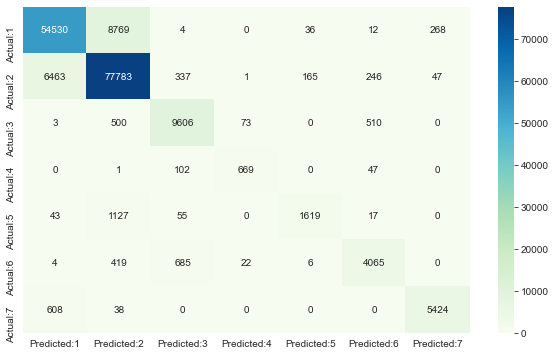

In [77]:
%%time
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_CB)
conf_matrix=pd.DataFrame(data=cm,
                         columns=['Predicted:1','Predicted:2','Predicted:3','Predicted:4','Predicted:5','Predicted:6','Predicted:7'],
                         index=['Actual:1','Actual:2','Actual:3','Actual:4','Actual:5','Actual:6','Actual:7'])
plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="GnBu")

#### Best model : Catboost